# Problem Statement

We are a property consultancy firm which aims to help property owners maximize the value (and selling price) of their properties. We aim to identify the features that are most important to predict sales price (which can be done by ranking the coefficients of each of the features in a regression model). This would allow us to provide our clients with a tool that gives quick estimates of their potential selling prices, and help them identify which aspects of their properties they can improve on to enhance their selling prices.

## Contents

- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Analysis & Visualization](#Data-Analysis-&-Visualization)
- [Data Dictionary](#Data-Dictionary)
- [Encoding](#Encoding)
- [Modeling](#Modeling)
- [Prediction Submission](#Prediction-Submission)
- [Conclusions & Recommendations](#Conclusions-&-Recommendations)

# Background

Property is a common choice of investment for those who wish to earn passive income, and an asset to hold.

"Would you want to know the price of your property?" This question is something for property owners to responsibly consider and take note of, not just when the need arises for one to sell one's property, but also to periodically check the condition & sellability of one's property. Otherwise, in the event where one urgently requires to sell the property due to being cashstrapped, the property may not be able to be sold at it's best price possible. 

Hence, this new feature on the property website allows property owners to know if one's property is truly attractive and sellable. And most importantly, the value of one's property to be at the highest possible attainable price.

### Choice of datasets

The datasets that would be used would be:
- test.csv: This data contains the test data for your model. This data will be fed into your regression model to make predictions.
- train.csv: This data contains all of the training data for your model.

### Libraries used

In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#modeling imports
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.stats import ttest_ind, zscore
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from math import sqrt

%matplotlib inline

# Data Import & Cleaning

## General Data Cleaning & Analysis

In [2]:
#reading in my train data

train = pd.read_csv('../project_2/datasets/train.csv')

In [3]:
type(train)

pandas.core.frame.DataFrame

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [6]:
train.shape

(2051, 81)

In [7]:
def clean_columns(col):
    return col.lower().replace(' ', '_').replace('/', '_')

#built a function to clean my columns by:
#1) making them lowercase and 2) replacing spaces & forward slashes with underscores

In [8]:
train.columns = [clean_columns(col) for col in train.columns]
train.head(1)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  

[1 rows x 81 columns]

In [9]:
# Checking for any duplicates
train[train.duplicated()==True]

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod_add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

[0 rows x 81 columns]

In [10]:
# Checking to ensure there are no instances where saleprice is less than $0

train.saleprice[train.saleprice < 0]

Series([], Name: saleprice, dtype: int64)

Since the dataset contains information for properties sold between year 2006 to 2010, we should ensure that the variables which gives us information on the 'year' is not greater than 2010.

The variables which gives us information on the 'year' are the following:
- yr_sold
- year_built
- year_remod_add
- garage_yr_blt

In [11]:
train['yr_sold'][train['yr_sold'] > 2010] 

Series([], Name: yr_sold, dtype: int64)

In [12]:
train['year_built'][train['year_built'] > 2010] 

Series([], Name: year_built, dtype: int64)

In [13]:
train['year_remod_add'][train['year_remod_add'] > 2010] 

Series([], Name: year_remod_add, dtype: int64)

In [14]:
train['garage_yr_blt'][train['garage_yr_blt'] > 2010] 

1699    2207.0
Name: garage_yr_blt, dtype: float64

In [15]:
#showing the results for this particular record at the 1699th row
train[train['garage_yr_blt'] > 2010][train.columns[20:61]]

year_built  year_remod_add roof_style roof_matl exterior_1st  \
1699        2006            2007        Hip   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond  ...  \
1699      VinylSd          NaN           NaN         Gd         TA  ...   

     half_bath bedroom_abvgr kitchen_abvgr kitchen_qual totrms_abvgrd  \
1699         0             2             1           Ex             6   

      functional fireplaces  fireplace_qu  garage_type  garage_yr_blt  
1699         Typ          1            Gd       Attchd         2207.0  

[1 rows x 41 columns]

The above results show that there is an entry on the 1699th record that property's garage was built on the year '2207'. However, we know that this is not possible.

Additionally, we can tell that the property was built on the year '2007' and remodelled on the year '2007'. Hence, a possible deduction is that the garage was built for that property when the property underwent remodelling in the year '2007'. This might have been a typographical error as well. 

In [16]:
#changing the value of the year built for the garage from '2207' to '2007' instead
train['garage_yr_blt'].replace('2207', '2007', inplace= True)

In [17]:
train.loc[[1699]][train.columns[20:61]]

year_built  year_remod_add roof_style roof_matl exterior_1st  \
1699        2006            2007        Hip   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond  ...  \
1699      VinylSd          NaN           NaN         Gd         TA  ...   

     half_bath bedroom_abvgr kitchen_abvgr kitchen_qual totrms_abvgrd  \
1699         0             2             1           Ex             6   

      functional fireplaces  fireplace_qu  garage_type  garage_yr_blt  
1699         Typ          1            Gd       Attchd         2207.0  

[1 rows x 41 columns]

In [18]:
# Checking for null values and displaying only the columns with nulls and their sum

train[train.columns[train.isnull().any()]].isnull().sum()

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

#### Summary of Initial Analysis of Train Data:

- For train dataset: There are 2051 rows of observed data (equivalent to 2051 property transactions), and 81 unique columns.
- There are no duplicated rows.
- Saleprice is always positive.
- There is a typographical error in the year of the garage being built for 1 observed data. 
- There are 26 columns with null values. Further analysis will be done below to input the true meaning of the null value if applicable.

#### Summary of Initial Observations for Data Cleaning:

- Column names has been simplified to lowercase. The blanks & forward slashes has been replaced with an underscore for interpretation and handling of data. 

- The typographical error for the year of the garage being built has been rectified to the best possible correct year. 

- Checks will be conducted on the variables that have null values. This is especially so for the categorical (i.e. nominal & ordinal) data which suggest there is a null value, when it actually indicates the absence of the variable. For example, a null value for the pool variable indicates that there is actually no pool for that property.

- The columns can be split into 3 main datatypes: numerical, ordinal and nominal. Hence, to facilitate the regression model, it would be necessary to split them into 3 dataframes. 

- As there are 81 unique columns for the train dataset and 80 unique columns for the test dataset, the analysis will be narrowed down and the following columns will be dropped for easier analysis.
- The columns ID and PID will be dropped as they are not relevant for the regression model.

#### New Column Suggestions:

- New numerical columns will be created for the categorical data that has null values to indicate whether there is a presence or absence of that variable with '1' indicating the presence of the variable, and '0' otherwise.   
          got_mas_vnr, got_bsmt, got_fireplaces, got_garage, got_pool, got_misc, got_alley, got_fence.


- New column to calculate the age of the property when it is sold. To drop the original 2 columns thereafter.
          age (of the property) = yr_sold - yr_built.


- New columns to combine the total number of bathrooms in the property. To drop the original columns thereafter.
          full_bath_total = bsmt_full_bath + full_bath, 
          half_bath_total = bsmt_half_bath + half_bath.

- New numerical column to indicate the number of finished floors the property has from the nominal column of house_style, with the integers indicating the number of finished floors and '0' otherwise.
          num_of_floors

## Feature Engineering

#### Categorical columns with null values.

For the following variables, we will check how many of the properties in the dataset has the said variable.
The variables are:
- masonry veneer
- basement
- fireplace
- garage
- pool
- miscellaneous features

In [19]:
def presence_of_variable_1(x):
    if x > 0:
        return int(1) #1 to represent the property has the variable
    else:
        return int(0) #0 to represent the property does not have the variable 

In [20]:
#create a new column to show if the property has a masonry veneer or not

train['got_mas_vnr'] = train['mas_vnr_area'].map(presence_of_variable_1)

In [21]:
#create a new column to show if the property has a basement or not

train['got_bsmt'] = train['total_bsmt_sf'].map(presence_of_variable_1)

In [22]:
#create a new column to show if the property has a fireplace or not

train['got_fireplaces'] = train['fireplaces'].map(presence_of_variable_1)

In [23]:
#create a new column to show if the property has a garage or not

train['got_garage'] = train['garage_area'].map(presence_of_variable_1)

In [24]:
#create a new column to show if the property has a pool or not

train['got_pool'] = train['pool_area'].map(presence_of_variable_1)

In [25]:
#create a new column to show if the property has miscellaneous features or not

train['got_misc'] = train['misc_val'].map(presence_of_variable_1)

In [26]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... mo_sold yr_sold sale_type saleprice got_mas_vnr  \
0       IR1          Lvl  ...       3    2010       WD     130500           1   
1       IR1          Lvl  ...       4    2009       WD     220000           1   
2       Reg          Lvl  ...       1    2010       WD     109000           0   
3       Reg          Lvl  ...       4    2010       WD     174000           0   
4       IR1          Lvl  ...       3    2010       WD     138500           0   

  got_bsmt got_fireplaces got_garage  got_pool  got_misc  
0        1              0          1         0         0  
1        1              1          1         0         0  
2        1              0          1         0         0  
3        1              0          1         0         0  
4        1              0          1         0         0  

[5 rows x 87 columns]

In [27]:
train['got_mas_vnr'].value_counts()

#1 to represent the property has the variable
#0 to represent the property does not have the variable

0    1238
1     813
Name: got_mas_vnr, dtype: int64

In [28]:
plt.style.use('fivethirtyeight')

# enable our graphs to be displayed inside the notebook.
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False

%config InlineBackend.figure_format = 'retina'

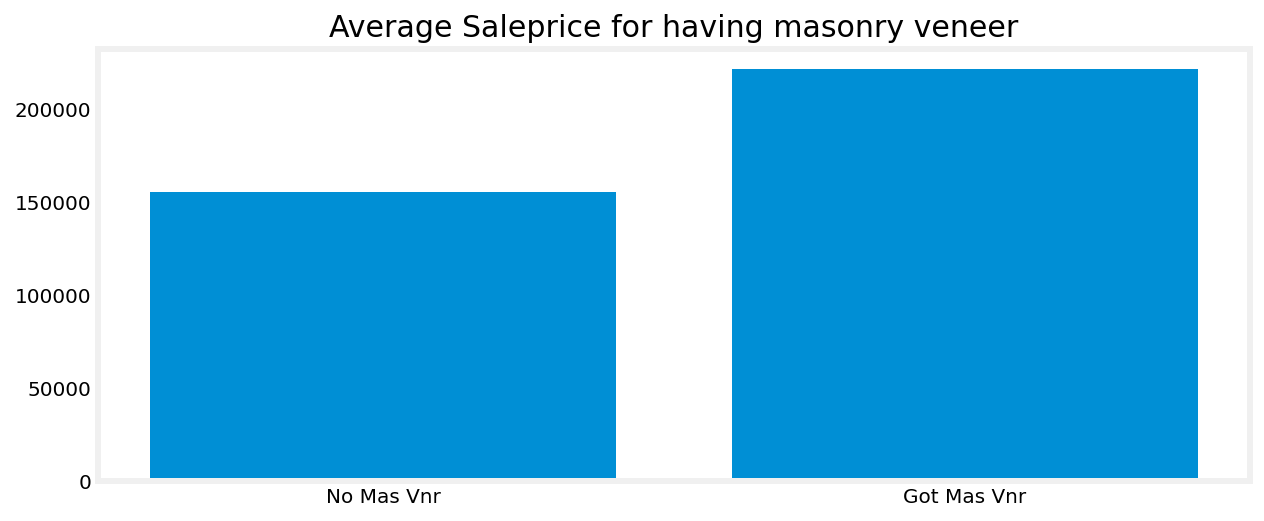

In [29]:
no_mas_vnr = train[train['got_mas_vnr'] == 0 ]
yes_mas_vnr = train[train['got_mas_vnr'] == 1 ]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mas_vnr = ['No Mas Vnr', 'Got Mas Vnr']
saleprice_mean_mas_vnr = [no_mas_vnr['saleprice'].mean(),yes_mas_vnr['saleprice'].mean()]
ax.bar(mas_vnr,saleprice_mean_mas_vnr)
#set the title
ax.set_title('Average Saleprice for having masonry veneer', fontsize = 15, y = 1)
plt.show()

**Interpretation:**
The average saleprice of properties that have masonry veneer is sliightly higher than properties without masonry veneer. Hence, we will keep this variable 'got_mas_vnr' and check later if the presence of a masonry veneer in the property affects the saleprice of the property.

In [30]:
train['got_bsmt'].value_counts()

1    1996
0      55
Name: got_bsmt, dtype: int64

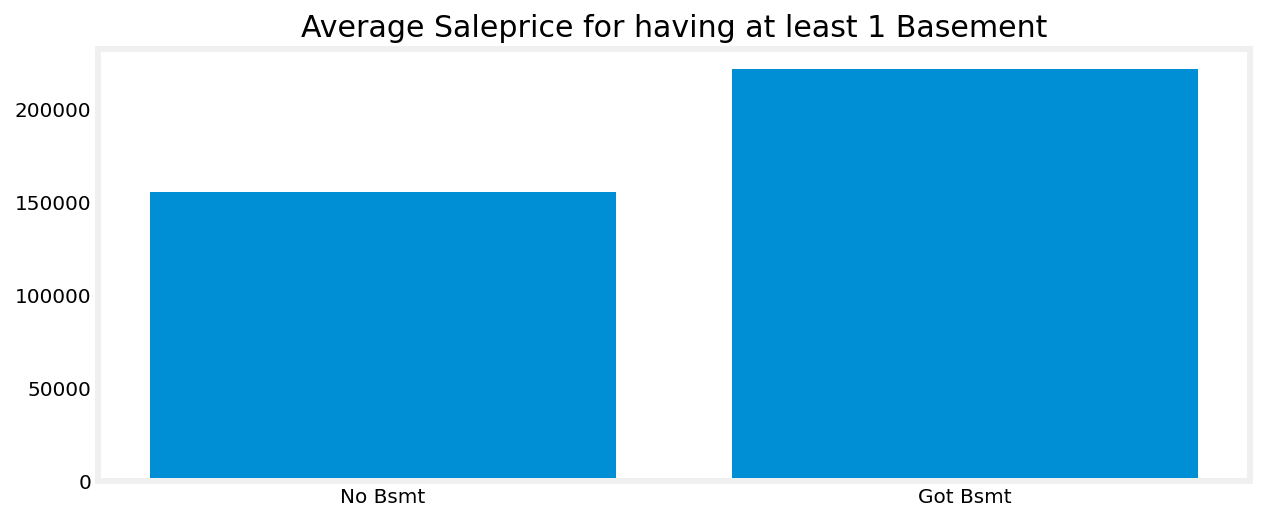

In [31]:
no_bsmt = train[train['got_bsmt'] == 0 ]
yes_bsmt = train[train['got_bsmt'] == 1 ]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
bsmt = ['No Bsmt', 'Got Bsmt']
saleprice_mean_bsmt = [no_bsmt['saleprice'].mean(),yes_bsmt['saleprice'].mean()]
ax.bar(bsmt,saleprice_mean_mas_vnr)
#set the title
ax.set_title('Average Saleprice for having at least 1 Basement', fontsize = 15, y = 1)
plt.show()

**Interpretation:**
The average saleprice of properties that have at least 1 basement is sliightly higher than properties without basements. Hence, we will keep this variable 'got_bsmt' and check later if the presence of a basement in the property affects the saleprice of the property.

In [32]:
train['got_fireplaces'].value_counts()

1    1051
0    1000
Name: got_fireplaces, dtype: int64

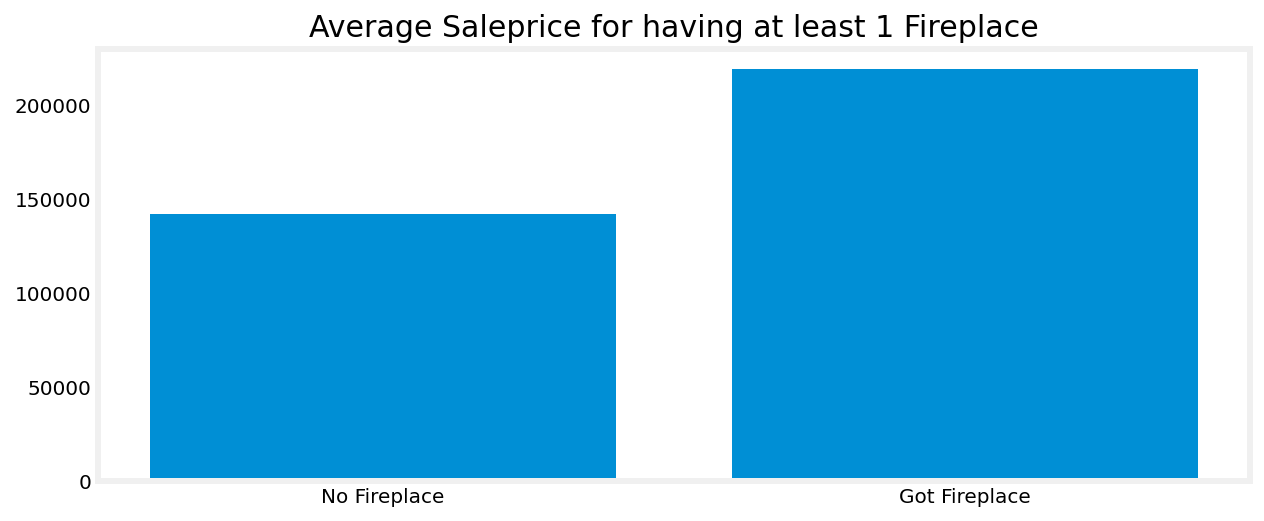

In [33]:
no_fireplaces = train[train['got_fireplaces'] == 0 ]
yes_fireplaces = train[train['got_fireplaces'] == 1 ]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
fireplaces = ['No Fireplace', 'Got Fireplace']
saleprice_mean_fireplaces = [no_fireplaces['saleprice'].mean(),yes_fireplaces['saleprice'].mean()]
ax.bar(fireplaces,saleprice_mean_fireplaces)
#set the title
ax.set_title('Average Saleprice for having at least 1 Fireplace', fontsize = 15, y = 1)
plt.show()

**Interpretation:**
The average saleprice of properties that have at least 1 fireplace is sliightly higher than properties without fireplaces. Hence, we will keep this variable 'got_fireplaces' and check later if the presence of fireplaces in the property affects the saleprice of the property.

In [34]:
train['got_garage'].value_counts()

1    1937
0     114
Name: got_garage, dtype: int64

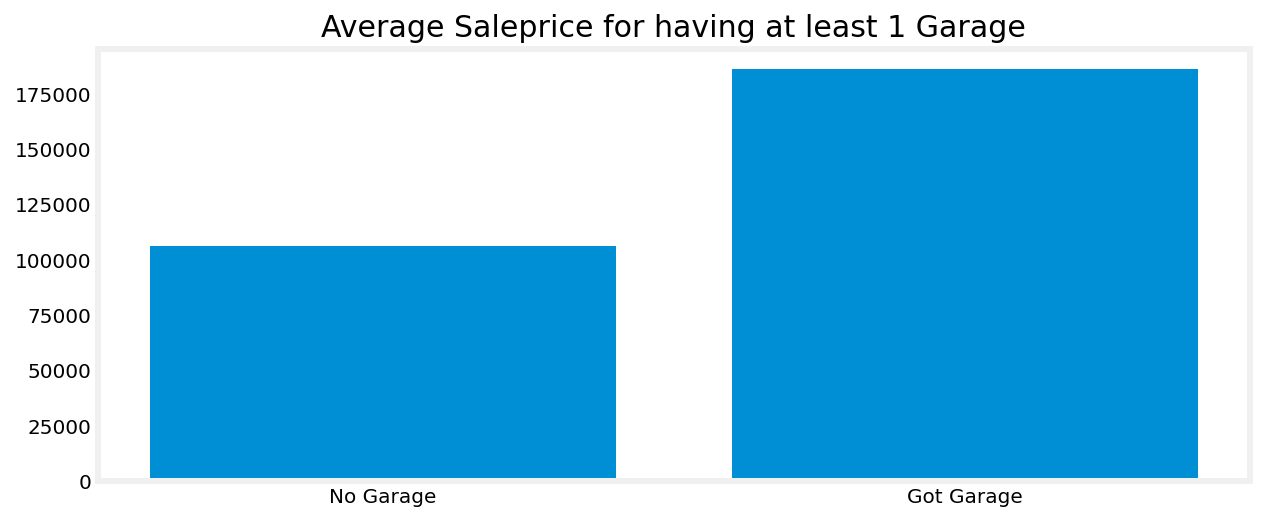

In [35]:
no_garage = train[train['got_garage'] == 0 ]
yes_garage = train[train['got_garage'] == 1 ]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
garage = ['No Garage', 'Got Garage']
saleprice_mean_garage = [no_garage['saleprice'].mean(),yes_garage['saleprice'].mean()]
ax.bar(garage,saleprice_mean_garage)
#set the title
ax.set_title('Average Saleprice for having at least 1 Garage', fontsize = 15, y = 1)
plt.show()

**Interpretation:**
The average saleprice of properties that have at least 1 garage is significantly higher than properties without garages. Hence, we will keep this variable 'got_garage' and check later if the presence of garages in the property affects the saleprice of the property.

In [36]:
train['got_pool'].value_counts()

0    2042
1       9
Name: got_pool, dtype: int64

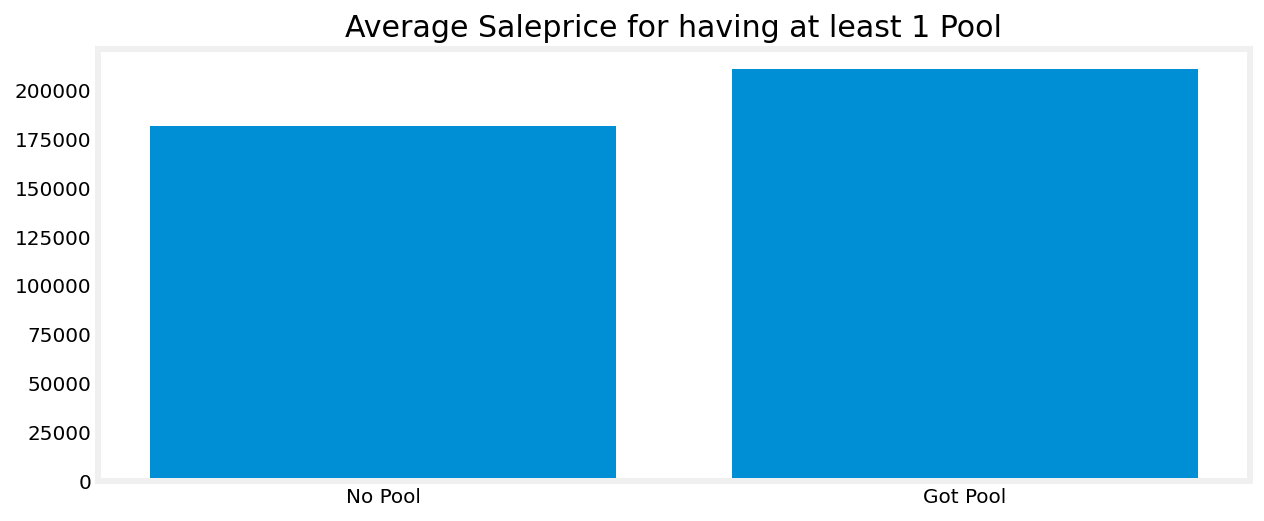

In [37]:
no_pool = train[train['got_pool'] == 0 ]
yes_pool = train[train['got_pool'] == 1 ]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
pool = ['No Pool', 'Got Pool']
saleprice_mean_pool = [no_pool['saleprice'].mean(),yes_pool['saleprice'].mean()]
ax.bar(pool,saleprice_mean_pool)
#set the title
ax.set_title('Average Saleprice for having at least 1 Pool', fontsize = 15, y = 1)
plt.show()

**Interpretation:**
The average saleprice of properties that have at least 1 pool is very slightly higher than properties without pools. Hence, we will keep this variable 'got_pool' and check later if the presence of pool(s) in the property affects the saleprice of the property.

In [38]:
train['got_misc'].value_counts()

0    1986
1      65
Name: got_misc, dtype: int64

**Interpretation:**
From the above value_counts() results, we can tell that majority of the properties do not have a masonry veneer, pool and miscellaneous features. Hence, we can infer that the features such as having a masonry veneer, pool and miscellaneous features appears to not be an essential feature for properties. Further analysis will be done below. 

We note that almost half of the properties do not have fireplaces as well. However, most properties do have basement(s) and garage(s). Hence, this features appear to be more essential to property buyers and home owners as well.

We know that with such additional features, the properties will naturally be more valuable and attractive to property owners & buyers. This is supported by the average saleprice of the properties with the such additional features being higher than properties without this features. Additionally, from the above plots, among the 5 variables, we can tell that properties with garage have the biggest difference in the average saleprice of the property, while properties with pools have the least difference. 

Let us look into the following variables and fill in the true meaning of the null values for the variables as well:
 - alley,
 - fence,
 - basement,
 - garage,
 - masonry veneer,
 - fireplace,
 - pool, 
 - miscellaneous features.

In [39]:
train['alley'].isnull().sum()

1911

In [40]:
train['alley']= train['alley'].fillna('NoAlley')

In [41]:
train['alley'].isnull().sum()

0

In [42]:
train['alley'].unique()

array(['NoAlley', 'Pave', 'Grvl'], dtype=object)

[Text(0.5, 1.0, 'Properties with Alleys vs. Saleprice')]

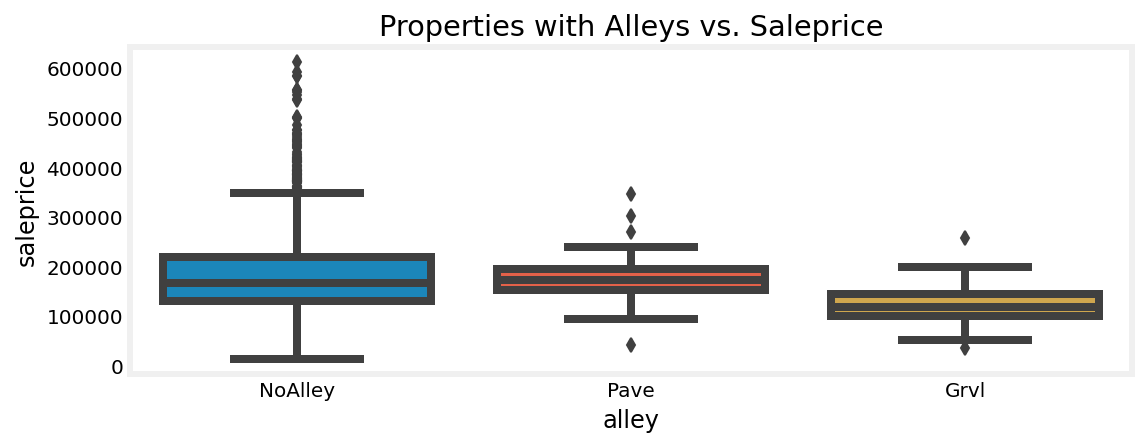

In [43]:
sns.boxplot(x='alley',y='saleprice',data=train).set(title='Properties with Alleys vs. Saleprice')

**Interpretation:**

From the above boxplot, we can tell that properties with paved alleys appears to be more valuable than properties with gravel alleys as the mean prices for properties with paved alleys are slightly higher than the mean prices for properties with gravel alleys. However, as compared to properites with no alleys, the mean prices appear to be similar. We will keep the variable 'alley' to determine if this variable is correlated to the saleprices of properties.

In [44]:
#create a new column to show if the property has an alley or not
train['got_alley'] = train['alley'].map(lambda x: 0 if x == 'NoAlley' else 1)

#1 to represent the property has the variable
#0 to represent the property does not have the variable

In [45]:
train['got_alley'].value_counts()

0    1911
1     140
Name: got_alley, dtype: int64

In [46]:
train['fence'].isnull().sum()

1651

In [47]:
train['fence']= train['fence'].fillna('NoFence')

In [48]:
train['fence'].isnull().sum()

0

In [49]:
train['fence'].unique()

array(['NoFence', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

[Text(0.5, 1.0, 'Properties with Fences vs. Saleprice')]

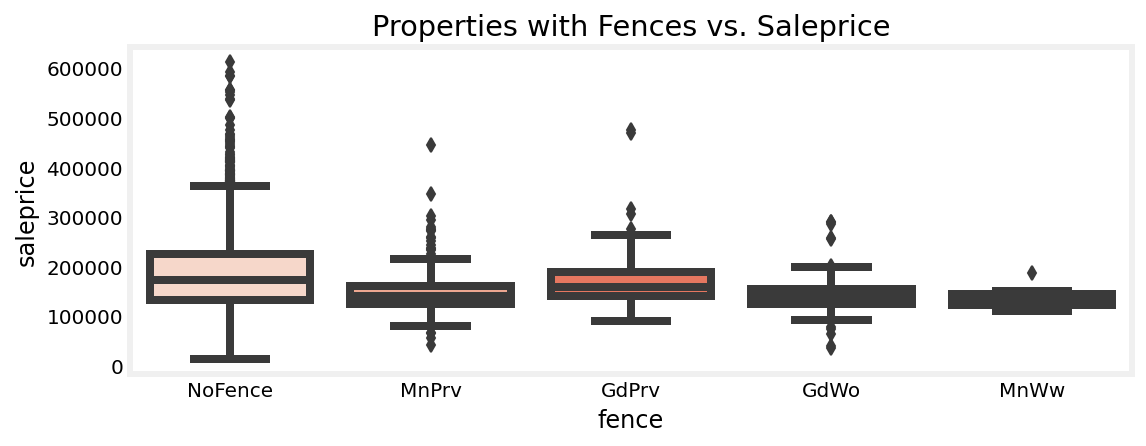

In [50]:
sns.boxplot(x='fence',y='saleprice',data=train, palette="Reds").set(title='Properties with Fences vs. Saleprice')

**Interpretation:**

From the above boxplot, we can tell that regardless of the quality of the fences, the mean prices for the properties appear to be relatively similar. Hence, we will drop this column since the fence quality appears to be unrelated to the saleprice of the properties. 

In [51]:
#create a new column to show if the property has a fence or not
train['got_fence'] = train['fence'].map(lambda x: 0 if x == 'NoFence' else 1)

In [52]:
train['got_fence'].value_counts()

0    1651
1     400
Name: got_fence, dtype: int64

From the above value_counts() results, we can tell that majority of the properties do not have an alley and fence. 
Hence, we can infer that such features , though may be good to have as it provides increased convenience & security to the property, they appears to be an uncommon feature for properties. Further analysis will be done below to determine if such features will drastically affect the saleprices of the properties. 

In [53]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

     alley lot_shape land_contour  ... sale_type saleprice got_mas_vnr  \
0  NoAlley       IR1          Lvl  ...       WD     130500           1   
1  NoAlley       IR1          Lvl  ...       WD     220000           1   
2  NoAlley       Reg          Lvl  ...       WD     109000           0   
3  NoAlley       Reg          Lvl  ...       WD     174000           0   
4  NoAlley       IR1          Lvl  ...       WD     138500           0   

  got_bsmt got_fireplaces got_garage got_pool got_misc  got_alley  got_fence  
0        1              0          1        0        0          0          0  
1        1              1          1        0        0          0          0  
2        1              0          1        0        0          0          0  
3        1              0          1        0        0          0          0  
4        1              0          1        0        0          0          0  

[5 rows x 89 columns]

In [54]:
# Filling in the true meaning of the null values for the relevant basement columns

[train[col].fillna('NoBasement', inplace = True) for col in ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']]

[None, None, None, None, None]

In [55]:
train['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', 'NoBasement', 'Ex', 'Po'], dtype=object)

In [56]:
train['bsmt_cond'].unique()

array(['TA', 'Gd', 'NoBasement', 'Fa', 'Po', 'Ex'], dtype=object)

In [57]:
train['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', 'NoBasement', 'Mn'], dtype=object)

In [58]:
train['bsmtfin_type_1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NoBasement', 'BLQ', 'LwQ'],
      dtype=object)

In [59]:
train['bsmtfin_type_2'].unique()

array(['Unf', 'Rec', 'NoBasement', 'BLQ', 'GLQ', 'LwQ', 'ALQ'],
      dtype=object)

In [60]:
# Filling in the true meaning of the null values for the relevant garage columns

[train[col].fillna('NoGarage', inplace = True) for col in ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']]

[None, None, None, None]

In [61]:
train['garage_type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NoGarage', '2Types',
       'CarPort'], dtype=object)

In [62]:
train['garage_finish'].unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [63]:
train['garage_qual'].unique()

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Ex', 'Po'], dtype=object)

In [64]:
train['garage_cond'].unique()

array(['TA', 'Fa', 'NoGarage', 'Po', 'Gd', 'Ex'], dtype=object)

In [65]:
# Filling in the true meaning of the null values for the mas_vnr_type column

train['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [66]:
train['mas_vnr_type'].fillna('None', inplace = True)

In [67]:
train['mas_vnr_type'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [68]:
# Filling in the true meaning of the null values for the fireplace_qu column

train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [69]:
train['fireplace_qu'].fillna('NoFireplace', inplace = True)

In [70]:
train['fireplace_qu'].unique()

array(['NoFireplace', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [71]:
# Filling in the true meaning of the null values for the pool_qc column

train['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [72]:
train['pool_qc'].fillna('NoPool', inplace = True)

In [73]:
train['pool_qc'].unique()

array(['NoPool', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [74]:
# Filling in the true meaning of the null values for the misc_feature column

train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [75]:
train['misc_feature'].fillna('None', inplace = True)

In [76]:
train['misc_feature'].unique()

array(['None', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

Let us look into the total number of bathrooms & half bathrooms, including those in the basement. And create new columns to combine the total number of bathrooms in the property. 

In [77]:
# Checking for sum of null values for the number of basement full bathrooms.

train['bsmt_full_bath'].isnull().sum()

2

In [78]:
# Checking for sum of null values for the number of basement half bathrooms.

train['bsmt_half_bath'].isnull().sum()

2

In [79]:
# Checking for sum of null values for the number of full bathrooms (excluding the basement bathrooms).

train['full_bath'].isnull().sum()

0

In [80]:
# Checking for sum of null values for the number of half bathrooms (excluding the basement bathrooms).

train['half_bath'].isnull().sum()

0

In [81]:
# Since the null values for the missing records are relatively small, we shall drop the records with the null values
train['bsmt_full_bath'].dropna(inplace = True)

train.dropna(subset=['bsmt_full_bath', 'bsmt_half_bath'], inplace = True)

In [82]:
# Checking for sum of null values for the number of basement full bathrooms.

train['bsmt_full_bath'].isnull().sum()

0

In [83]:
# Checking for sum of null values for the number of basement half bathrooms.

train['bsmt_half_bath'].isnull().sum()

0

In [84]:
#since the bathrooms columns are not all of the same datatype, we will create a function to convert the floats to integers function.
# so that we can create a new column indicating the total number of bathrooms in the property.

#floats to integers function

def float_to_int(x):
    return int(x)

In [85]:
#create a new column to show bsmt_full_bath as int

train['bsmt_full_bath_int'] = train['bsmt_full_bath'].map(float_to_int)

In [86]:
#create a new column to show bsmt_half_bath as int

train['bsmt_half_bath_int'] = train['bsmt_half_bath'].map(float_to_int)

In [87]:
#create a new column to show the total number of full bathrooms

train['full_bath_total'] = train['bsmt_full_bath'] + train['full_bath']

In [88]:
#create a new column to show the total number of half bathrooms

train['half_bath_total'] = train['bsmt_half_bath'] + train['half_bath']

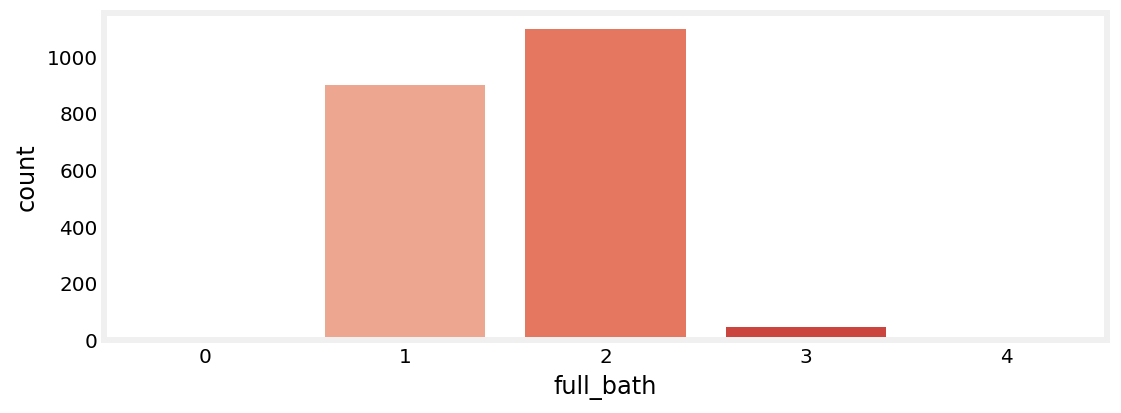

In [89]:
#plot showing the total number of full bathrooms for the train dataset

sns.countplot(x='full_bath', data=train, palette = 'Reds')
plt.show()

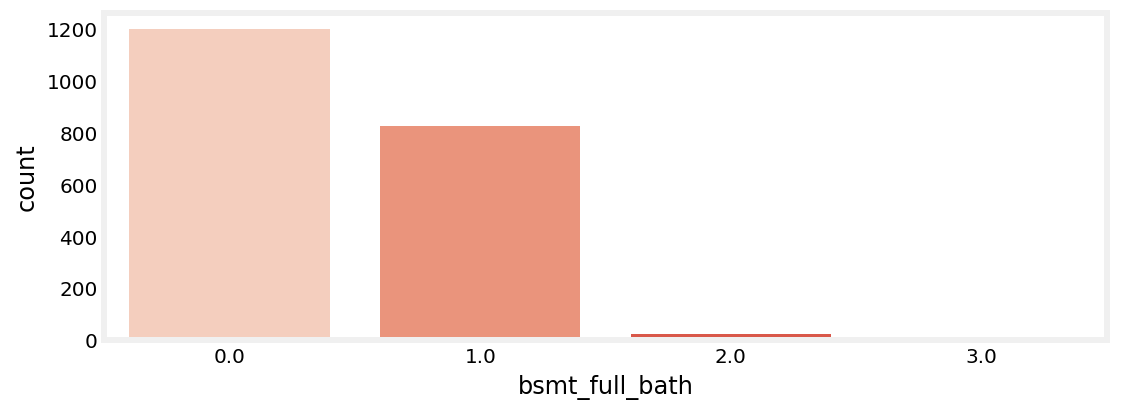

In [90]:
#plot showing the total number of full bathrooms in the basement for the train dataset


sns.countplot(x='bsmt_full_bath', data=train, palette = 'Reds')
plt.show()

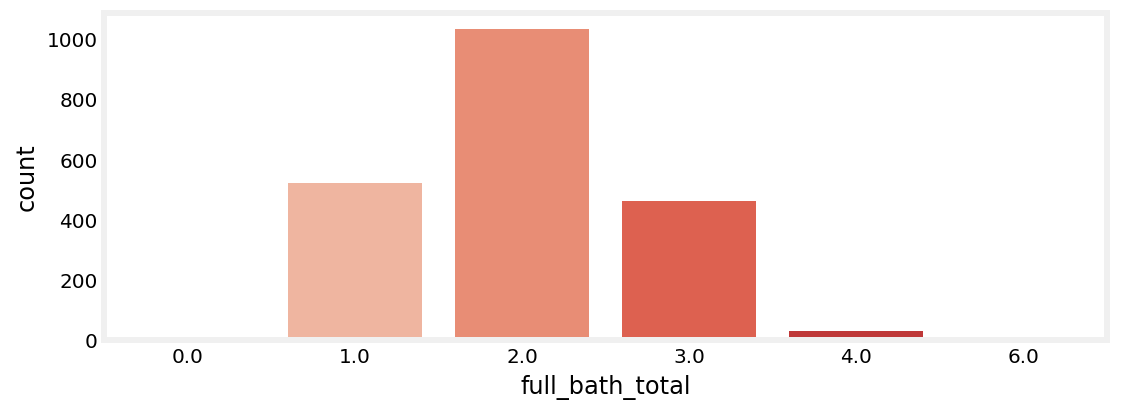

In [91]:
#plot showing the consolidated total number of full bathrooms in the entire property for the train dataset

sns.countplot(x='full_bath_total', data=train, palette = 'Reds')
plt.show()

In [92]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

     alley lot_shape land_contour  ... got_fireplaces got_garage got_pool  \
0  NoAlley       IR1          Lvl  ...              0          1        0   
1  NoAlley       IR1          Lvl  ...              1          1        0   
2  NoAlley       Reg          Lvl  ...              0          1        0   
3  NoAlley       Reg          Lvl  ...              0          1        0   
4  NoAlley       IR1          Lvl  ...              0          1        0   

  got_misc got_alley got_fence bsmt_full_bath_int bsmt_half_bath_int  \
0        0         0         0                  0                  0   
1        0         0         0                  1                  0   
2        0         0         0                  1                  0   
3        0         0         0                  0                  0   
4        0         0         0                  0                  0   

   full_bath_total  half_bath_total  
0              2.0              1.0  
1              3.0              1.0  
2              2.0              0.0  
3              2.0              1.0  
4              2.0              0.0  

[5 rows x 93 columns]

Let create a new column which informs us about the age of the property.

In [93]:
#create a new column to show the age of the property

train['age'] = train['yr_sold'] - train['year_built']

In [94]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

     alley lot_shape land_contour  ... got_garage got_pool got_misc got_alley  \
0  NoAlley       IR1          Lvl  ...          1        0        0         0   
1  NoAlley       IR1          Lvl  ...          1        0        0         0   
2  NoAlley       Reg          Lvl  ...          1        0        0         0   
3  NoAlley       Reg          Lvl  ...          1        0        0         0   
4  NoAlley       IR1          Lvl  ...          1        0        0         0   

  got_fence bsmt_full_bath_int bsmt_half_bath_int full_bath_total  \
0         0                  0                  0             2.0   
1         0                  1                  0             3.0   
2         0                  1                  0             2.0   
3         0                  0                  0             2.0   
4         0                  0                  0             2.0   

   half_bath_total  age  
0              1.0   34  
1              1.0   13  
2              0.0   57  
3              1.0    4  
4              0.0  110  

[5 rows x 94 columns]

After the inputation of the true meaning of the null values for the relevant variables and the creation of new columns above, we will check for the null values for the dataset.

In [95]:
# Checking for columns with nulls and their sum.

train[train.columns[train.isnull().any()]].isnull().sum()

lot_frontage     330
mas_vnr_area      22
garage_yr_blt    114
garage_cars        1
garage_area        1
dtype: int64

In [96]:
#percentage of null values for the columns

train.isnull().mean().round(4).mul(100).sort_values(ascending=False)

lot_frontage     16.11
garage_yr_blt     5.56
mas_vnr_area      1.07
garage_area       0.05
garage_cars       0.05
                 ...  
foundation        0.00
exter_cond        0.00
exter_qual        0.00
mas_vnr_type      0.00
age               0.00
Length: 94, dtype: float64

In [97]:
train.shape

(2049, 94)

In [98]:
def presence_of_variable_1(x):
    if x > 0:
        return int(1) #1 to represent the property has the variable
    else:
        return int(0) #0 to represent the property does not have the variable 

In [99]:
train_lot_frontage = train['lot_frontage'].map(presence_of_variable_1)

In [100]:
train_lot_frontage

0       0
1       1
2       1
3       1
4       1
       ..
2046    1
2047    0
2048    1
2049    1
2050    1
Name: lot_frontage, Length: 2049, dtype: int64

In [101]:
train_lot_frontage.value_counts()

1    1719
0     330
Name: lot_frontage, dtype: int64

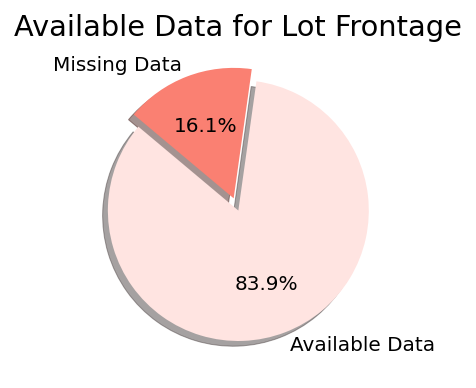

In [102]:
# Pie Chart
labels = ["Available Data", "Missing Data"]
sizes = [1719,330]

# only "explode" the 2nd slice (i.e. 'Missing Data')
explode = (0, 0.1)  

#colours
colors = ['mistyrose', 'salmon']

#plot 
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

#title
plt.title("Available Data for Lot Frontage")

plt.show()

Out of all the data available for the Train dataset, 16.1% of the data is missing for the lot frontage column.

In [103]:
# Since the null values for the missing records are relatively small to the entire dataset, we shall drop the records with the null values.

train.dropna(subset=['lot_frontage', 'mas_vnr_area','garage_yr_blt', 'garage_cars', 'garage_area'], inplace = True)

In [104]:
train[train.columns[train.isnull().any()]].isnull().sum()

#displaying only the columns with nulls and their sum

Series([], dtype: float64)

In [105]:
train.shape

(1596, 94)

In [106]:
# Checking if the newly created garage column needs to be dropped after the rows of null values have been removed.

train['got_garage'].value_counts()

# This column can now be dropped since the remaining properties in the data all has garages.

1    1596
Name: got_garage, dtype: int64

Let us look into the house style of the property. That is, the number of storeys the property has. And create a new numerical column that can tell us easier the number of finished floors the property has from the nominal column of house_style, with the integers indicating the number of finished floors and '0' otherwise.

In [107]:
train['house_style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], dtype=object)

In [108]:
def number_of_floors(x):
    if x == '1Story':
        return 'one'
    elif x == '1.5Fin':
        return 'one_half'
    elif x == '2Story':
        return 'two'
    elif x == '2.5Fin':
        return 'two_half'
    else:
        return 'Others' #represents all other properties with unfinished flooring or with split foyer

In [109]:
train['num_of_floors'] = train['house_style'].map(number_of_floors)

In [110]:
train['num_of_floors'].dtype

dtype('O')

In [111]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   
5  138  535126040           20        RL         137.0     16492   Pave   

     alley lot_shape land_contour  ... got_pool got_misc got_alley got_fence  \
1  NoAlley       IR1          Lvl  ...        0        0         0         0   
2  NoAlley       Reg          Lvl  ...        0        0         0         0   
3  NoAlley       Reg          Lvl  ...        0        0         0         0   
4  NoAlley       IR1          Lvl  ...        0        0         0         0   
5  NoAlley       IR1          Lvl  ...        0        0         0         0   

  bsmt_full_bath_int bsmt_half_bath_int full_bath_total half_bath_total  age  \
1                  1                  0             3.0             1.0   13   
2                  1                  0             2.0             0.0   57   
3                  0                  0             2.0             1.0    4   
4                  0                  0             2.0             0.0  110   
5                  0                  0             2.0             1.0   44   

   num_of_floors  
1            two  
2            one  
3            two  
4       one_half  
5            one  

[5 rows x 95 columns]

In [112]:
train['num_of_floors'].value_counts()

one         824
two         465
one_half    182
Others      121
two_half      4
Name: num_of_floors, dtype: int64

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 1 to 2050
Data columns (total 95 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1596 non-null   int64  
 1   pid                 1596 non-null   int64  
 2   ms_subclass         1596 non-null   int64  
 3   ms_zoning           1596 non-null   object 
 4   lot_frontage        1596 non-null   float64
 5   lot_area            1596 non-null   int64  
 6   street              1596 non-null   object 
 7   alley               1596 non-null   object 
 8   lot_shape           1596 non-null   object 
 9   land_contour        1596 non-null   object 
 10  utilities           1596 non-null   object 
 11  lot_config          1596 non-null   object 
 12  land_slope          1596 non-null   object 
 13  neighborhood        1596 non-null   object 
 14  condition_1         1596 non-null   object 
 15  condition_2         1596 non-null   object 
 16  bldg_t

In [114]:
#drop columns to narrow the analysis

train.drop(['id', 'pid', 'ms_subclass',
            'lot_frontage', 'lot_shape', 'land_contour',
            'condition_1', 'condition_2', 'bldg_type',
            'house_style', 'year_built', 'roof_style',
            'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
            'mas_vnr_area', 'exter_qual', 'bsmt_qual',
            'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
            'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf',
            'heating', 'heating_qc', 'central_air',
            'electrical', '1st_flr_sf', '2nd_flr_sf',
            'low_qual_fin_sf', 'bsmt_full_bath',
            'bsmt_half_bath', 'kitchen_abvgr', 'totrms_abvgrd',
            'functional', 'fireplaces', 'fireplace_qu',
            'garage_type', 'garage_yr_blt', 'garage_finish',
            'garage_cars', 'garage_qual', 'wood_deck_sf',
            'open_porch_sf', 'enclosed_porch', '3ssn_porch',
            'screen_porch', 'pool_area', 'pool_qc',
            'misc_feature', 'misc_val', 'mo_sold',
            'yr_sold', 'bsmt_full_bath_int', 'bsmt_half_bath_int',
            'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
            'half_bath', 'got_garage', 'fence'], axis = 1, inplace = True)

In [115]:
train.head()

ms_zoning  lot_area street    alley utilities lot_config land_slope  \
1        RL     11492   Pave  NoAlley    AllPub    CulDSac        Gtl   
2        RL      7922   Pave  NoAlley    AllPub     Inside        Gtl   
3        RL      9802   Pave  NoAlley    AllPub     Inside        Gtl   
4        RL     14235   Pave  NoAlley    AllPub     Inside        Gtl   
5        RL     16492   Pave  NoAlley    AllPub     Corner        Gtl   

  neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
1      SawyerW             7             5  ...         1              1   
2        NAmes             5             7  ...         1              0   
3       Timber             5             5  ...         1              0   
4      SawyerW             6             8  ...         1              0   
5        NAmes             6             6  ...         1              1   

  got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
1        0        0         0          0              3.0              1.0   
2        0        0         0          0              2.0              0.0   
3        0        0         0          0              2.0              1.0   
4        0        0         0          0              2.0              0.0   
5        0        0         0          0              2.0              1.0   

   age  num_of_floors  
1   13            two  
2   57            one  
3    4            two  
4  110       one_half  
5   44            one  

[5 rows x 35 columns]

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 1 to 2050
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_zoning        1596 non-null   object 
 1   lot_area         1596 non-null   int64  
 2   street           1596 non-null   object 
 3   alley            1596 non-null   object 
 4   utilities        1596 non-null   object 
 5   lot_config       1596 non-null   object 
 6   land_slope       1596 non-null   object 
 7   neighborhood     1596 non-null   object 
 8   overall_qual     1596 non-null   int64  
 9   overall_cond     1596 non-null   int64  
 10  year_remod_add   1596 non-null   int64  
 11  roof_matl        1596 non-null   object 
 12  exter_cond       1596 non-null   object 
 13  foundation       1596 non-null   object 
 14  bsmt_cond        1596 non-null   object 
 15  total_bsmt_sf    1596 non-null   float64
 16  gr_liv_area      1596 non-null   int64  
 17  bedroom_abvgr 

### Identifying & Removing Outliers

The removal of outliers can improve the correlation between the predictors and the target variable. Hence, we will look into the following variables:
- lot area
- total basement square feet
- garage area

In [117]:
#showing the summary statistics for a few continuous data variables

train[['lot_area', 'total_bsmt_sf', 'garage_area']].describe()

lot_area  total_bsmt_sf  garage_area
count   1596.000000    1596.000000  1596.000000
mean    9728.419799    1070.726817   498.352130
std     5006.308090     457.612553   193.721417
min     1300.000000       0.000000   100.000000
25%     7440.750000     793.000000   341.000000
50%     9350.000000    1002.000000   483.000000
75%    11216.500000    1337.000000   586.000000
max    70761.000000    6110.000000  1418.000000

In [118]:
train.shape

(1596, 35)

Identifying & Removing Outliers for Lot Area

<AxesSubplot:xlabel='lot_area'>

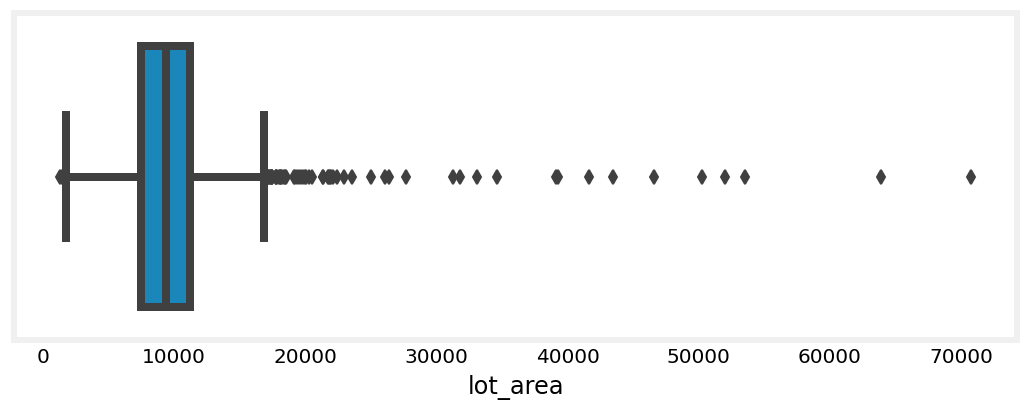

In [119]:
# boxplot for lot_area
sns.boxplot(x=train['lot_area'])

From the above boxplot, we can identify that there are some outliers beyong the upper limit for the lot area variable in the Train dataset.

In [120]:
# Set upper and lower limit to 3 standard deviation
upper_limit_lot_area_train = train['lot_area'].mean() + 3*train['lot_area'].std()

upper_limit_lot_area_train

24747.344068934304

In [121]:
# Set upper and lower limit to 3 standard deviation
lower_limit_lot_area_train = train['lot_area'].mean() - 3*train['lot_area'].std()

lower_limit_lot_area_train

-5290.50446993681

In [122]:
# Display the records with the outliers

train[(train['lot_area'] > upper_limit_lot_area_train) | (train['lot_area'] < lower_limit_lot_area_train)]

ms_zoning  lot_area street    alley utilities lot_config land_slope  \
12          RL     26400   Pave  NoAlley    AllPub        FR2        Gtl   
24          RL     34650   Pave  NoAlley    AllPub     Inside        Gtl   
441         RL     41600   Pave  NoAlley    AllPub        FR2        Gtl   
635    A (agr)     31250   Pave  NoAlley    AllPub     Inside        Gtl   
823         RL     53504   Pave  NoAlley    AllPub    CulDSac        Mod   
841         RL     39104   Pave  NoAlley    AllPub    CulDSac        Sev   
960         RL     63887   Pave  NoAlley    AllPub     Corner        Gtl   
1080        RL     31770   Pave  NoAlley    AllPub     Corner        Gtl   
1267        RL     26073   Pave  NoAlley    AllPub    CulDSac        Gtl   
1335        RL     27650   Pave  NoAlley    AllPub     Inside        Mod   
1432        RL     25000   Pave  NoAlley    AllPub     Inside        Gtl   
1542        RL     46589   Pave  NoAlley    AllPub    CulDSac        Gtl   
1571        RL     50271   Pave  NoAlley    AllPub     Inside        Gtl   
1701        RM     33120   Pave  NoAlley    AllPub     Inside        Gtl   
1854        RL     70761   Pave  NoAlley    AllPub     Inside        Mod   
1875        RL     43500   Pave  NoAlley    AllPub     Inside        Gtl   
1885        RL     39290   Pave  NoAlley    AllPub     Inside        Gtl   
1964        RL     51974   Pave  NoAlley    AllPub    CulDSac        Gtl   

     neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
12        SawyerW             5             7  ...         0              1   
24        Gilbert             5             5  ...         1              0   
441       Gilbert             5             5  ...         1              0   
635       Mitchel             1             3  ...         0              0   
823       StoneBr             8             5  ...         1              1   
841       ClearCr             7             7  ...         1              1   
960       Edwards            10             5  ...         1              1   
1080        NAmes             6             5  ...         1              1   
1267      Crawfor             5             5  ...         1              1   
1335        NAmes             7             7  ...         1              1   
1432      Mitchel             5             4  ...         1              0   
1542      NoRidge             8             7  ...         1              1   
1571      Veenker             9             5  ...         1              1   
1701      OldTown             6             5  ...         1              1   
1854      ClearCr             7             5  ...         1              1   
1875      Mitchel             3             5  ...         0              0   
1885      Edwards            10             5  ...         1              1   
1964      StoneBr             9             5  ...         1              1   

     got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
12          0        0         0          0              1.0              0.0   
24          0        0         0          0              2.0              0.0   
441         0        0         0          0              2.0              1.0   
635         0        0         0          0              1.0              1.0   
823         0        0         0          0              4.0              1.0   
841         0        0         0          0              2.0              0.0   
960         1        0         0          0              4.0              1.0   
1080        0        0         0          0              2.0              0.0   
1267        0        0         0          1              2.0              1.0   
1335        0        0         0          0              3.0              0.0   
1432        0        0         0          0              2.0              0.0   
1542        0        0         0          0              3.0              1.0   
1571 

In [123]:
train_no_outliers_1 = train[(train['lot_area'] < upper_limit_lot_area_train) & (train['lot_area'] > lower_limit_lot_area_train)]

In [124]:
train_no_outliers_1.shape

(1578, 35)

Identifying & Removing Outliers for Total Basement Square Feet

<AxesSubplot:xlabel='total_bsmt_sf'>

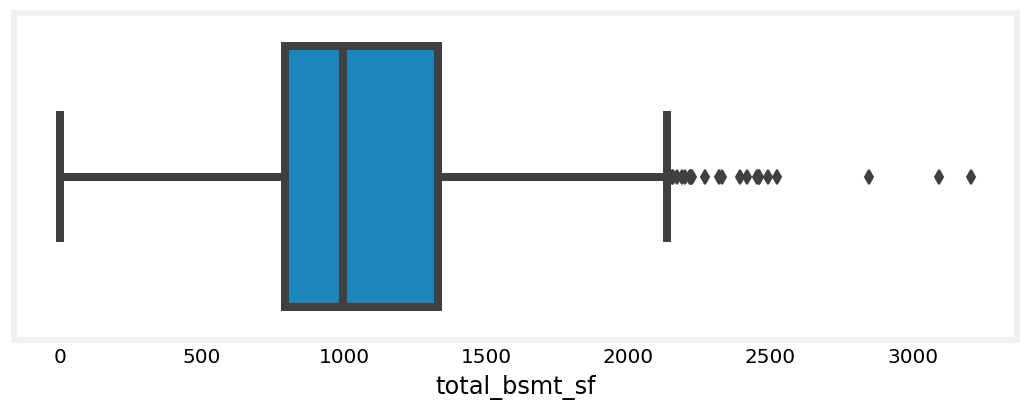

In [125]:
sns.boxplot(x=train_no_outliers_1['total_bsmt_sf'])

From the above boxplot, we can identify that there are some outliers beyong the upper limit for the total basement square feet variable in the Train dataset.

In [126]:
# Set upper and lower limit to 3 standard deviation
upper_limit_total_bsmt_sf_train = train_no_outliers_1['total_bsmt_sf'].mean() + 3*train_no_outliers_1['total_bsmt_sf'].std()

upper_limit_total_bsmt_sf_train

2334.9325230749246

In [127]:
# Set upper and lower limit to 3 standard deviation
lower_limit_total_bsmt_sf_train = train_no_outliers_1['total_bsmt_sf'].mean() - 3*train_no_outliers_1['total_bsmt_sf'].std()

lower_limit_total_bsmt_sf_train

-208.1517879671933

In [128]:
# Display the records with the outliers

train_no_outliers_1[(train_no_outliers_1['total_bsmt_sf'] > upper_limit_total_bsmt_sf_train) | (train_no_outliers_1['total_bsmt_sf'] < lower_limit_total_bsmt_sf_train)]

ms_zoning  lot_area street    alley utilities lot_config land_slope  \
30          RL      9600   Pave  NoAlley    AllPub     Inside        Gtl   
199         RL     13472   Pave  NoAlley    AllPub     Inside        Gtl   
623         RL     14836   Pave  NoAlley    AllPub     Inside        Mod   
685         RL     11128   Pave  NoAlley    AllPub     Corner        Gtl   
786         RL     17778   Pave  NoAlley    AllPub     Inside        Gtl   
1058        RL     13693   Pave  NoAlley    AllPub     Inside        Gtl   
1147        RL     10655   Pave  NoAlley    AllPub     Inside        Gtl   
1164        RL     15431   Pave  NoAlley    AllPub     Inside        Gtl   
1227        RL     14300   Pave  NoAlley    AllPub     Inside        Mod   
1647        RL     15274   Pave  NoAlley    AllPub     Corner        Gtl   

     neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
30         NWAmes             8             5  ...         1              1   
199       NridgHt            10             5  ...         1              1   
623       NridgHt            10             5  ...         1              1   
685       Somerst             9             5  ...         1              1   
786       Veenker             8             5  ...         1              1   
1058      NridgHt             8             5  ...         1              1   
1147      NridgHt             8             5  ...         1              1   
1164      NridgHt            10             5  ...         1              1   
1227      NridgHt             9             5  ...         1              1   
1647      NridgHt             9             5  ...         1              1   

     got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
30          0        0         0          1              3.0              1.0   
199         0        0         0          0              2.0              0.0   
623         0        0         0          0              3.0              1.0   
685         0        0         0          1              3.0              0.0   
786         0        0         0          0              3.0              0.0   
1058        0        0         0          0              3.0              1.0   
1147        0        0         0          0              3.0              0.0   
1164        0        0         0          0              3.0              0.0   
1227        0        0         0          0              3.0              1.0   
1647        0        0         0          1              4.0              0.0   

     age  num_of_floors  
30    28            one  
199    6            one  
623    5            one  
685    4            one  
786   26            one  
1058   1            one  
1147   6            one  
1164   1            one  
1227   7            one  
1647   6            one  

[10 rows x 35 columns]

In [129]:
train_no_outliers_2 = train_no_outliers_1[(train_no_outliers_1['total_bsmt_sf'] < upper_limit_total_bsmt_sf_train) & (train_no_outliers_1['total_bsmt_sf'] > lower_limit_total_bsmt_sf_train)]

In [130]:
train_no_outliers_2.shape

(1568, 35)

Identifying & Removing Outliers for Garage Area

<AxesSubplot:xlabel='garage_area'>

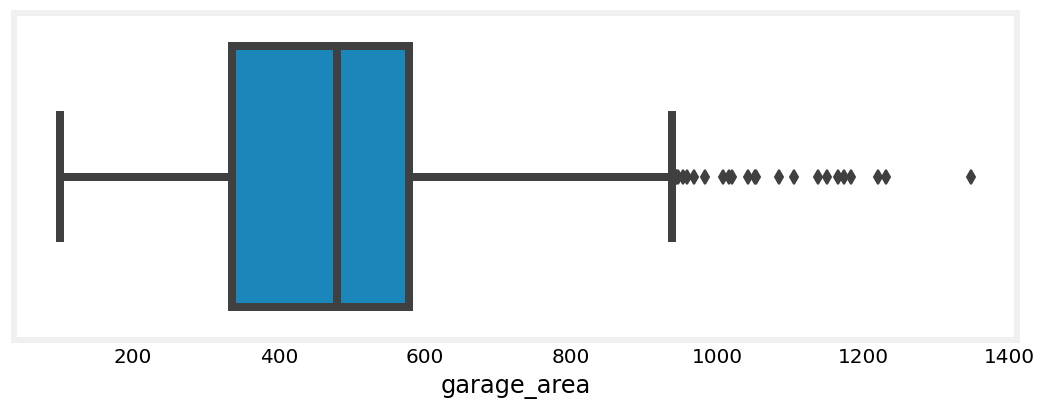

In [131]:
sns.boxplot(x=train_no_outliers_2['garage_area'])

From the above boxplot, we can identify that there are some outliers beyong the upper limit for the garage area variable in the Train dataset.

In [132]:
# Set upper and lower limit to 3 standard deviation
upper_limit_garage_area_train = train_no_outliers_2['garage_area'].mean() + 3*train_no_outliers_2['garage_area'].std()

upper_limit_garage_area_train

1062.2580141991002

In [133]:
# Set upper and lower limit to 3 standard deviation
lower_limit_garage_area_train = train_no_outliers_2['garage_area'].mean() - 3*train_no_outliers_2['garage_area'].std()

lower_limit_garage_area_train

-74.63684072971239

In [134]:
# Display the records with the outliers

train_no_outliers_2[(train_no_outliers_2['garage_area'] > upper_limit_garage_area_train) | (train_no_outliers_2['garage_area'] < lower_limit_garage_area_train)]

ms_zoning  lot_area street    alley utilities lot_config land_slope  \
81          RL     17423   Pave  NoAlley    AllPub    CulDSac        Gtl   
332         RL     12539   Pave  NoAlley    AllPub     Inside        Gtl   
526         RL     14780   Pave  NoAlley    AllPub     Corner        Mod   
682         RL     14803   Pave  NoAlley    AllPub     Inside        Gtl   
800         RL     17169   Pave  NoAlley    AllPub    CulDSac        Gtl   
925         RM      8635   Pave  NoAlley    AllPub     Inside        Gtl   
1060        RL     10933   Pave  NoAlley    AllPub     Inside        Gtl   
1140        FV      8413   Pave  NoAlley    AllPub     Inside        Gtl   
1158        RL     11778   Pave  NoAlley    AllPub     Inside        Gtl   
1557        RL     11664   Pave  NoAlley    AllPub     Corner        Gtl   

     neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
81        StoneBr             9             5  ...         1              1   
332       NridgHt            10             5  ...         1              1   
526       NridgHt             9             5  ...         1              1   
682       NridgHt            10             5  ...         1              1   
800       NridgHt            10             5  ...         1              1   
925       BrkSide             5             5  ...         1              0   
1060      CollgCr             9             5  ...         1              1   
1140      Somerst             8             5  ...         1              1   
1158      CollgCr             9             5  ...         1              1   
1557      CollgCr             7             5  ...         1              0   

     got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
81          0        0         0          0              3.0              0.0   
332         0        0         0          0              3.0              1.0   
526         0        0         0          0              3.0              0.0   
682         0        0         0          0              3.0              0.0   
800         0        0         0          0              4.0              1.0   
925         0        0         0          0              2.0              0.0   
1060        0        0         0          0              2.0              1.0   
1140        0        0         0          0              3.0              1.0   
1158        0        0         0          0              3.0              0.0   
1557        0        0         0          0              3.0              0.0   

     age  num_of_floors  
81     1            one  
332    3            two  
526    1            one  
682    1            one  
800    0            one  
925   84            one  
1060   0            one  
1140   9            two  
1158   0            one  
1557   7            one  

[10 rows x 35 columns]

In [135]:
train_no_outliers_3 = train_no_outliers_2[(train_no_outliers_2['garage_area'] < upper_limit_garage_area_train) & (train_no_outliers_2['garage_area'] > lower_limit_garage_area_train)]

In [136]:
train_no_outliers_3.shape

(1558, 35)

In [137]:
train_no_outliers_3.head()

ms_zoning  lot_area street    alley utilities lot_config land_slope  \
1        RL     11492   Pave  NoAlley    AllPub    CulDSac        Gtl   
2        RL      7922   Pave  NoAlley    AllPub     Inside        Gtl   
3        RL      9802   Pave  NoAlley    AllPub     Inside        Gtl   
4        RL     14235   Pave  NoAlley    AllPub     Inside        Gtl   
5        RL     16492   Pave  NoAlley    AllPub     Corner        Gtl   

  neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
1      SawyerW             7             5  ...         1              1   
2        NAmes             5             7  ...         1              0   
3       Timber             5             5  ...         1              0   
4      SawyerW             6             8  ...         1              0   
5        NAmes             6             6  ...         1              1   

  got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
1        0        0         0          0              3.0              1.0   
2        0        0         0          0              2.0              0.0   
3        0        0         0          0              2.0              1.0   
4        0        0         0          0              2.0              0.0   
5        0        0         0          0              2.0              1.0   

   age  num_of_floors  
1   13            two  
2   57            one  
3    4            two  
4  110       one_half  
5   44            one  

[5 rows x 35 columns]

### Separating our Dataframe into numeric and categorical categories.

In [138]:
train_no_outliers_3.columns

Index(['ms_zoning', 'lot_area', 'street', 'alley', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'overall_qual', 'overall_cond',
       'year_remod_add', 'roof_matl', 'exter_cond', 'foundation', 'bsmt_cond',
       'total_bsmt_sf', 'gr_liv_area', 'bedroom_abvgr', 'kitchen_qual',
       'garage_area', 'garage_cond', 'paved_drive', 'sale_type', 'saleprice',
       'got_mas_vnr', 'got_bsmt', 'got_fireplaces', 'got_pool', 'got_misc',
       'got_alley', 'got_fence', 'full_bath_total', 'half_bath_total', 'age',
       'num_of_floors'],
      dtype='object')

#### Numeric Variables

In [139]:
#numeric variables

train_numeric = train_no_outliers_3[['lot_area', 'year_remod_add', 'total_bsmt_sf',
                                     'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                                     'saleprice', 'got_mas_vnr', 'got_bsmt',
                                     'got_fireplaces', 'got_pool', 'got_misc',
                                     'got_alley', 'got_fence', 'full_bath_total',
                                     'half_bath_total', 'age']]
train_numeric

lot_area  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
1        11492            1997          913.0         2122              4   
2         7922            2007         1057.0         1057              3   
3         9802            2007          384.0         1444              3   
4        14235            1993          676.0         1445              3   
5        16492            2002         1517.0         1888              2   
...        ...             ...            ...          ...            ...   
2045     12444            2008         1932.0         1932              2   
2046     11449            2007         1884.0         1728              3   
2048      7558            1950          896.0         1913              3   
2049     10400            1956         1200.0         1200              3   
2050      7500            1999          994.0         1804              3   

      garage_area  saleprice  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  \
1           559.0     220000            1         1               1         0   
2           246.0     109000            0         1               0         0   
3           400.0     174000            0         1               0         0   
4           484.0     138500            0         1               0         0   
5           578.0     190000            0         1               1         0   
...           ...        ...          ...       ...             ...       ...   
2045        774.0     394617            1         1               1         0   
2046        520.0     298751            0         1               1         0   
2048        342.0     177000            0         1               1         0   
2049        294.0     144000            0         1               1         0   
2050        442.0     189000            0         1               1         0   

      got_misc  got_alley  got_fence  full_bath_total  half_bath_total  age  
1            0          0          0              3.0              1.0   13  
2            0          0          0              2.0              0.0   57  
3            0          0          0              2.0              1.0    4  
4            0          0          0              2.0              0.0  110  
5            0          0          0              2.0              1.0   44  
...        ...        ...        ...              ...              ...  ...  
2045         0          0          0              3.0              0.0    0  
2046         0          0          0              3.0              0.0    1  
2048         0          0          0              1.0              1.0   81  
2049         0          0          0              2.0              0.0   53  
2050         0          0          0              2.0              1.0   11  

[1558 rows x 17 columns]

In [140]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 1 to 2050
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lot_area         1558 non-null   int64  
 1   year_remod_add   1558 non-null   int64  
 2   total_bsmt_sf    1558 non-null   float64
 3   gr_liv_area      1558 non-null   int64  
 4   bedroom_abvgr    1558 non-null   int64  
 5   garage_area      1558 non-null   float64
 6   saleprice        1558 non-null   int64  
 7   got_mas_vnr      1558 non-null   int64  
 8   got_bsmt         1558 non-null   int64  
 9   got_fireplaces   1558 non-null   int64  
 10  got_pool         1558 non-null   int64  
 11  got_misc         1558 non-null   int64  
 12  got_alley        1558 non-null   int64  
 13  got_fence        1558 non-null   int64  
 14  full_bath_total  1558 non-null   float64
 15  half_bath_total  1558 non-null   float64
 16  age              1558 non-null   int64  
dtypes: float64(4),

array([[<AxesSubplot:title={'center':'lot_area'}>,
        <AxesSubplot:title={'center':'year_remod_add'}>,
        <AxesSubplot:title={'center':'total_bsmt_sf'}>,
        <AxesSubplot:title={'center':'gr_liv_area'}>],
       [<AxesSubplot:title={'center':'bedroom_abvgr'}>,
        <AxesSubplot:title={'center':'garage_area'}>,
        <AxesSubplot:title={'center':'saleprice'}>,
        <AxesSubplot:title={'center':'got_mas_vnr'}>],
       [<AxesSubplot:title={'center':'got_bsmt'}>,
        <AxesSubplot:title={'center':'got_fireplaces'}>,
        <AxesSubplot:title={'center':'got_pool'}>,
        <AxesSubplot:title={'center':'got_misc'}>],
       [<AxesSubplot:title={'center':'got_alley'}>,
        <AxesSubplot:title={'center':'got_fence'}>,
        <AxesSubplot:title={'center':'full_bath_total'}>,
        <AxesSubplot:title={'center':'half_bath_total'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

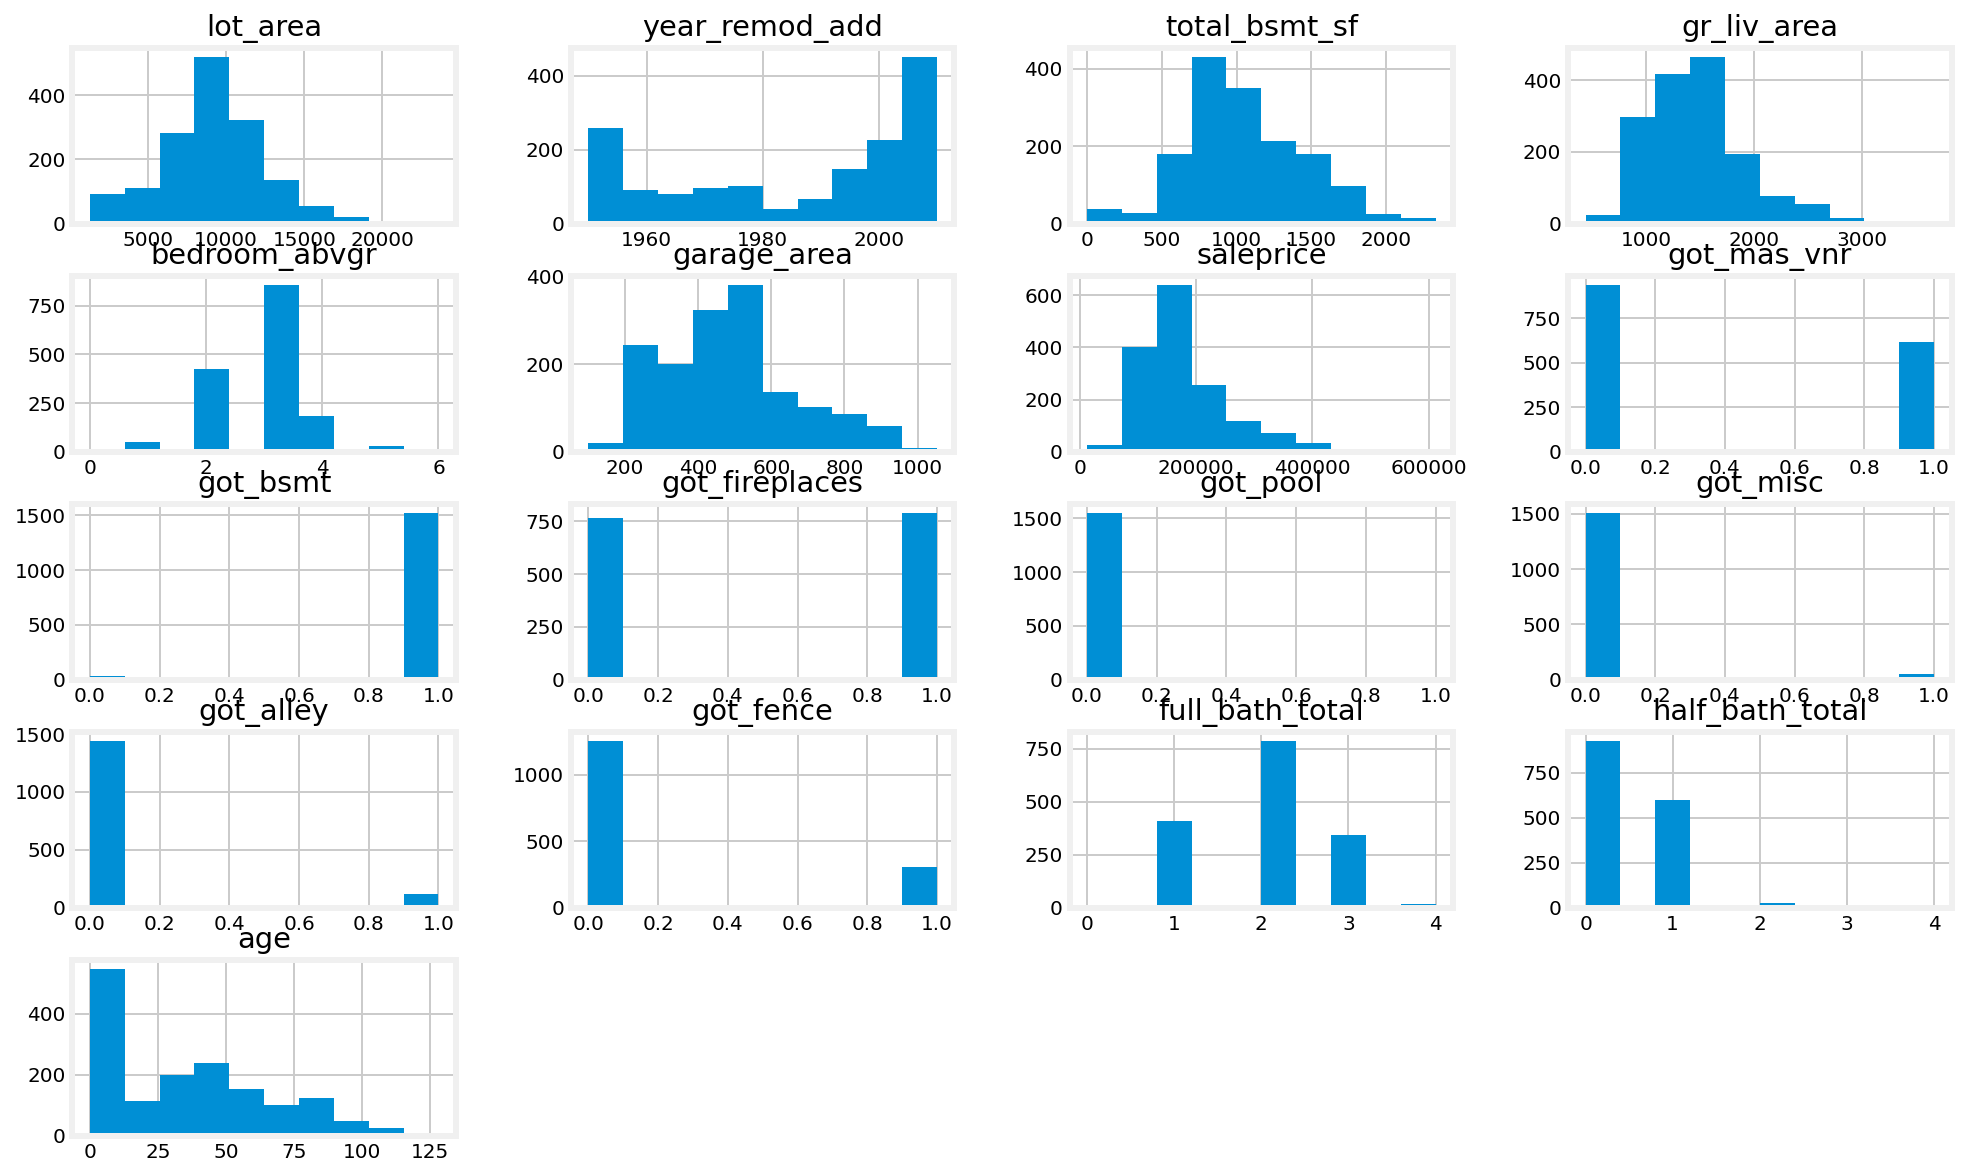

In [141]:
train_numeric.hist(figsize=(15, 10))

Above shows the histogram for the numeric variables of the Train dataset. We can see the general trend of the properties in our Train datatsetfor the properties. 

For example, most properties have at least 1 basement, and do not have a pool & miscellaneous features. 

The sale of properties were the highest for those less than 15 years old, and most garages & basements are around 500 & 1000 square feet respectively.  

#### Categorical Variables

In [142]:
# categorical variables that require encoding thereafter
train_categorical = train_no_outliers_3[['ms_zoning', 'street', 'alley',
                                         'utilities', 'lot_config', 'land_slope',
                                         'neighborhood', 'overall_qual', 'overall_cond',
                                         'roof_matl', 'exter_cond', 'foundation',
                                         'bsmt_cond', 'kitchen_qual', 'garage_cond',
                                         'paved_drive', 'sale_type', 'num_of_floors']]

train_categorical

ms_zoning street    alley utilities lot_config land_slope neighborhood  \
1           RL   Pave  NoAlley    AllPub    CulDSac        Gtl      SawyerW   
2           RL   Pave  NoAlley    AllPub     Inside        Gtl        NAmes   
3           RL   Pave  NoAlley    AllPub     Inside        Gtl       Timber   
4           RL   Pave  NoAlley    AllPub     Inside        Gtl      SawyerW   
5           RL   Pave  NoAlley    AllPub     Corner        Gtl        NAmes   
...        ...    ...      ...       ...        ...        ...          ...   
2045        RL   Pave  NoAlley    AllPub        FR2        Gtl      NridgHt   
2046        RL   Pave  NoAlley    AllPub     Inside        Gtl       Timber   
2048        RL   Pave  NoAlley    AllPub     Inside        Gtl      Crawfor   
2049        RL   Pave  NoAlley    AllPub     Corner        Gtl        NAmes   
2050        RL   Pave  NoAlley    AllPub     Inside        Gtl      Gilbert   

      overall_qual  overall_cond roof_matl exter_cond foundation bsmt_cond  \
1                7             5   CompShg         TA      PConc        TA   
2                5             7   CompShg         Gd     CBlock        TA   
3                5             5   CompShg         TA      PConc        TA   
4                6             8   CompShg         TA      PConc        Gd   
5                6             6   CompShg         TA     CBlock        TA   
...            ...           ...       ...        ...        ...       ...   
2045             8             5   CompShg         TA      PConc        TA   
2046             8             5   CompShg         TA      PConc        TA   
2048             6             6   CompShg         TA     BrkTil        TA   
2049             4             5   CompShg         TA     CBlock        TA   
2050             7             5   CompShg         TA      PConc        TA   

     kitchen_qual garage_cond paved_drive sale_type num_of_floors  
1              Gd          TA           Y       WD            two  
2              Gd          TA           Y       WD            one  
3              TA          TA           Y       WD            two  
4              TA          TA           N       WD       one_half  
5              Gd          TA           Y       WD            one  
...           ...         ...         ...       ...           ...  
2045           Ex          TA           Y       New           one  
2046           Gd          TA           Y       WD            one  
2048           TA          Fa           Y       WD       one_half  
2049           TA          TA           Y       WD            one  
2050           Gd          TA           Y       WD            two  

[1558 rows x 18 columns]

In [143]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 1 to 2050
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ms_zoning      1558 non-null   object
 1   street         1558 non-null   object
 2   alley          1558 non-null   object
 3   utilities      1558 non-null   object
 4   lot_config     1558 non-null   object
 5   land_slope     1558 non-null   object
 6   neighborhood   1558 non-null   object
 7   overall_qual   1558 non-null   int64 
 8   overall_cond   1558 non-null   int64 
 9   roof_matl      1558 non-null   object
 10  exter_cond     1558 non-null   object
 11  foundation     1558 non-null   object
 12  bsmt_cond      1558 non-null   object
 13  kitchen_qual   1558 non-null   object
 14  garage_cond    1558 non-null   object
 15  paved_drive    1558 non-null   object
 16  sale_type      1558 non-null   object
 17  num_of_floors  1558 non-null   object
dtypes: int64(2), object(16)
memo

# Data Analysis & Visualization

## Understanding our Target Variable: Saleprice

In [144]:
plt.style.use('fivethirtyeight')

# enable our graphs to be displayed inside the notebook.
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False

%config InlineBackend.figure_format = 'retina'

In [145]:
train_no_outliers_3.saleprice.describe()

#getting summary stats on my target variable

count      1558.000000
mean     180966.663671
std       76715.918216
min       12789.000000
25%      130000.000000
50%      161000.000000
75%      211750.000000
max      611657.000000
Name: saleprice, dtype: float64

<AxesSubplot:xlabel='saleprice'>

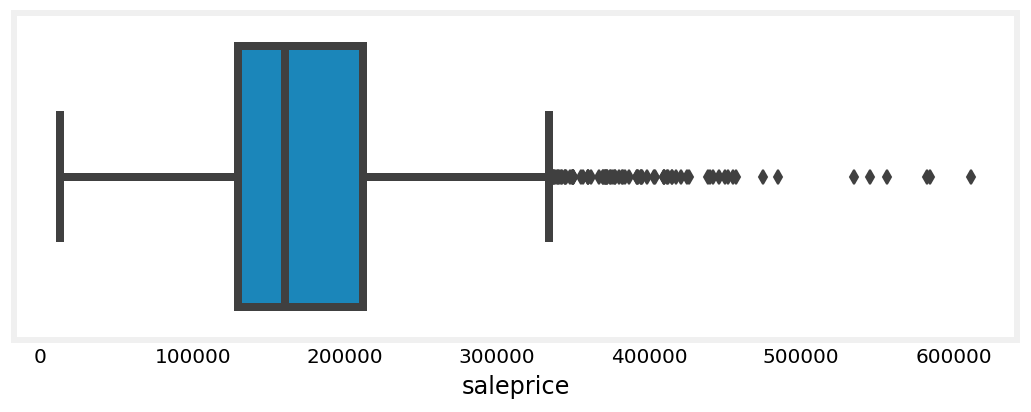

In [146]:
sns.boxplot(x=train_no_outliers_3["saleprice"])

Above is the boxplot for saleprice. It shows us the minimum and maximum values of saleprice. It also shows us the three quartiles represented by the box and the vertical line inside of it. We can see from the plot that most property prices fall between $130,000 (Q1) and $211,750 (Q3). Below, we plot the histogram of the variable to see a more detailed view of the distribution:

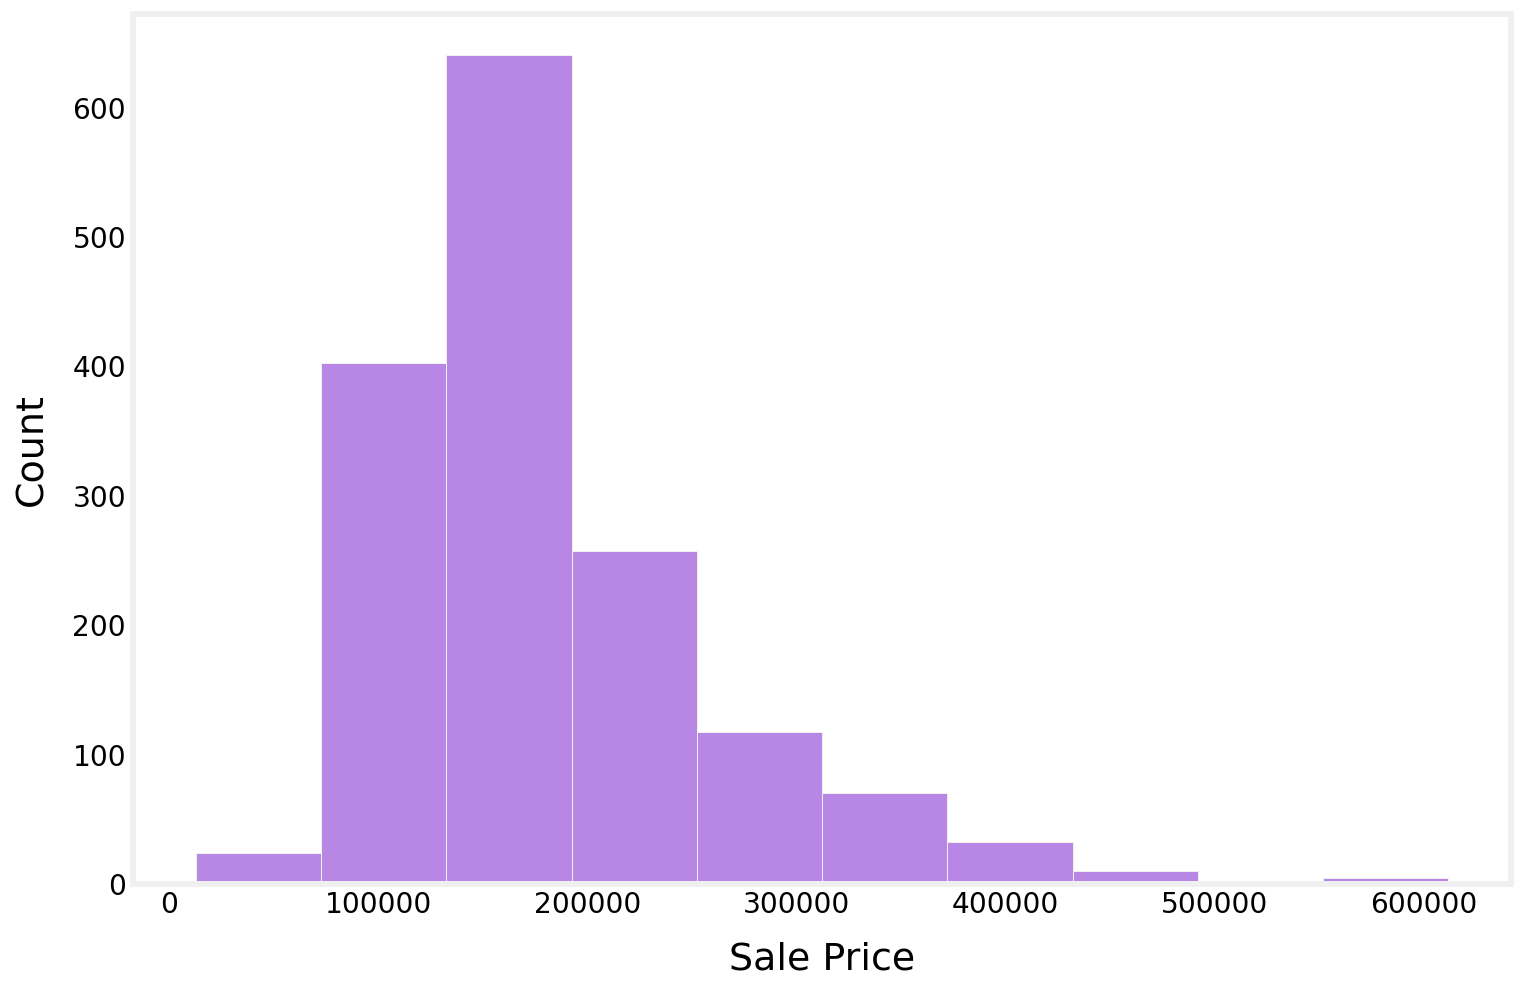

In [147]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.histplot(train_no_outliers_3.saleprice, kde=False, color='#A15EDB', bins=10)

plt.xlabel('Sale Price', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

#plt.savefig("sale_price.png");

#looking at the distribution of my target variable - saleprice

In [148]:
#summary statistics 
train_no_outliers_3.describe()

lot_area  overall_qual  overall_cond  year_remod_add  \
count   1558.000000   1558.000000   1558.000000     1558.000000   
mean    9323.402439      6.157253      5.583440     1984.619384   
std     3479.919344      1.387733      1.068211       21.277071   
min     1300.000000      1.000000      1.000000     1950.000000   
25%     7399.250000      5.000000      5.000000     1964.000000   
50%     9256.500000      6.000000      5.000000     1994.000000   
75%    11050.000000      7.000000      6.000000     2004.000000   
max    23580.000000     10.000000      9.000000     2010.000000   

       total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area      saleprice  \
count    1558.000000  1558.000000    1558.000000  1558.000000    1558.000000   
mean     1048.715019  1479.752888       2.820282   489.405648  180966.663671   
std       401.186330   464.239874       0.783451   181.817707   76715.918216   
min         0.000000   438.000000       0.000000   100.000000   12789.000000   
25%       789.000000  1134.250000       2.000000   336.000000  130000.000000   
50%       990.000000  1438.500000       3.000000   480.000000  161000.000000   
75%      1314.000000  1710.000000       3.000000   576.750000  211750.000000   
max      2330.000000  3672.000000       6.000000  1053.000000  611657.000000   

       got_mas_vnr     got_bsmt  got_fireplaces     got_pool     got_misc  \
count  1558.000000  1558.000000     1558.000000  1558.000000  1558.000000   
mean      0.397304     0.978819        0.507702     0.003851     0.030809   
std       0.489497     0.144034        0.500101     0.061957     0.172855   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%       0.000000     1.000000        0.000000     0.000000     0.000000   
50%       0.000000     1.000000        1.000000     0.000000     0.000000   
75%       1.000000     1.000000        1.000000     0.000000     0.000000   
max       1.000000     1.000000        1.000000     1.000000     1.000000   

         got_alley    got_fence  full_bath_total  half_bath_total          age  
count  1558.000000  1558.000000      1558.000000      1558.000000  1558.000000  
mean      0.073813     0.194480         1.974968         0.426829    35.598845  
std       0.261550     0.395927         0.725720         0.545407    30.576355  
min       0.000000     0.000000         0.000000         0.000000     0.000000  
25%       0.000000     0.000000         1.000000         0.000000     6.000000  
50%       0.000000     0.000000         2.000000         0.000000    33.000000  
75%       0.000000     0.000000         2.000000         1.000000    55.000000  
max       1.000000     1.000000         4.000000         4.000000   128.000000

## Correlation between Variables

### Correlation between predictors, excluding target variable: saleprice

In [149]:
# Correlation between predictors, excluding target variable: saleprice

train_no_outliers_3.corr()

lot_area  overall_qual  overall_cond  year_remod_add  \
lot_area         1.000000      0.167688     -0.055980        0.089573   
overall_qual     0.167688      1.000000     -0.148583        0.588194   
overall_cond    -0.055980     -0.148583      1.000000       -0.002600   
year_remod_add   0.089573      0.588194     -0.002600        1.000000   
total_bsmt_sf    0.316557      0.555406     -0.195633        0.331328   
gr_liv_area      0.395244      0.580562     -0.150146        0.320158   
bedroom_abvgr    0.254915      0.062046     -0.027349       -0.049686   
garage_area      0.340042      0.548155     -0.225069        0.440858   
saleprice        0.407876      0.809972     -0.148233        0.562557   
got_mas_vnr      0.114726      0.413802     -0.190570        0.251143   
got_bsmt        -0.027014      0.206255      0.072023        0.121645   
got_fireplaces   0.240197      0.416089     -0.052300        0.188565   
got_pool         0.067553      0.007892     -0.014563       -0.019837   
got_misc         0.076638     -0.060372      0.079984       -0.050072   
got_alley       -0.173197     -0.086854      0.025067       -0.059463   
got_fence       -0.015795     -0.211165      0.235711       -0.217412   
full_bath_total  0.210222      0.514733     -0.219753        0.466733   
half_bath_total  0.082075      0.193835     -0.069437        0.149770   
age             -0.084146     -0.610367      0.428547       -0.646772   

                 total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
lot_area              0.316557     0.395244       0.254915     0.340042   
overall_qual          0.555406     0.580562       0.062046     0.548155   
overall_cond         -0.195633    -0.150146      -0.027349    -0.225069   
year_remod_add        0.331328     0.320158      -0.049686     0.440858   
total_bsmt_sf         1.000000     0.405680       0.049706     0.501955   
gr_liv_area           0.405680     1.000000       0.526434     0.508921   
bedroom_abvgr         0.049706     0.526434       1.000000     0.131787   
garage_area           0.501955     0.508921       0.131787     1.000000   
saleprice             0.653585     0.730521       0.157995     0.661701   
got_mas_vnr           0.382095     0.271432       0.054003     0.337853   
got_bsmt              0.384656     0.067369       0.017469     0.047073   
got_fireplaces        0.300328     0.424012       0.072383     0.249242   
got_pool              0.009501     0.074836       0.027499    -0.000538   
got_misc             -0.051534    -0.035857       0.026684    -0.044110   
got_alley            -0.142286    -0.042689      -0.054326    -0.062136   
got_fence            -0.123655    -0.143970       0.025787    -0.196291   
full_bath_total       0.470384     0.480642       0.108433     0.463493   
half_bath_total      -0.092139     0.356890       0.214206     0.120371   
age                  -0.435771    -0.261468       0.039270    -0.488874   

                 saleprice  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  \
lot_area          0.407876     0.114726 -0.027014        0.240197  0.067553   
overall_qual      0.809972     0.413802  0.206255        0.416089  0.007892   
overall_cond     -0.148233    -0.190570  0.072023       -0.052300 -0.014563   
year_remod_add    0.562557     0.251143  0.121645        0.188565 -0.019837   
total_bsmt_sf     0.653585     0.382095  0.384656        0.300328  0.009501   
gr_liv_area       0.730521     0.271432  0.067369        0.424012  0.074836   
bedroom_abvgr     0.157995     0.054003  0.017469        0.072383  0.027499   
garage_area       0.661701     0.337853  0.047073        0.249242 -0.000538   
saleprice         1.000000     0.420714  0.148629        0.459718  0.032997   
got_mas_vnr       0.420714     1.000000  0.082998        0.238049  0.013049   
got_bsmt          0.148629     0.082998  1.000000        0.095889  0.009146   
got_fireplaces    0.459718     0.238049  0.095889        1.000000  0.061226   
got_pool          0.032997  

In [150]:
#mask_1
mask_1 = np.zeros_like(train_no_outliers_3.drop(columns = 'saleprice').corr())
triangle_indices = np.triu_indices_from(mask_1)
mask_1[triangle_indices] = True
mask_1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0

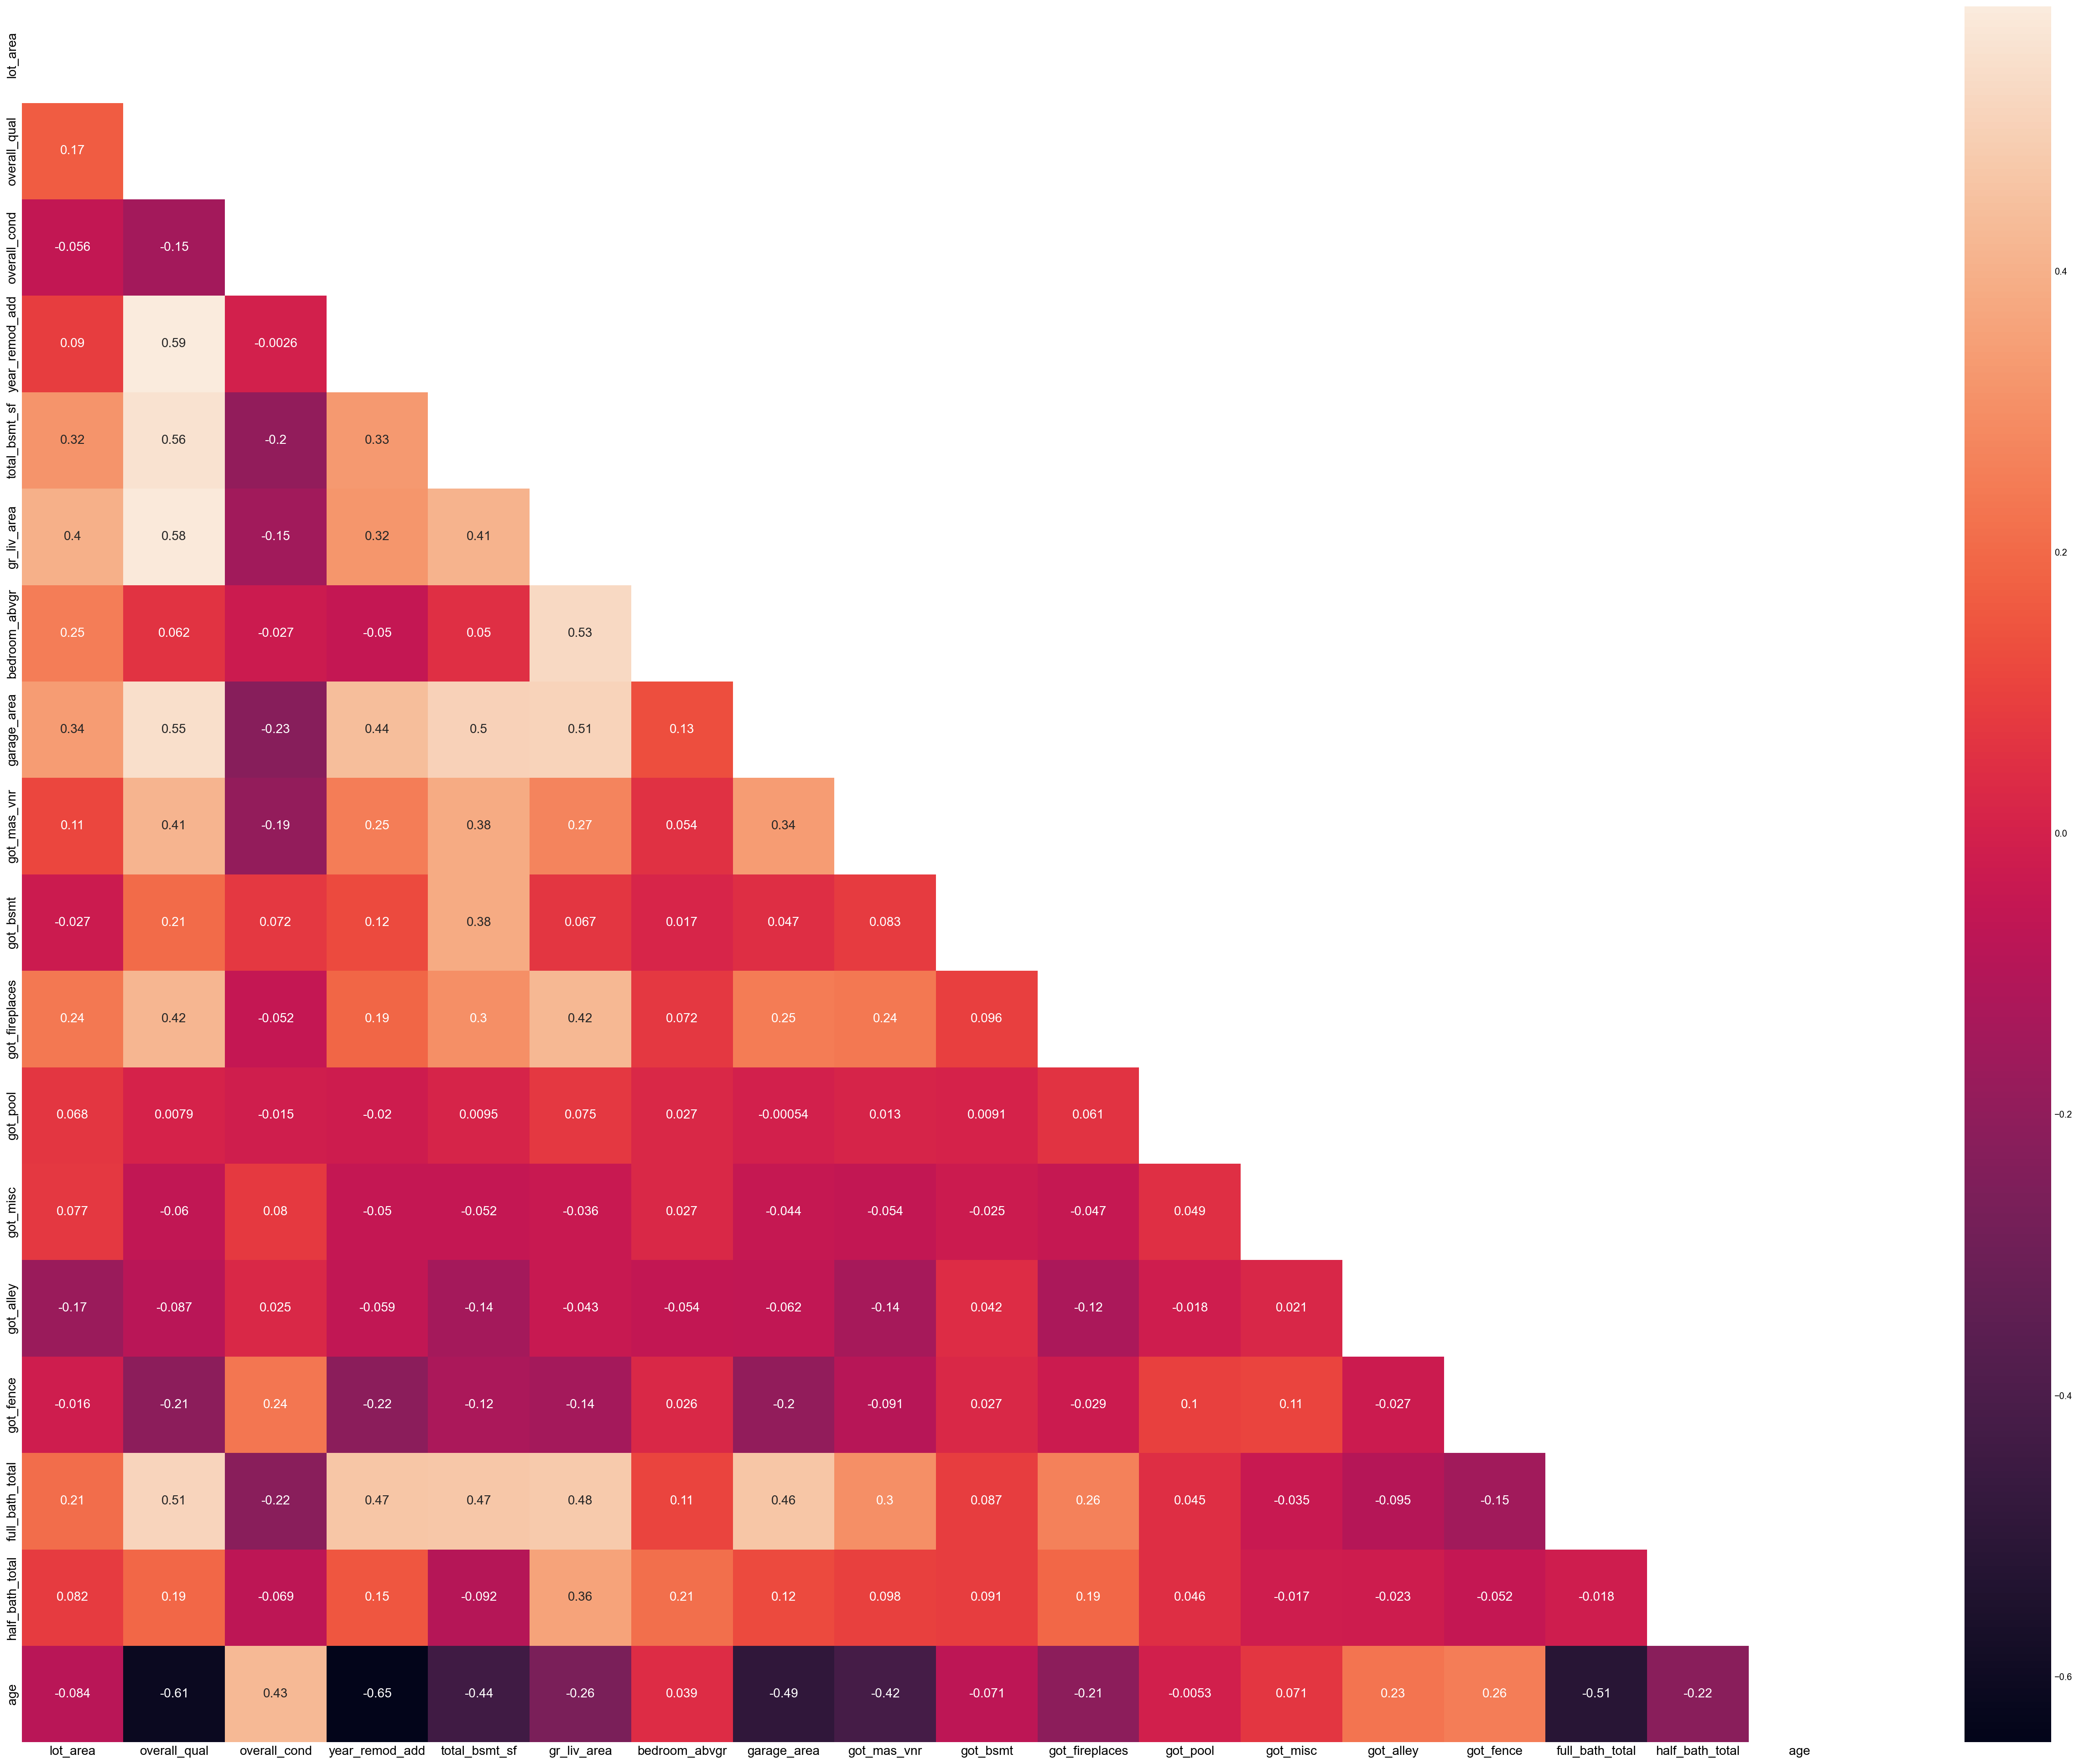

In [151]:
#heatmap for the train dataset

plt.figure(figsize=(40, 35))
sns.heatmap(train_no_outliers_3.drop(columns = 'saleprice').corr(), mask = mask_1, annot=True, annot_kws ={"size" : 14})
sns.set_style('white') #white background
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#correlation b/w all the predictors

**Interpretation**: The above image shows the correlation between all the predictors in the Train dataset. There appears to be no multicollinearity between the predictors as the r-squared value between the predictors are not closed to +1 or -1. 

In [152]:
train_no_outliers_3.drop(columns = 'saleprice').corr().unstack().sort_values(ascending = False)[:30]

lot_area         lot_area           1.000000
got_bsmt         got_bsmt           1.000000
year_remod_add   year_remod_add     1.000000
total_bsmt_sf    total_bsmt_sf      1.000000
gr_liv_area      gr_liv_area        1.000000
bedroom_abvgr    bedroom_abvgr      1.000000
garage_area      garage_area        1.000000
got_mas_vnr      got_mas_vnr        1.000000
got_fireplaces   got_fireplaces     1.000000
overall_qual     overall_qual       1.000000
got_pool         got_pool           1.000000
got_misc         got_misc           1.000000
got_alley        got_alley          1.000000
got_fence        got_fence          1.000000
full_bath_total  full_bath_total    1.000000
half_bath_total  half_bath_total    1.000000
overall_cond     overall_cond       1.000000
age              age                1.000000
overall_qual     year_remod_add     0.588194
year_remod_add   overall_qual       0.588194
gr_liv_area      overall_qual       0.580562
overall_qual     gr_liv_area        0.580562
          

In [153]:
train_no_outliers_3.drop(columns = 'saleprice').corr().unstack().sort_values(ascending = True)[:30]

age              year_remod_add    -0.646772
year_remod_add   age               -0.646772
age              overall_qual      -0.610367
overall_qual     age               -0.610367
full_bath_total  age               -0.514149
age              full_bath_total   -0.514149
                 garage_area       -0.488874
garage_area      age               -0.488874
age              total_bsmt_sf     -0.435771
total_bsmt_sf    age               -0.435771
got_mas_vnr      age               -0.420564
age              got_mas_vnr       -0.420564
gr_liv_area      age               -0.261468
age              gr_liv_area       -0.261468
overall_cond     garage_area       -0.225069
garage_area      overall_cond      -0.225069
half_bath_total  age               -0.220264
age              half_bath_total   -0.220264
overall_cond     full_bath_total   -0.219753
full_bath_total  overall_cond      -0.219753
got_fence        year_remod_add    -0.217412
year_remod_add   got_fence         -0.217412
got_firepl

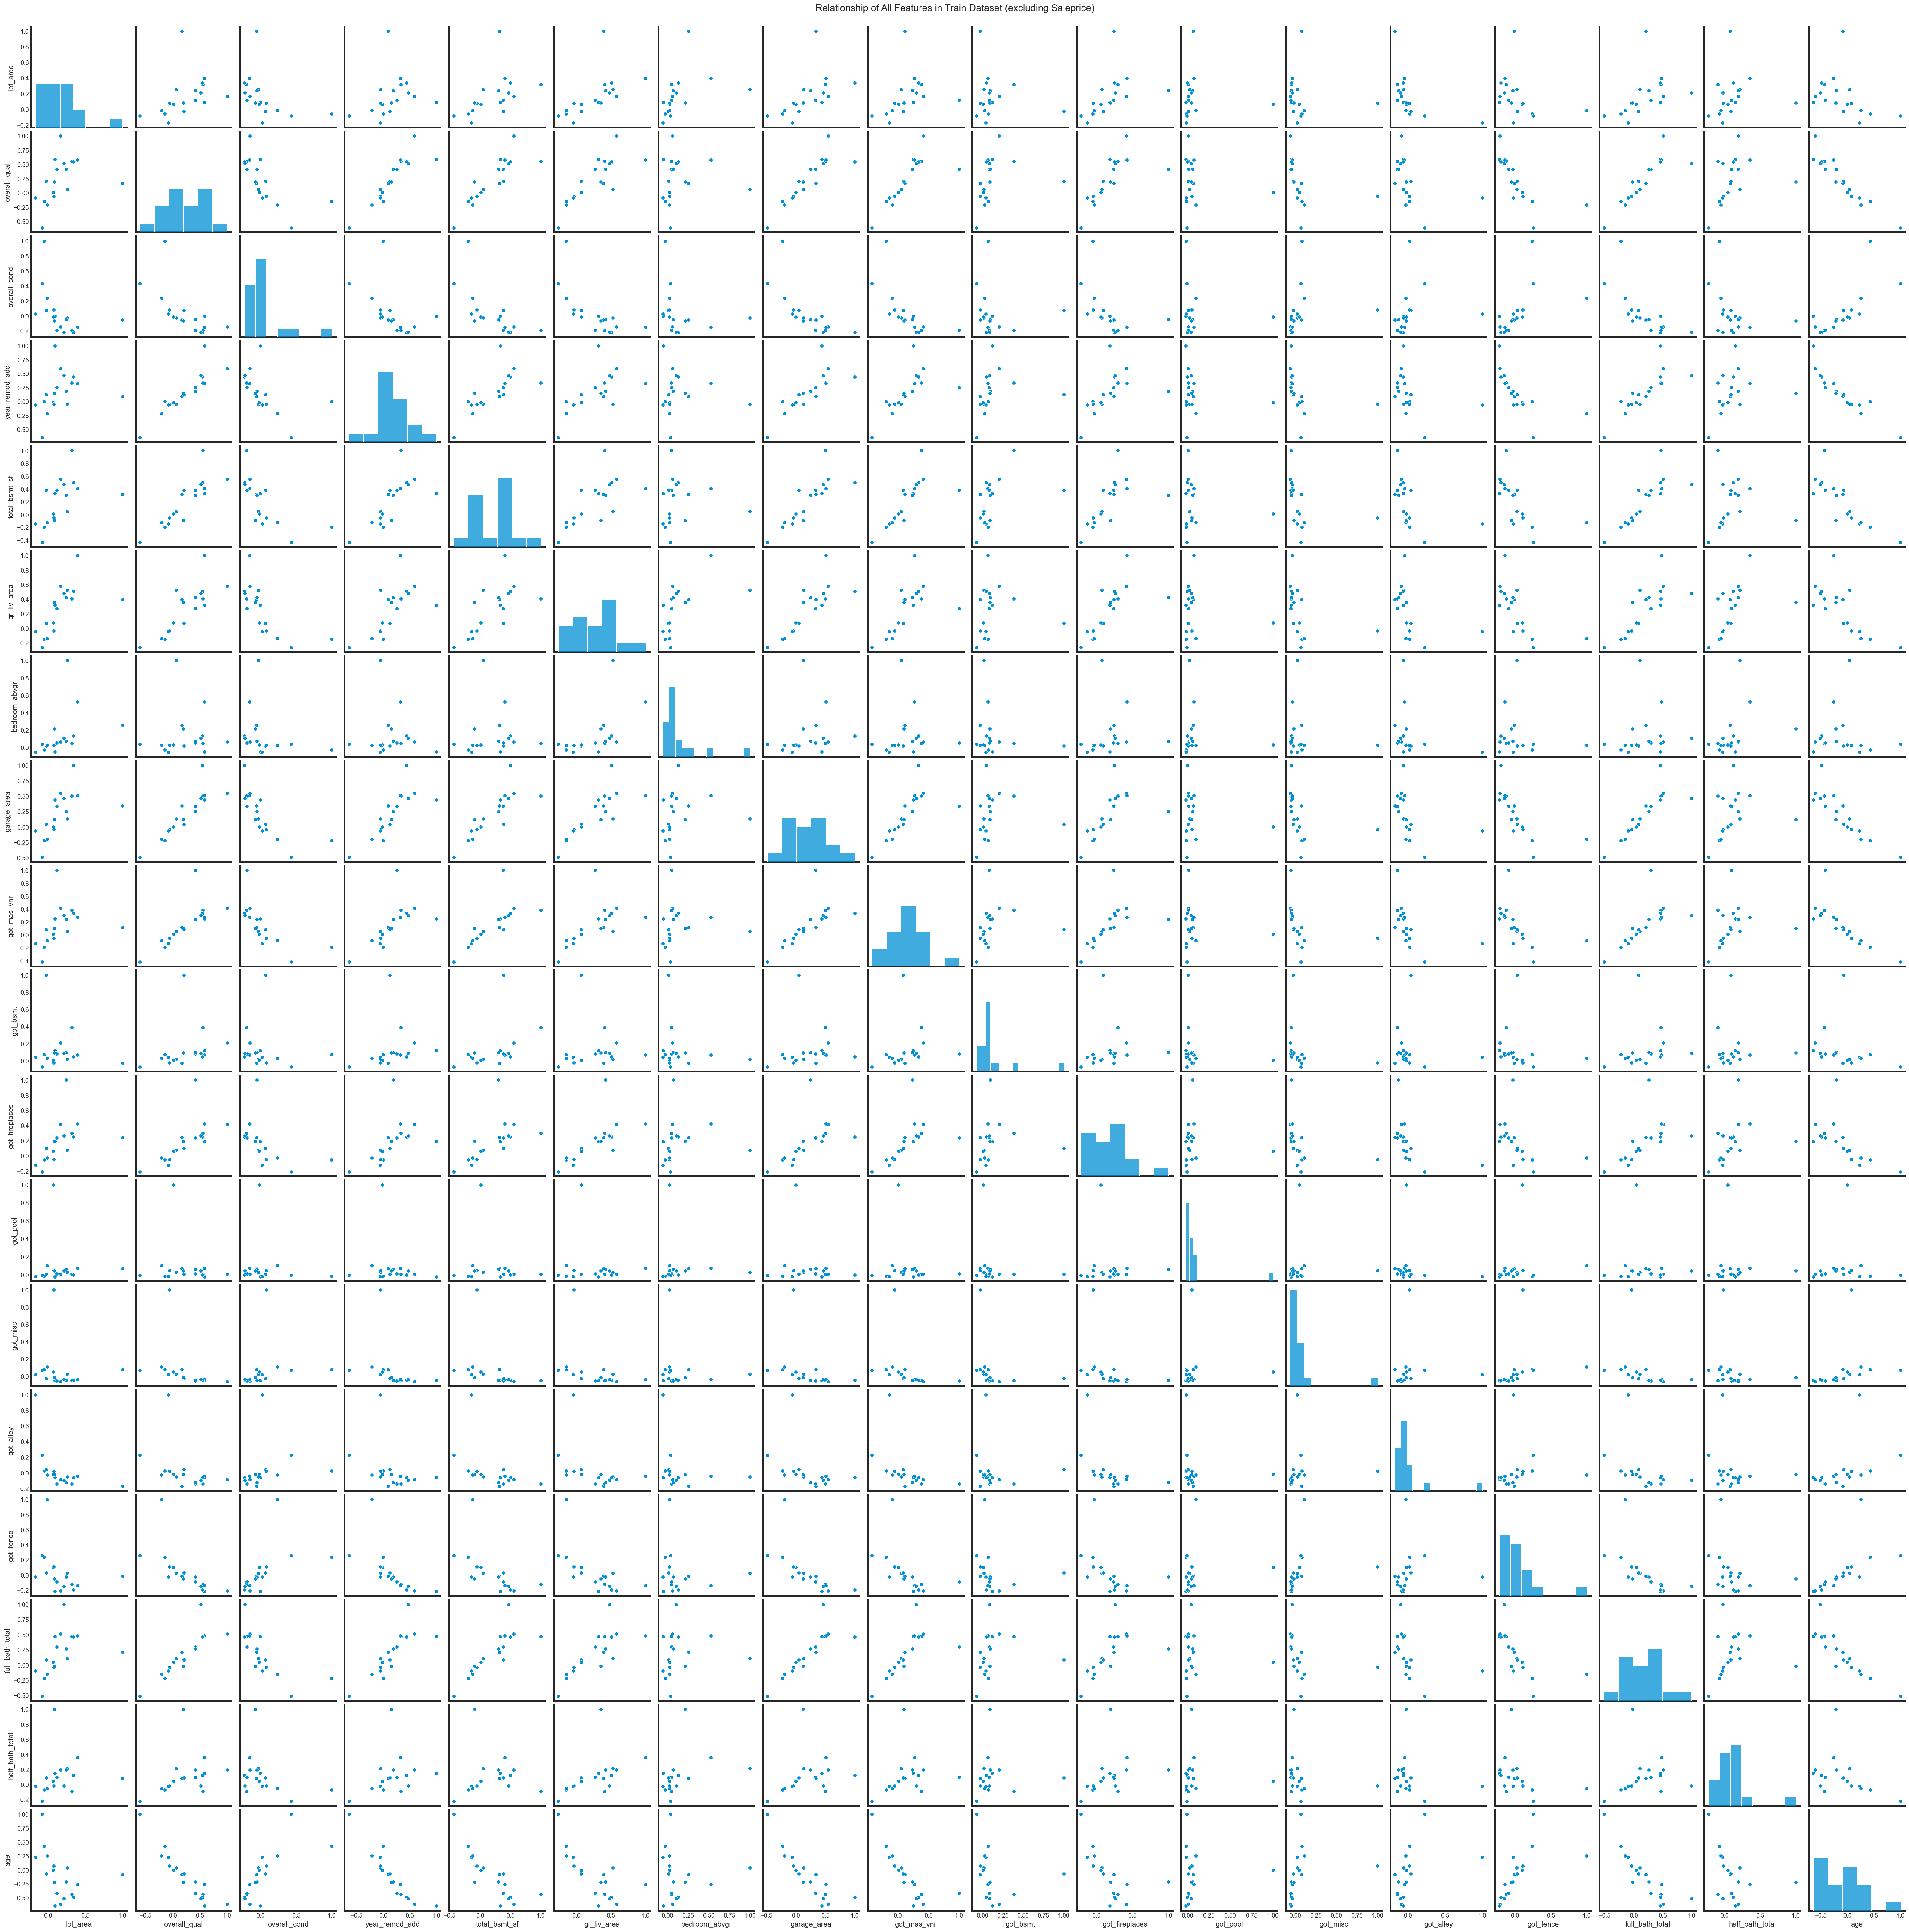

In [154]:
# check the relationship between every pair of variables
pair = sns.pairplot(train_no_outliers_3.drop(columns = 'saleprice').corr());
pair.fig.suptitle("Relationship of All Features in Train Dataset (excluding Saleprice)", y = 1, fontsize = 16);

**Interpretation**: The above image shows the relationship of all the features of the Train dataset, via a scatter plot. It is similar to the heatmap on correlation, but it provides the spread of data instead of the correlation coefficients.

### Correlation of predictors against target variable: saleprice

In [155]:
#mask_2
mask_2 = np.zeros_like(train_no_outliers_3.corr())
triangle_indices = np.triu_indices_from(mask_2)
mask_2[triangle_indices] = True
mask_2

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.

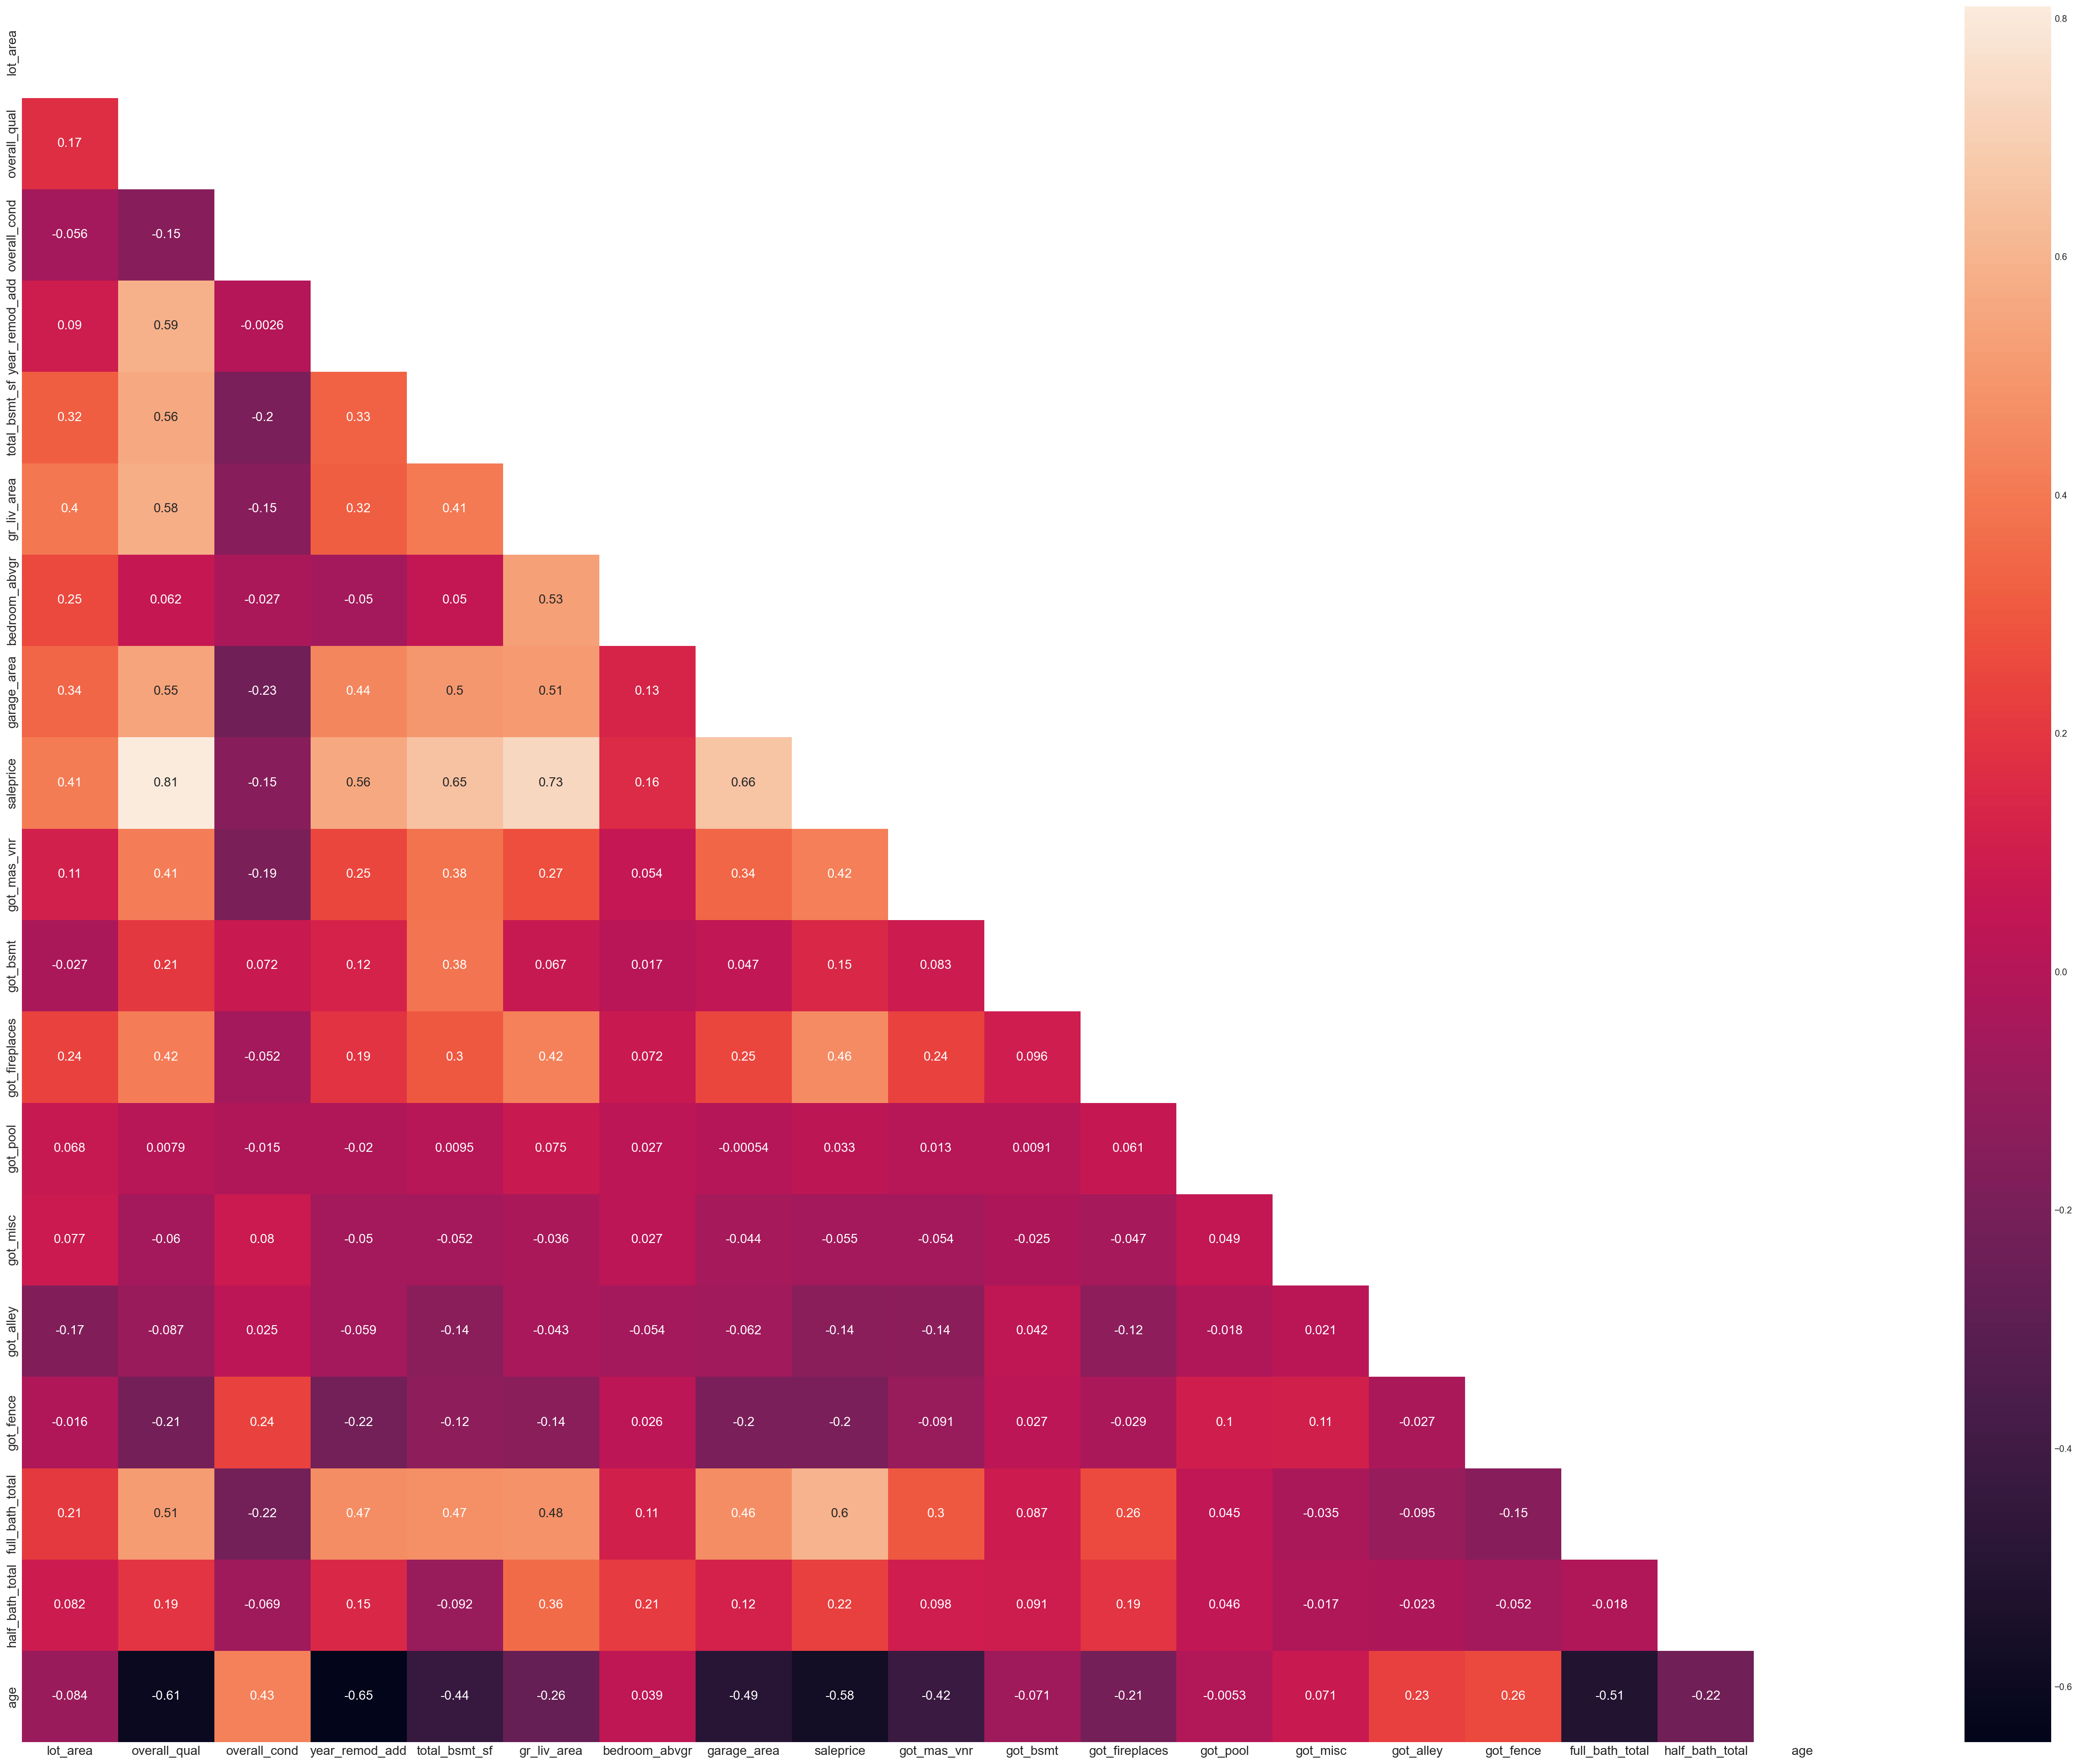

In [156]:
#correlation against the Target Variable: Saleprice

plt.figure(figsize=(40, 35))
sns.heatmap(train_no_outliers_3.corr(), mask = mask_2, annot=True, annot_kws ={"size" : 14})
sns.set_style('white') #white background for the top right mask triangle
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#note: correlation data is only valid for continuous variables

In [157]:
train_no_outliers_3.corr()['saleprice'].sort_values(ascending=False)[:10]

saleprice          1.000000
overall_qual       0.809972
gr_liv_area        0.730521
garage_area        0.661701
total_bsmt_sf      0.653585
full_bath_total    0.598304
year_remod_add     0.562557
got_fireplaces     0.459718
got_mas_vnr        0.420714
lot_area           0.407876
Name: saleprice, dtype: float64

In [158]:
train_no_outliers_3.corr()['saleprice'].sort_values(ascending=True)[:10]

age               -0.577859
got_fence         -0.195924
overall_cond      -0.148233
got_alley         -0.141584
got_misc          -0.055076
got_pool           0.032997
got_bsmt           0.148629
bedroom_abvgr      0.157995
half_bath_total    0.224855
lot_area           0.407876
Name: saleprice, dtype: float64

**Finding #1:**

As the overall quality of the property increases (that is, the overall material and finish of the house increases), the saleprice of the property would increase. This suggests that there is a positive linear relationship between the overall quality of the property and the saleprice of the property.

This is seen by the gentle increase in the boxplot below.

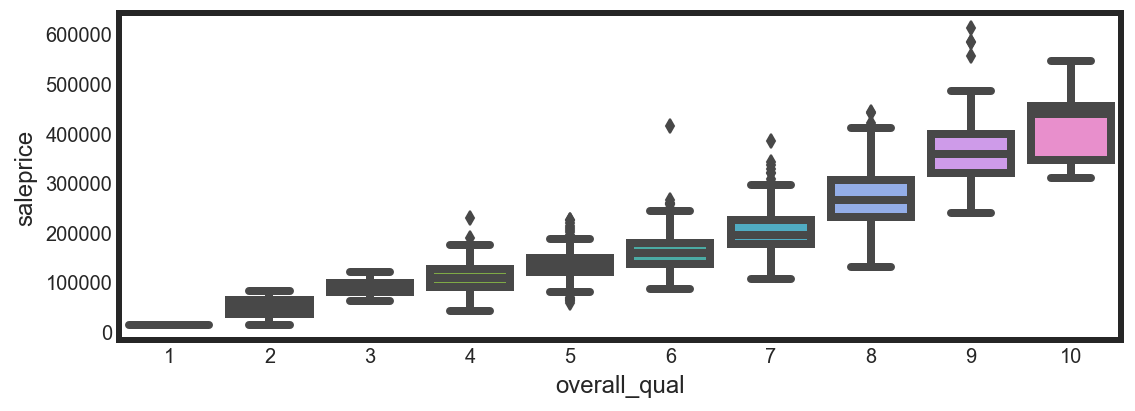

In [159]:
#overall_qual
sns.boxplot(data=train_no_outliers_3, x = 'overall_qual', y='saleprice')
plt.show()

**Finding #2:**

As the above grade (ground) living area square feet of the property increases, the saleprice of the property would increase. This suggests that there is a positive linear relationship between the above grade (ground) living area square feet of the property and the saleprice of the property.

This is seen by the gentle increase in the scatterplot below.

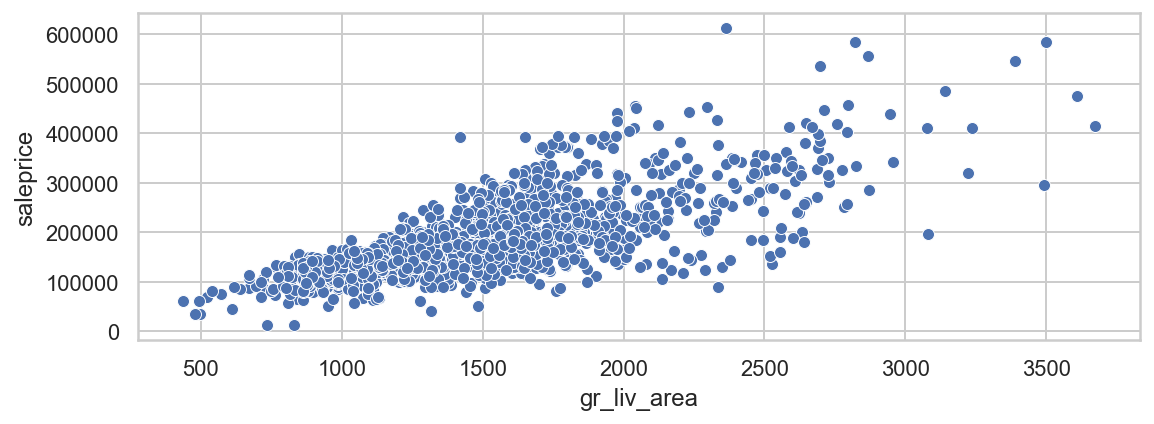

In [160]:
#gr_liv_area's scatterplot

sns.set_theme(style="whitegrid")
total_square_feet_scatterplot = sns.scatterplot(x="gr_liv_area", y="saleprice", data=train_no_outliers_3)

**Finding #3:**

As the overall condition of the property increases, the saleprice of the property remains stable unchanged. This suggests that there is no relationship between the overall condition of the property and the saleprice of the property. This means that the condition of the property at the point of sale, does not affect the saleprice of the property.

This is seen by the boxplot below.

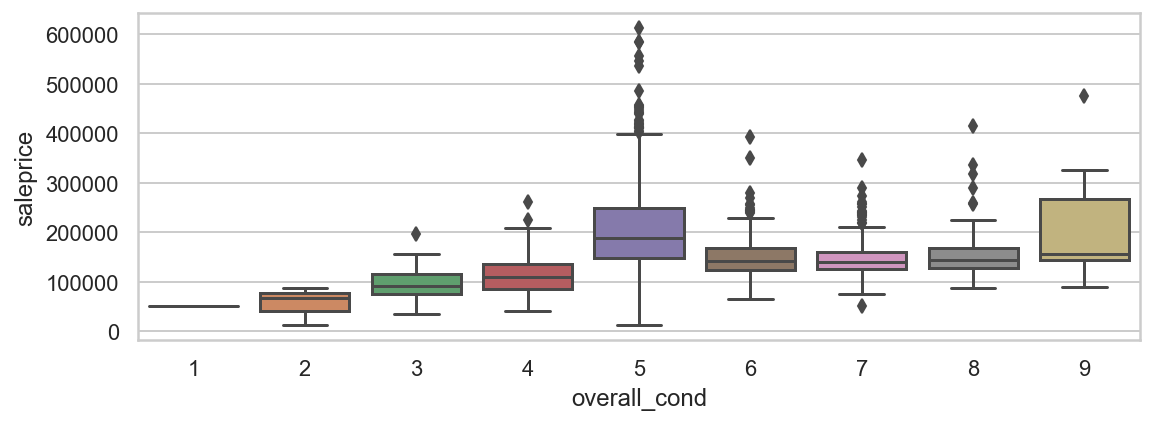

In [161]:
#overall_cond
sns.boxplot(data=train_no_outliers_3, x = 'overall_cond', y='saleprice')
plt.show()

**Finding #4:**

Likewise to finding #3, the presence of a pool or miscellaneous features to the property has little impact on the saleprice of the property. This suggests that this features are irrelevant to how valuable & attractive the property appears to be for potential buyers. 

This is seen by the boxplot below.

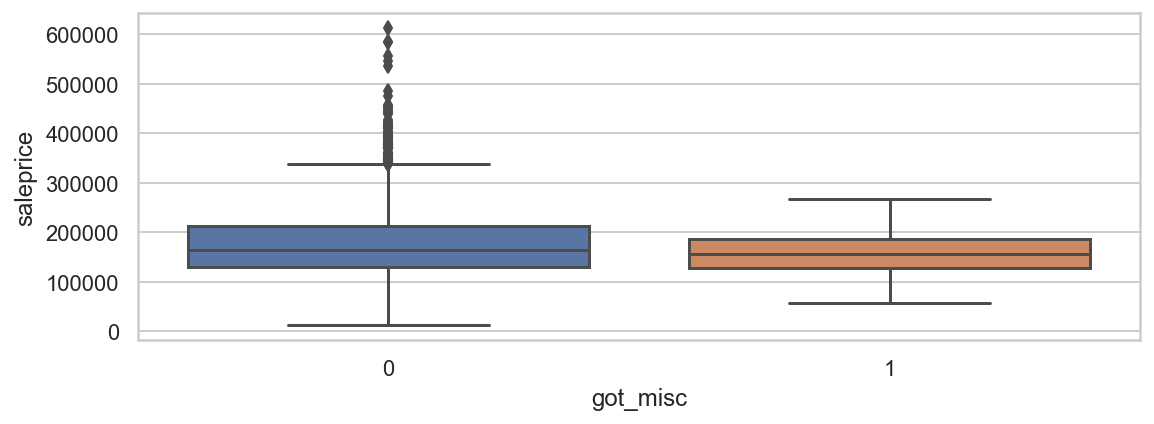

In [162]:
#got_misc

sns.boxplot(data=train_no_outliers_3, x = 'got_misc', y='saleprice')
plt.show()

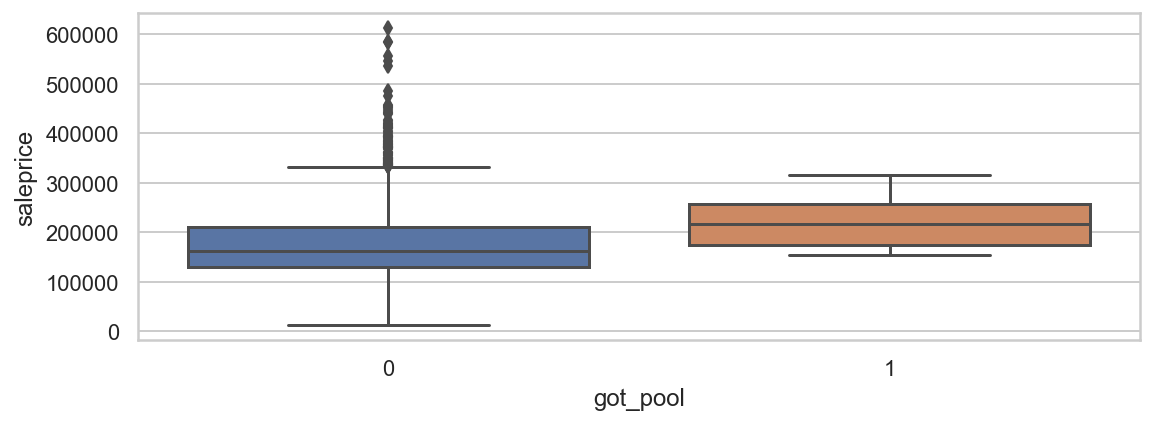

In [163]:
#got_pool

sns.boxplot(data=train_no_outliers_3, x = 'got_pool', y='saleprice')
plt.show()

**Finding #5:**

As the age of the property increases, there is a decrease in the saleprice for the property. This suggests that there is a slightly negative linear relationship between the age of the property and the price the property is able to fetch. 

This is seen by the gentle decrease in the scatterplot below. However, we do note that the decrease in the saleprice of the property is seen most significantly within the first 20 years of the property's age. Thereafter, the decrease is mostly slight and the saleprice of the property appears to be relatively stable from the 40th year onwards. From the 40th year onwards, the saleprice of the propery appears to no longer be correlated by the age of the property and remains unaffected by it. 

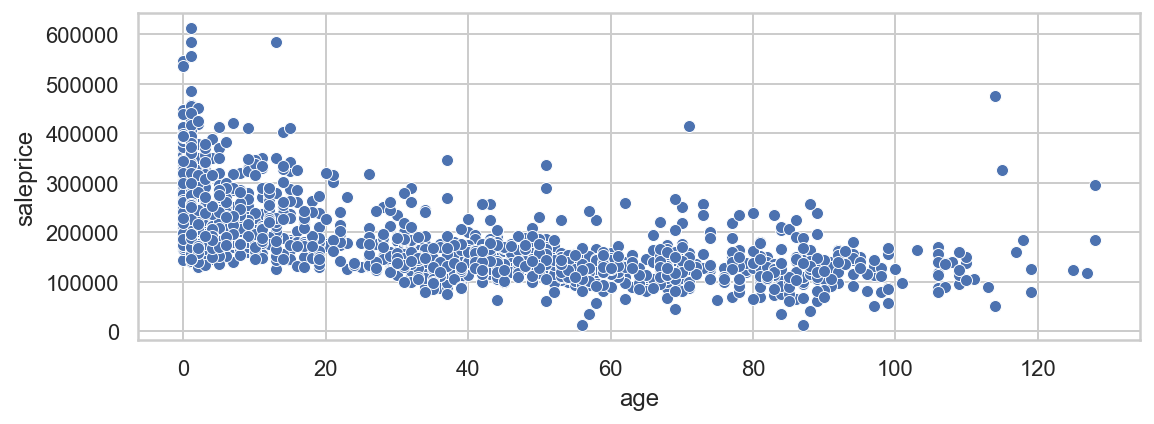

In [164]:
#age's scatterplot

sns.set_theme(style="whitegrid")
total_square_feet_scatterplot = sns.scatterplot(x="age", y="saleprice", data=train_no_outliers_3)

# Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---| 
|ms_zoning|*object*|train_4.csv & test_4.csv|Identifies the classification of the zone. The classifications are: Agriculture, Commercial, Floating Village Residential, Industrial, Residential High Density, Residential Low Density, Residential Low Density Park and Residential Medium Density. | 
|lot_area|*int*|train_4.csv & test_4.csv|Lot size in square feet.| 
|street|*object*|train_4.csv & test_4.csv|Identifies the type of road access to the property. The types are: Gravel and Paved.| 
|alley|*object*|train_4.csv & test_4.csv|Identifies the type of alley access to the property. The types are: Gravel, Paved or No Alley.| 
|utilities|*object*|train_4.csv & test_4.csv|Type of utilities available from a scale of 1 to 4, with 1 having only 'Electricity', and 4 having 'All Public Utilities (Electricity, Gas, Water, & Sewage).| 
|lot_config|*object*|train_4.csv & test_4.csv|Lot configuration of the properties. The configurations are: Inside lot, Corner lot, Cul-de-sac, Frontage on 2 sides of property, and Frontage on 3 sides of property.| 
|land_slope|*object*|train_4.csv & test_4.csv|Slope of property from a scale of 1 to 3, with 1 being a 'Gentle Slope' and 3 being a Severe Slope.| 
|neighborhood|*object*|train_4.csv & test_4.csv|Properties that are physically located in the neighborhoods within Ames city limits. The neighbourhoods are: Bloomington Heights, Bluestem, Briardale, Brookside, Clear Creek, College Creek, Crawford, Edwards, Gilbert, Greens, Green Hills, Iowa DOT and Rail Road, Landmark, Meadow Village, Mitchell, North Ames, Northridge, Northpark Villa, Northridge Heights, Northwest Ames, Old Town, South & West of Iowa State University, Sawyer, Sawyer West, Somerset, Stone Brook, Timberland, and Veenker.| 
|overall_qual|*int*|train_4.csv & test_4.csv|Rates the overall material and finish of the house from a scale of 1 to 10, with 1 being 'Very Poor' and 10 being 'Excellent'.| 
|overall_cond|*int*|train_4.csv & test_4.csv|Rates the overall condition of the house from a scale of 1 to 10, with 1 being 'Very Poor' and 10 being 'Excellent'.| 
|year_remod_add|*int*|train_4.csv & test_4.csv|Remodel date of the property (same as construction date if no remodeling or additions)| 
|roof_matl|*object*|train_4.csv & test_4.csv|Roof material of the property. They are: Clay or Tile, Standard (Composite) Shingle, Membrane, Metal, Roll, Gravel & Tar, Wood Shakes, and Wood Shingles.| 
|exter_cond|*object*|train_4.csv & test_4.csv|Evaluates the present condition of the material on the exterior from a scale of 1 to 5, with 1 being 'Poor' and 5 being 'Excellent'.|
|foundation|*object*|train_4.csv & test_4.csv|Type of foundation of the property. They are: Brick & Tile, Cinder Block, Poured Contrete, Slab, Stone, and Wood.| 
|bsmt_cond|*object*|train_4.csv & test_4.csv|Evaluates the general condition of the basement from a scale of 1 to 6, with 1 indicating there is no basement and 6 being 'Excellent'.| 
|total_bsmt_sf|*float* & *int*|train_4.csv & test_4.csv|Total square feet of basement area.| 
|gr_liv_area|*int*|train_4.csv & test_4.csv|Above grade (ground) living area square feet.| 
|bedroom_abvgr|*int*|train_4.csv & test_4.csv|Number of bedrooms above grade (does NOT include basement bedrooms)| 
|kitchen_qual|*object*|train_4.csv & test_4.csv|Kitchen quality from a scale of 1 to 5, with 1 being 'Poor' and 5 being 'Excellent'.|  
|garage_area|*float* & *int*|train_4.csv & test_4.csv|Size of garage in square feet| 
|garage_cond|*object*|train_4.csv & test_4.csv|Evaluates the garage condition from a scale of 1 to 6, with 1 indicating there is no garage and 6 being 'Excellent'.|
|paved_drive |*object*|train_4.csv & test_4.csv|Evaluates the paved driveway from a scale of 1 to 3, with 1 indicating it is 'Dirt/Gravel', and 3 being 'Paved'.| 
|sale_type|*object*|train_4.csv & test_4.csv|Sale type of the property at the point of sale. The types are: Warranty Deed - Conventional, Warranty Deed - Cash, Warranty Deed - VA Loan. Home just constructed and sold, Court Officer Deed/Estate. Contract 15% Down payment regular terms, Contract Low Down payment and low interest, Contract Low Interest, Contract Low Down, and Other.| 
|saleprice|*int*|train_4.csv|Saleprice of the property in dollars.| 
|got_mas_vnr|*int*|train_4.csv & test_4.csv|Determines if the property has a masonry veneer or not, with 1 indicating there is. Otherwise, it is indicated as 0.| 
|got_bsmt|*int*|train_4.csv & test_4.csv|Determines if the property has basement(s) or not, with 1 indicating there is. Otherwise, it is indicated as 0.| 
|got_fireplaces|*int*|train_4.csv & test_4.csv|Determines if the property has fireplace(s) or not, with 1 indicating there is. Otherwise, it is indicated as 0.| 
|got_pool|*int*|train_4.csv & test_4.csv|Determines if the property has pool(s) or not, with 1 indicating there is. Otherwise, it is indicated as 0.| 
|got_misc|*int*|train_4.csv & test_4.csv|Determines if the property has miscellaneous features (that are not covered in other categories) or not, with 1 indicating there is. Otherwise, it is indicated as 0. Miscellaneous featuress such as an Elevator, 2nd Garage, Shed, Tennis Court, or others.|  
|got_alley|*int*|train_4.csv & test_4.csv|Determines if the property has alley(s) or not, with 1 indicating there is. Otherwise, it is indicated as 0.| 
|got_fence|*int*|train_4.csv & test_4.csv|Determines if the property has fences or not, with 1 indicating there is. Otherwise, it is indicated as 0.| 
|full_bath_total|*float* or *int*|train_4.csv & test_4.csv|Evaluates the total number of full bathrooms in the property.| 
|half_bath_total|*float* & *int*|train_4.csv & test_4.csv|Evaluates the total number of half bathrooms in the property.| 
|age|*int*|train_4.csv & test_4.csv|Age of the Property, which is determined by the year it was sold minus the year it was built.| 
|num_of_floors|*object*|train_4.csv & test_4.csv|Number of furnished floors the property has. Otherwise, it is indicated as 0.| 

# Encoding

In [165]:
train_categorical.columns

Index(['ms_zoning', 'street', 'alley', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'overall_qual', 'overall_cond', 'roof_matl',
       'exter_cond', 'foundation', 'bsmt_cond', 'kitchen_qual', 'garage_cond',
       'paved_drive', 'sale_type', 'num_of_floors'],
      dtype='object')

In [166]:
train_no_outliers_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 1 to 2050
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_zoning        1558 non-null   object 
 1   lot_area         1558 non-null   int64  
 2   street           1558 non-null   object 
 3   alley            1558 non-null   object 
 4   utilities        1558 non-null   object 
 5   lot_config       1558 non-null   object 
 6   land_slope       1558 non-null   object 
 7   neighborhood     1558 non-null   object 
 8   overall_qual     1558 non-null   int64  
 9   overall_cond     1558 non-null   int64  
 10  year_remod_add   1558 non-null   int64  
 11  roof_matl        1558 non-null   object 
 12  exter_cond       1558 non-null   object 
 13  foundation       1558 non-null   object 
 14  bsmt_cond        1558 non-null   object 
 15  total_bsmt_sf    1558 non-null   float64
 16  gr_liv_area      1558 non-null   int64  
 17  bedroom_abvgr 

## Data Cleaning for Ordinal Variables

In [167]:
#find the list of unique values for ordinal variables

train_no_outliers_3['utilities'].unique()

array(['AllPub', 'NoSewr'], dtype=object)

In [168]:
train_no_outliers_3['land_slope'].unique()

array(['Gtl', 'Sev', 'Mod'], dtype=object)

In [169]:
train_no_outliers_3['overall_qual'].unique()

array([ 7,  5,  6,  8,  4,  9, 10,  1,  2,  3])

In [170]:
train_no_outliers_3['overall_cond'].unique()

array([5, 7, 8, 6, 3, 9, 4, 2, 1])

In [171]:
train_no_outliers_3['exter_cond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [172]:
train_no_outliers_3['bsmt_cond'].unique()

array(['TA', 'Gd', 'Fa', 'NoBasement', 'Ex', 'Po'], dtype=object)

In [173]:
train_no_outliers_3['kitchen_qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [174]:
train_no_outliers_3['garage_cond'].unique()

array(['TA', 'Fa', 'Po', 'Gd', 'Ex'], dtype=object)

In [175]:
train_no_outliers_3['paved_drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [176]:
train_no_outliers_3['num_of_floors'].unique()

array(['two', 'one', 'one_half', 'Others', 'two_half'], dtype=object)

In [177]:
#arrange the unique values in ascending order of importance

utilities_oe = ['NoSewr', 'AllPub']

In [178]:
land_slope_oe = ['Sev', 'Mod', 'Gtl']

In [179]:
overall_qual_oe = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [180]:
overall_cond_oe = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [181]:
exter_cond_oe = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [182]:
bsmt_cond_oe = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

In [183]:
kitchen_qual_oe = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [184]:
garage_cond_oe = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [185]:
paved_drive_oe = ['N', 'P', 'Y']

In [186]:
num_of_floors_oe = ['Others', 'one', 'one_half', 'two', 'two_half']

In [187]:
#apply OrdinalEncoder

ordi_1 = OrdinalEncoder(categories = [utilities_oe, land_slope_oe, overall_qual_oe,
                                    overall_cond_oe, exter_cond_oe, bsmt_cond_oe,
                                    kitchen_qual_oe, garage_cond_oe, paved_drive_oe,
                                    num_of_floors_oe])

In [188]:
#fitting the model & transforming it

ordi_1.fit_transform(train_no_outliers_3[['utilities', 'land_slope', 'overall_qual',
                                        'overall_cond', 'exter_cond', 'bsmt_cond',
                                        'kitchen_qual', 'garage_cond', 'paved_drive',
                                        'num_of_floors']])

array([[1., 2., 6., ..., 2., 2., 3.],
       [1., 2., 4., ..., 2., 2., 1.],
       [1., 2., 4., ..., 2., 2., 3.],
       ...,
       [1., 2., 5., ..., 1., 2., 2.],
       [1., 2., 3., ..., 2., 2., 1.],
       [1., 2., 6., ..., 2., 2., 3.]])

In [189]:
train_ordinal_float_array = ordi_1.fit_transform(train_no_outliers_3[['utilities', 'land_slope', 'overall_qual',
                                        'overall_cond', 'exter_cond', 'bsmt_cond',
                                        'kitchen_qual', 'garage_cond', 'paved_drive',
                                        'num_of_floors']])

In [190]:
train_ordinal_int_array = train_ordinal_float_array.astype(int)

In [191]:
train_ordinal_int_array

array([[1, 2, 6, ..., 2, 2, 3],
       [1, 2, 4, ..., 2, 2, 1],
       [1, 2, 4, ..., 2, 2, 3],
       ...,
       [1, 2, 5, ..., 1, 2, 2],
       [1, 2, 3, ..., 2, 2, 1],
       [1, 2, 6, ..., 2, 2, 3]])

In [192]:
train_ordinal_int_array.dtype

dtype('int64')

In [193]:
train_no_outliers_3

ms_zoning  lot_area street    alley utilities lot_config land_slope  \
1           RL     11492   Pave  NoAlley    AllPub    CulDSac        Gtl   
2           RL      7922   Pave  NoAlley    AllPub     Inside        Gtl   
3           RL      9802   Pave  NoAlley    AllPub     Inside        Gtl   
4           RL     14235   Pave  NoAlley    AllPub     Inside        Gtl   
5           RL     16492   Pave  NoAlley    AllPub     Corner        Gtl   
...        ...       ...    ...      ...       ...        ...        ...   
2045        RL     12444   Pave  NoAlley    AllPub        FR2        Gtl   
2046        RL     11449   Pave  NoAlley    AllPub     Inside        Gtl   
2048        RL      7558   Pave  NoAlley    AllPub     Inside        Gtl   
2049        RL     10400   Pave  NoAlley    AllPub     Corner        Gtl   
2050        RL      7500   Pave  NoAlley    AllPub     Inside        Gtl   

     neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
1         SawyerW             7             5  ...         1              1   
2           NAmes             5             7  ...         1              0   
3          Timber             5             5  ...         1              0   
4         SawyerW             6             8  ...         1              0   
5           NAmes             6             6  ...         1              1   
...           ...           ...           ...  ...       ...            ...   
2045      NridgHt             8             5  ...         1              1   
2046       Timber             8             5  ...         1              1   
2048      Crawfor             6             6  ...         1              1   
2049        NAmes             4             5  ...         1              1   
2050      Gilbert             7             5  ...         1              1   

     got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
1           0        0         0          0              3.0              1.0   
2           0        0         0          0              2.0              0.0   
3           0        0         0          0              2.0              1.0   
4           0        0         0          0              2.0              0.0   
5           0        0         0          0              2.0              1.0   
...       ...      ...       ...        ...              ...              ...   
2045        0        0         0          0              3.0              0.0   
2046        0        0         0          0              3.0              0.0   
2048        0        0         0          0              1.0              1.0   
2049        0        0         0          0              2.0              0.0   
2050        0        0         0          0              2.0              1.0   

      age  num_of_floors  
1      13            two  
2      57            one  
3       4            two  
4     110       one_half  
5      44            one  
...   ...            ...  
2045    0            one  
2046    1            one  
2048   81       one_half  
2049   53            one  
2050   11            two  

[1558 rows x 35 columns]

In [194]:
train_4 = train_no_outliers_3.copy()

In [195]:
train_4[['utilities', 'land_slope', 'overall_qual',
         'overall_cond', 'exter_cond', 'bsmt_cond',
         'kitchen_qual', 'garage_cond', 'paved_drive',
         'num_of_floors']] = train_ordinal_int_array

In [196]:
train_4

ms_zoning  lot_area street    alley  utilities lot_config  land_slope  \
1           RL     11492   Pave  NoAlley          1    CulDSac           2   
2           RL      7922   Pave  NoAlley          1     Inside           2   
3           RL      9802   Pave  NoAlley          1     Inside           2   
4           RL     14235   Pave  NoAlley          1     Inside           2   
5           RL     16492   Pave  NoAlley          1     Corner           2   
...        ...       ...    ...      ...        ...        ...         ...   
2045        RL     12444   Pave  NoAlley          1        FR2           2   
2046        RL     11449   Pave  NoAlley          1     Inside           2   
2048        RL      7558   Pave  NoAlley          1     Inside           2   
2049        RL     10400   Pave  NoAlley          1     Corner           2   
2050        RL      7500   Pave  NoAlley          1     Inside           2   

     neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
1         SawyerW             6             4  ...         1              1   
2           NAmes             4             6  ...         1              0   
3          Timber             4             4  ...         1              0   
4         SawyerW             5             7  ...         1              0   
5           NAmes             5             5  ...         1              1   
...           ...           ...           ...  ...       ...            ...   
2045      NridgHt             7             4  ...         1              1   
2046       Timber             7             4  ...         1              1   
2048      Crawfor             5             5  ...         1              1   
2049        NAmes             3             4  ...         1              1   
2050      Gilbert             6             4  ...         1              1   

      got_pool got_misc  got_alley  got_fence  full_bath_total  \
1            0        0          0          0              3.0   
2            0        0          0          0              2.0   
3            0        0          0          0              2.0   
4            0        0          0          0              2.0   
5            0        0          0          0              2.0   
...        ...      ...        ...        ...              ...   
2045         0        0          0          0              3.0   
2046         0        0          0          0              3.0   
2048         0        0          0          0              1.0   
2049         0        0          0          0              2.0   
2050         0        0          0          0              2.0   

      half_bath_total  age  num_of_floors  
1                 1.0   13              3  
2                 0.0   57              1  
3                 1.0    4              3  
4                 0.0  110              2  
5                 1.0   44              1  
...               ...  ...            ...  
2045              0.0    0              1  
2046              0.0    1              1  
2048              1.0   81              2  
2049              0.0   53              1  
2050              1.0   11              3  

[1558 rows x 35 columns]

In [197]:
train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 1 to 2050
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_zoning        1558 non-null   object 
 1   lot_area         1558 non-null   int64  
 2   street           1558 non-null   object 
 3   alley            1558 non-null   object 
 4   utilities        1558 non-null   int64  
 5   lot_config       1558 non-null   object 
 6   land_slope       1558 non-null   int64  
 7   neighborhood     1558 non-null   object 
 8   overall_qual     1558 non-null   int64  
 9   overall_cond     1558 non-null   int64  
 10  year_remod_add   1558 non-null   int64  
 11  roof_matl        1558 non-null   object 
 12  exter_cond       1558 non-null   int64  
 13  foundation       1558 non-null   object 
 14  bsmt_cond        1558 non-null   int64  
 15  total_bsmt_sf    1558 non-null   float64
 16  gr_liv_area      1558 non-null   int64  
 17  bedroom_abvgr 

## Data Cleaning for Nominal Variables

For Nominal Variables whose datatypes are objects, we will apply get_dummies.

In [198]:
train_4.select_dtypes(include='object').columns

Index(['ms_zoning', 'street', 'alley', 'lot_config', 'neighborhood',
       'roof_matl', 'foundation', 'sale_type'],
      dtype='object')

In [199]:
to_dummy = ['ms_zoning', 'street', 'alley', 'lot_config', 'neighborhood',
       'roof_matl', 'foundation', 'sale_type']

In [200]:
train_4 = pd.get_dummies(train_4, columns = to_dummy, drop_first = True)

In [201]:
train_4.shape

(1558, 81)

In [202]:
train_4

lot_area  utilities  land_slope  overall_qual  overall_cond  \
1        11492          1           2             6             4   
2         7922          1           2             4             6   
3         9802          1           2             4             4   
4        14235          1           2             5             7   
5        16492          1           2             5             5   
...        ...        ...         ...           ...           ...   
2045     12444          1           2             7             4   
2046     11449          1           2             7             4   
2048      7558          1           2             5             5   
2049     10400          1           2             3             4   
2050      7500          1           2             6             4   

      year_remod_add  exter_cond  bsmt_cond  total_bsmt_sf  gr_liv_area  ...  \
1               1997           2          3          913.0         2122  ...   
2               2007           3          3         1057.0         1057  ...   
3               2007           2          3          384.0         1444  ...   
4               1993           2          4          676.0         1445  ...   
5               2002           2          3         1517.0         1888  ...   
...              ...         ...        ...            ...          ...  ...   
2045            2008           2          3         1932.0         1932  ...   
2046            2007           2          3         1884.0         1728  ...   
2048            1950           2          3          896.0         1913  ...   
2049            1956           2          3         1200.0         1200  ...   
2050            1999           2          3          994.0         1804  ...   

      foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
1                    0                0              0              0   
2                    0                0              0              0   
3                    0                0              0              0   
4                    0                0              0              0   
5                    0                0              0              0   
...                ...              ...            ...            ...   
2045                 0                0              0              0   
2046                 0                0              0              0   
2048                 0                0              0              0   
2049                 0                0              0              0   
2050                 0                0              0              0   

      sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   
5                   0                0                0              0   
...               ...              ...              ...            ...   
2045                0                0                0              1   
2046                0                0                0              0   
2048                0                0                0              0   
2049                0                0                0              0   
2050                0                0                0              0   

      sale_type_Oth  sale_type_WD   
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              1  
5                 0              1  
...             ...            ...  
2045              0              0  
2046              0              1  
2048              0              1  
2049              0              1  
2050              0              1  

[1558

In [203]:
train_4.columns

Index(['lot_area', 'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       'year_remod_add', 'exter_cond', 'bsmt_cond', 'total_bsmt_sf',
       'gr_liv_area', 'bedroom_abvgr', 'kitchen_qual', 'garage_area',
       'garage_cond', 'paved_drive', 'saleprice', 'got_mas_vnr', 'got_bsmt',
       'got_fireplaces', 'got_pool', 'got_misc', 'got_alley', 'got_fence',
       'full_bath_total', 'half_bath_total', 'age', 'num_of_floors',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'street_Pave',
       'alley_NoAlley', 'alley_Pave', 'lot_config_CulDSac', 'lot_config_FR2',
       'lot_config_FR3', 'lot_config_Inside', 'neighborhood_Blueste',
       'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
       'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
       'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR',
       'neighborhood_MeadowV', 'neighborhood_

In [204]:
train_4[train_4.columns[train_4.isnull().any()]].isnull().sum()

#displaying only the columns with nulls and their sum

Series([], dtype: float64)

In [205]:
train_4.describe()

lot_area    utilities   land_slope  overall_qual  overall_cond  \
count   1558.000000  1558.000000  1558.000000   1558.000000   1558.000000   
mean    9323.402439     0.999358     1.955712      5.157253      4.583440   
std     3479.919344     0.025335     0.214958      1.387733      1.068211   
min     1300.000000     0.000000     0.000000      0.000000      0.000000   
25%     7399.250000     1.000000     2.000000      4.000000      4.000000   
50%     9256.500000     1.000000     2.000000      5.000000      4.000000   
75%    11050.000000     1.000000     2.000000      6.000000      5.000000   
max    23580.000000     1.000000     2.000000      9.000000      8.000000   

       year_remod_add   exter_cond   bsmt_cond  total_bsmt_sf  gr_liv_area  \
count     1558.000000  1558.000000  1558.00000    1558.000000  1558.000000   
mean      1984.619384     2.091142     2.95122    1048.715019  1479.752888   
std         21.277071     0.361132     0.52692     401.186330   464.239874   
min       1950.000000     0.000000     0.00000       0.000000   438.000000   
25%       1964.000000     2.000000     3.00000     789.000000  1134.250000   
50%       1994.000000     2.000000     3.00000     990.000000  1438.500000   
75%       2004.000000     2.000000     3.00000    1314.000000  1710.000000   
max       2010.000000     4.000000     5.00000    2330.000000  3672.000000   

       ...  foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
count  ...       1558.000000      1558.000000    1558.000000    1558.000000   
mean   ...          0.002567         0.000642       0.005135       0.002567   
std    ...          0.050621         0.025335       0.071496       0.050621   
min    ...          0.000000         0.000000       0.000000       0.000000   
25%    ...          0.000000         0.000000       0.000000       0.000000   
50%    ...          0.000000         0.000000       0.000000       0.000000   
75%    ...          0.000000         0.000000       0.000000       0.000000   
max    ...          1.000000         1.000000       1.000000       1.000000   

       sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
count      1558.000000      1558.000000      1558.000000    1558.000000   
mean          0.008344         0.003209         0.003209       0.088575   
std           0.090993         0.056577         0.056577       0.284221   
min           0.000000         0.000000         0.000000       0.000000   
25%           0.000000         0.000000         0.000000       0.000000   
50%           0.000000         0.000000         0.000000       0.000000   
75%           0.000000         0.000000         0.000000       0.000000   
max           1.000000         1.000000         1.000000       1.000000   

       sale_type_Oth  sale_type_WD   
count    1558.000000    1558.000000  
mean        0.001284       0.857510  
std         0.035817       0.349665  
min         0.000000       0.000000  
25%         0.000000       1.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 81 columns]

## Save the new Train data

In [206]:
# saving the cleaned data into the python file's location
train_4.to_csv ('train_4.csv', index = False)

In [207]:
# check if the saved file is in the python file's location

train_4_saved_file_python_location = pd.read_csv('train_4.csv')

In [208]:
train_4_saved_file_python_location

lot_area  utilities  land_slope  overall_qual  overall_cond  \
0        11492          1           2             6             4   
1         7922          1           2             4             6   
2         9802          1           2             4             4   
3        14235          1           2             5             7   
4        16492          1           2             5             5   
...        ...        ...         ...           ...           ...   
1553     12444          1           2             7             4   
1554     11449          1           2             7             4   
1555      7558          1           2             5             5   
1556     10400          1           2             3             4   
1557      7500          1           2             6             4   

      year_remod_add  exter_cond  bsmt_cond  total_bsmt_sf  gr_liv_area  ...  \
0               1997           2          3          913.0         2122  ...   
1               2007           3          3         1057.0         1057  ...   
2               2007           2          3          384.0         1444  ...   
3               1993           2          4          676.0         1445  ...   
4               2002           2          3         1517.0         1888  ...   
...              ...         ...        ...            ...          ...  ...   
1553            2008           2          3         1932.0         1932  ...   
1554            2007           2          3         1884.0         1728  ...   
1555            1950           2          3          896.0         1913  ...   
1556            1956           2          3         1200.0         1200  ...   
1557            1999           2          3          994.0         1804  ...   

      foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
0                    0                0              0              0   
1                    0                0              0              0   
2                    0                0              0              0   
3                    0                0              0              0   
4                    0                0              0              0   
...                ...              ...            ...            ...   
1553                 0                0              0              0   
1554                 0                0              0              0   
1555                 0                0              0              0   
1556                 0                0              0              0   
1557                 0                0              0              0   

      sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   
...               ...              ...              ...            ...   
1553                0                0                0              1   
1554                0                0                0              0   
1555                0                0                0              0   
1556                0                0                0              0   
1557                0                0                0              0   

      sale_type_Oth  sale_type_WD   
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              1  
...             ...            ...  
1553              0              0  
1554              0              1  
1555              0              1  
1556              0              1  
1557              0              1  

[1558

# Modeling

In [209]:
features = [col for col in train_4 if col != 'saleprice']
X = train_4[features]
y = train_4['saleprice']

In [210]:
#do a 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1168, 80)
(390, 80)


Splitting the data in numeric and categorical before Standard Scaling

In [211]:
X_train_numeric = X_train[['utilities', 'year_remod_add', 'total_bsmt_sf',
                           'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                           'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                           'got_pool', 'got_misc', 'got_alley', 'got_fence',
                           'full_bath_total', 'half_bath_total', 'age']]

In [212]:
X_test_numeric = X_test[['utilities', 'year_remod_add', 'total_bsmt_sf',
                           'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                           'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                           'got_pool', 'got_misc', 'got_alley', 'got_fence',
                           'full_bath_total', 'half_bath_total', 'age']]

In [213]:
X_train_numeric

utilities  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
535           1            1957          928.0          928              3   
1624          1            2008         2020.0         2020              3   
25            1            1961         1453.0         1453              3   
1389          1            1996         2033.0         3238              4   
379           1            1996          530.0         1111              3   
...         ...             ...            ...          ...            ...   
1490          1            1950         1004.0         1664              3   
1714          1            1955          864.0          864              3   
1141          1            2000         1237.0         2775              3   
1920          1            2006          680.0         1174              2   
1486          1            2007          796.0         1154              3   

      garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  \
535         288.0            0         1               0         0         0   
1624        896.0            1         1               1         0         0   
25          530.0            1         1               1         0         0   
1389        666.0            1         1               1         0         0   
379         288.0            0         1               0         0         0   
...           ...          ...       ...             ...       ...       ...   
1490        420.0            0         1               1         0         0   
1714        528.0            0         1               0         0         0   
1141        880.0            0         1               1         0         0   
1920        576.0            0         1               1         0         0   
1486        240.0            0         1               0         0         0   

      got_alley  got_fence  full_bath_total  half_bath_total  age  
535           0          0              1.0              0.0   51  
1624          0          0              3.0              0.0    1  
25            0          1              3.0              0.0   48  
1389          0          0              3.0              1.0   15  
379           0          0              1.0              0.0   87  
...         ...        ...              ...              ...  ...  
1490          0          0              2.0              0.0   59  
1714          0          0              2.0              0.0   52  
1141          0          0              3.0              1.0  115  
1920          0          1              1.0              0.0  107  
1486          0          1              2.0              0.0   88  

[1168 rows x 16 columns]

In [214]:
X_test_numeric

utilities  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
1809          1            2002          649.0         1183              2   
229           1            1963          741.0         2294              5   
472           1            1950          799.0         1150              3   
622           1            2007         1700.0         1718              3   
1954          1            2006          745.0         1490              3   
...         ...             ...            ...          ...            ...   
819           1            1992          936.0          996              2   
1619          1            1950          735.0         1034              2   
237           1            1968          896.0         2142              4   
618           1            1996         1260.0         1288              1   
1710          1            2003          894.0          894              3   

      garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  \
1809        308.0            0         1               0         0         0   
229         658.0            1         1               1         0         0   
472         215.0            0         1               1         0         0   
622         786.0            1         1               1         0         0   
1954        392.0            0         1               1         0         0   
...           ...          ...       ...             ...       ...       ...   
819         564.0            0         1               0         0         0   
1619        240.0            0         1               0         0         0   
237         509.0            1         1               1         0         0   
618         500.0            0         1               1         0         0   
1710        450.0            0         1               0         0         0   

      got_alley  got_fence  full_bath_total  half_bath_total  age  
1809          0          0              1.0              1.0   59  
229           0          0              3.0              0.0   44  
472           0          0              1.0              0.0   64  
622           0          0              3.0              0.0    3  
1954          0          0              2.0              1.0    4  
...         ...        ...              ...              ...  ...  
819           0          0              2.0              0.0   18  
1619          0          0              1.0              0.0   67  
237           0          0              2.0              1.0   41  
618           0          0              2.0              1.0   12  
1710          0          0              2.0              0.0   41  

[390 rows x 16 columns]

In [215]:
X_train_categorical = X_train[['lot_area', 'land_slope', 'overall_qual',
                               'overall_cond', 'exter_cond', 'bsmt_cond',
                               'num_of_floors','ms_zoning_C (all)', 'ms_zoning_FV',
                               'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL',
                               'ms_zoning_RM', 'street_Pave', 'alley_NoAlley',
                               'alley_Pave', 'lot_config_CulDSac', 'lot_config_FR2',
                               'lot_config_FR3', 'lot_config_Inside', 'neighborhood_Blueste',
                               'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
                               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
                               'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR',
                               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
                               'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
                               'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
                               'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
                               'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
                               'roof_matl_Tar&Grv', 'roof_matl_WdShake', 'roof_matl_WdShngl',
                               'foundation_CBlock', 'foundation_PConc', 'foundation_Slab',
                               'foundation_Stone', 'foundation_Wood', 'sale_type_CWD', 'sale_type_Con',
                               'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
                               'sale_type_New', 'sale_type_Oth', 'sale_type_WD ']]

In [216]:
X_test_categorical = X_test[['lot_area', 'land_slope', 'overall_qual',
                               'overall_cond', 'exter_cond', 'bsmt_cond',
                               'num_of_floors','ms_zoning_C (all)', 'ms_zoning_FV',
                               'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL',
                               'ms_zoning_RM', 'street_Pave', 'alley_NoAlley',
                               'alley_Pave', 'lot_config_CulDSac', 'lot_config_FR2',
                               'lot_config_FR3', 'lot_config_Inside', 'neighborhood_Blueste',
                               'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
                               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
                               'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR',
                               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
                               'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
                               'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
                               'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
                               'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
                               'roof_matl_Tar&Grv', 'roof_matl_WdShake', 'roof_matl_WdShngl',
                               'foundation_CBlock', 'foundation_PConc', 'foundation_Slab',
                               'foundation_Stone', 'foundation_Wood', 'sale_type_CWD', 'sale_type_Con',
                               'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
                               'sale_type_New', 'sale_type_Oth', 'sale_type_WD ']]

In [217]:
X_train_categorical

lot_area  land_slope  overall_qual  overall_cond  exter_cond  bsmt_cond  \
535       6000           2             4             5           2          3   
1624     12350           2             8             4           2          3   
25       10573           2             5             5           2          3   
1389     14720           2             7             4           2          3   
379       7200           2             4             6           2          2   
...        ...         ...           ...           ...         ...        ...   
1490      5000           2             5             6           3          3   
1714      8172           2             3             4           2          3   
1141     13500           2             9             8           4          3   
1920      9000           2             4             7           2          2   
1486      5436           2             3             7           3          3   

      num_of_floors  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ...  \
535               1                  0             0                  0  ...   
1624              1                  0             0                  0  ...   
25                1                  0             0                  0  ...   
1389              2                  0             0                  0  ...   
379               0                  0             0                  0  ...   
...             ...                ...           ...                ...  ...   
1490              2                  0             0                  0  ...   
1714              1                  0             0                  0  ...   
1141              0                  0             0                  0  ...   
1920              2                  0             0                  0  ...   
1486              2                  0             0                  0  ...   

      foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
535                  0                0              0              0   
1624                 0                0              0              0   
25                   0                0              0              0   
1389                 0                0              0              0   
379                  0                0              0              0   
...                ...              ...            ...            ...   
1490                 0                0              0              0   
1714                 0                0              0              0   
1141                 0                0              0              0   
1920                 0                0              0              0   
1486                 0                0              0              0   

      sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
535                 0                0                0              0   
1624                0                0                0              0   
25                  0                0                0              0   
1389                0                0                0              0   
379                 0                0                0              0   
...               ...              ...              ...            ...   
1490                0                0                0              0   
1714                0                0                0              0   
1141                0                0                0              0   
1920                0                0                0              0   
1486                0                0                0              0   

      sale_type_Oth  sale_type_WD   
535               0              1  
1624              0              1  
25                0              1  
1389              0              1  
379               0              1  
...             ...            ...  
1490              0              1  
1714      

In [218]:
X_test_categorical

lot_area  land_slope  overall_qual  overall_cond  exter_cond  bsmt_cond  \
1809      6000           2             2             6           3          3   
229      13200           2             5             5           2          3   
472       6488           2             4             4           2          3   
622      12456           2             9             4           2          3   
1954      8918           2             5             4           2          3   
...        ...         ...           ...           ...         ...        ...   
819       9069           2             5             5           2          3   
1619     10134           2             4             5           2          3   
237      13000           2             5             5           3          3   
618      14963           2             7             4           2          3   
1710      9764           2             4             6           2          3   

      num_of_floors  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ...  \
1809              2                  0             0                  0  ...   
229               0                  0             0                  0  ...   
472               2                  0             0                  0  ...   
622               1                  0             0                  0  ...   
1954              3                  0             0                  0  ...   
...             ...                ...           ...                ...  ...   
819               0                  0             0                  0  ...   
1619              2                  0             0                  0  ...   
237               3                  0             0                  0  ...   
618               1                  0             0                  0  ...   
1710              1                  0             0                  0  ...   

      foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
1809                 0                0              0              0   
229                  0                0              0              0   
472                  0                0              0              0   
622                  0                0              0              0   
1954                 0                0              0              0   
...                ...              ...            ...            ...   
819                  0                0              0              0   
1619                 0                0              0              0   
237                  0                0              0              0   
618                  0                0              0              0   
1710                 0                0              0              0   

      sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
1809                0                0                0              0   
229                 0                0                0              0   
472                 0                0                0              0   
622                 0                0                0              0   
1954                0                0                0              0   
...               ...              ...              ...            ...   
819                 0                0                0              0   
1619                0                0                0              0   
237                 0                0                0              0   
618                 0                0                0              0   
1710                0                0                0              0   

      sale_type_Oth  sale_type_WD   
1809              0              1  
229               0              1  
472               0              1  
622               0              1  
1954              0              1  
...             ...            ...  
819               0              1  
1619      

### Scaling using StandardScaler

#### Apply StandardScaler for Numeric variables, then rejoining the scaled numeric columns with the categorical columns

For Train Data

In [219]:
# Create an instance of the StandardScaler() object
ss = StandardScaler()

In [220]:
# Compute the mean and std for X numeric data to be used for scaling
ss.fit(X_train_numeric)

print(ss.fit(X_train_numeric))

StandardScaler()


In [221]:
ss.transform(X_train_numeric)

array([[ 0.        , -1.33075702, -0.32000433, ..., -1.37421491,
        -0.80358647,  0.5271683 ],
       [ 0.        ,  1.07305576,  2.42701032, ...,  1.40034518,
        -0.80358647, -1.11820761],
       [ 0.        , -1.14222268,  1.00067579, ...,  1.40034518,
        -0.80358647,  0.42844574],
       ...,
       [ 0.        ,  0.69598709,  0.45731026, ...,  1.40034518,
         1.02959517,  2.63324946],
       [ 0.        ,  0.97878859, -0.94386846, ..., -1.37421491,
        -0.80358647,  2.36998932],
       [ 0.        ,  1.02592218, -0.65206104, ...,  0.01306514,
        -0.80358647,  1.74474647]])

In [222]:
X_train_numeric_df = pd.DataFrame(ss.transform(X_train_numeric), columns=['utilities', 'year_remod_add', 'total_bsmt_sf',
                                                                          'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                                                                          'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                                                                          'got_pool', 'got_misc', 'got_alley', 'got_fence',
                                                                          'full_bath_total', 'half_bath_total', 'age'])

In [223]:
X_train_numeric_df

utilities  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
0           0.0       -1.330757      -0.320004    -1.237783       0.207192   
1           0.0        1.073056       2.427010     1.149444       0.207192   
2           0.0       -1.142223       1.000676    -0.090078       0.207192   
3           0.0        0.507453       2.459713     3.812120       1.487618   
4           0.0        0.507453      -1.321206    -0.837726       0.207192   
...         ...             ...            ...          ...            ...   
1163        0.0       -1.660692      -0.128820     0.371191       0.207192   
1164        0.0       -1.425024      -0.481002    -1.377693       0.207192   
1165        0.0        0.695987       0.457310     2.799953       0.207192   
1166        0.0        0.978789      -0.943868    -0.700001      -1.073233   
1167        0.0        1.025922      -0.652061    -0.743723       0.207192   

      garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  \
0       -1.117379    -0.819121  0.135309       -1.047353 -0.065568 -0.178331   
1        2.271127     1.220821  0.135309        0.954788 -0.065568 -0.178331   
2        0.231336     1.220821  0.135309        0.954788 -0.065568 -0.178331   
3        0.989291     1.220821  0.135309        0.954788 -0.065568 -0.178331   
4       -1.117379    -0.819121  0.135309       -1.047353 -0.065568 -0.178331   
...           ...          ...       ...             ...       ...       ...   
1163    -0.381717    -0.819121  0.135309        0.954788 -0.065568 -0.178331   
1164     0.220189    -0.819121  0.135309       -1.047353 -0.065568 -0.178331   
1165     2.181956    -0.819121  0.135309        0.954788 -0.065568 -0.178331   
1166     0.487703    -0.819121  0.135309        0.954788 -0.065568 -0.178331   
1167    -1.384893    -0.819121  0.135309       -1.047353 -0.065568 -0.178331   

      got_alley  got_fence  full_bath_total  half_bath_total       age  
0     -0.274784  -0.489811        -1.374215        -0.803586  0.527168  
1     -0.274784  -0.489811         1.400345        -0.803586 -1.118208  
2     -0.274784   2.041603         1.400345        -0.803586  0.428446  
3     -0.274784  -0.489811         1.400345         1.029595 -0.657502  
4     -0.274784  -0.489811        -1.374215        -0.803586  1.711839  
...         ...        ...              ...              ...       ...  
1163  -0.274784  -0.489811         0.013065        -0.803586  0.790428  
1164  -0.274784  -0.489811         0.013065        -0.803586  0.560076  
1165  -0.274784  -0.489811         1.400345         1.029595  2.633249  
1166  -0.274784   2.041603        -1.374215        -0.803586  2.369989  
1167  -0.274784   2.041603         0.013065        -0.803586  1.744746  

[1168 rows x 16 columns]

In [224]:
X_train_total = pd.concat([X_train_numeric_df.reset_index(drop=True), X_train_categorical.reset_index(drop=True)], axis=1)

In [225]:
X_train_total

utilities  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
0           0.0       -1.330757      -0.320004    -1.237783       0.207192   
1           0.0        1.073056       2.427010     1.149444       0.207192   
2           0.0       -1.142223       1.000676    -0.090078       0.207192   
3           0.0        0.507453       2.459713     3.812120       1.487618   
4           0.0        0.507453      -1.321206    -0.837726       0.207192   
...         ...             ...            ...          ...            ...   
1163        0.0       -1.660692      -0.128820     0.371191       0.207192   
1164        0.0       -1.425024      -0.481002    -1.377693       0.207192   
1165        0.0        0.695987       0.457310     2.799953       0.207192   
1166        0.0        0.978789      -0.943868    -0.700001      -1.073233   
1167        0.0        1.025922      -0.652061    -0.743723       0.207192   

      garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  ...  \
0       -1.117379    -0.819121  0.135309       -1.047353 -0.065568  ...   
1        2.271127     1.220821  0.135309        0.954788 -0.065568  ...   
2        0.231336     1.220821  0.135309        0.954788 -0.065568  ...   
3        0.989291     1.220821  0.135309        0.954788 -0.065568  ...   
4       -1.117379    -0.819121  0.135309       -1.047353 -0.065568  ...   
...           ...          ...       ...             ...       ...  ...   
1163    -0.381717    -0.819121  0.135309        0.954788 -0.065568  ...   
1164     0.220189    -0.819121  0.135309       -1.047353 -0.065568  ...   
1165     2.181956    -0.819121  0.135309        0.954788 -0.065568  ...   
1166     0.487703    -0.819121  0.135309        0.954788 -0.065568  ...   
1167    -1.384893    -0.819121  0.135309       -1.047353 -0.065568  ...   

      foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
0                    0                0              0              0   
1                    0                0              0              0   
2                    0                0              0              0   
3                    0                0              0              0   
4                    0                0              0              0   
...                ...              ...            ...            ...   
1163                 0                0              0              0   
1164                 0                0              0              0   
1165                 0                0              0              0   
1166                 0                0              0              0   
1167                 0                0              0              0   

      sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   
...               ...              ...              ...            ...   
1163                0                0                0              0   
1164                0                0                0              0   
1165                0                0                0              0   
1166                0                0                0              0   
1167                0                0                0              0   

      sale_type_Oth  sale_type_WD   
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              1  
...             ...            ...  
1163              0              1  
1164              0              0  
1165              0              1  
1166              0             

For Test Data

In [226]:
# Compute the mean and std for X numeric data to be used for scaling
ss.fit(X_test_numeric)

print(ss.fit(X_test_numeric))

StandardScaler()


In [227]:
ss.transform(X_test_numeric)

array([[ 0.05070201,  0.9012975 , -0.92556185, ..., -1.25898003,
         1.11920773,  0.69465249],
       [ 0.05070201, -0.92750919, -0.7016356 , ...,  1.45373937,
        -0.72252651,  0.21110691],
       [ 0.05070201, -1.53711142, -0.5604647 , ..., -1.25898003,
        -0.72252651,  0.85583435],
       ...,
       [ 0.05070201, -0.6930468 , -0.32436854, ...,  0.09737967,
         1.11920773,  0.11439779],
       [ 0.05070201,  0.61994262,  0.56160056, ...,  0.09737967,
         1.11920773, -0.820457  ],
       [ 0.05070201,  0.94818998, -0.3292365 , ...,  0.09737967,
        -0.72252651,  0.11439779]])

In [228]:
X_test_numeric_df = pd.DataFrame(ss.transform(X_test_numeric), columns=['utilities', 'year_remod_add', 'total_bsmt_sf',
                           'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                           'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                           'got_pool', 'got_misc', 'got_alley', 'got_fence',
                           'full_bath_total', 'half_bath_total', 'age'])

In [229]:
X_test_numeric_df

utilities  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
0     0.050702        0.901297      -0.925562    -0.527093      -0.973735   
1     0.050702       -0.927509      -0.701636     1.783223       2.836532   
2     0.050702       -1.537111      -0.560465    -0.595716       0.296354   
3     0.050702        1.135760       1.632552     0.585436       0.296354   
4     0.050702        1.088867      -0.691900     0.111311       0.296354   
..         ...             ...            ...          ...            ...   
385   0.050702        0.432373      -0.227009    -0.915958      -0.973735   
386   0.050702       -1.537111      -0.716239    -0.836937      -0.973735   
387   0.050702       -0.693047      -0.324369     1.467141       1.566443   
388   0.050702        0.619943       0.561601    -0.308746      -2.243824   
389   0.050702        0.948190      -0.329237    -1.128066       0.296354   

     garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  \
0      -0.976700    -0.790569  0.178174       -0.925820 -0.050702 -0.178174   
1       0.879704     1.264911  0.178174        1.080123 -0.050702 -0.178174   
2      -1.469973    -0.790569  0.178174        1.080123 -0.050702 -0.178174   
3       1.558618     1.264911  0.178174        1.080123 -0.050702 -0.178174   
4      -0.531163    -0.790569  0.178174        1.080123 -0.050702 -0.178174   
..           ...          ...       ...             ...       ...       ...   
385     0.381127    -0.790569  0.178174       -0.925820 -0.050702 -0.178174   
386    -1.337372    -0.790569  0.178174       -0.925820 -0.050702 -0.178174   
387     0.089407     1.264911  0.178174        1.080123 -0.050702 -0.178174   
388     0.041670    -0.790569  0.178174        1.080123 -0.050702 -0.178174   
389    -0.223530    -0.790569  0.178174       -0.925820 -0.050702 -0.178174   

     got_alley  got_fence  full_bath_total  half_bath_total       age  
0    -0.304034   -0.49599        -1.258980         1.119208  0.694652  
1    -0.304034   -0.49599         1.453739        -0.722527  0.211107  
2    -0.304034   -0.49599        -1.258980        -0.722527  0.855834  
3    -0.304034   -0.49599         1.453739        -0.722527 -1.110584  
4    -0.304034   -0.49599         0.097380         1.119208 -1.078348  
..         ...        ...              ...              ...       ...  
385  -0.304034   -0.49599         0.097380        -0.722527 -0.627039  
386  -0.304034   -0.49599        -1.258980        -0.722527  0.952543  
387  -0.304034   -0.49599         0.097380         1.119208  0.114398  
388  -0.304034   -0.49599         0.097380         1.119208 -0.820457  
389  -0.304034   -0.49599         0.097380        -0.722527  0.114398  

[390 rows x 16 columns]

In [230]:
X_test_total = pd.concat([X_test_numeric_df.reset_index(drop=True), X_test_categorical.reset_index(drop=True)], axis=1)

In [231]:
X_test_total

utilities  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
0     0.050702        0.901297      -0.925562    -0.527093      -0.973735   
1     0.050702       -0.927509      -0.701636     1.783223       2.836532   
2     0.050702       -1.537111      -0.560465    -0.595716       0.296354   
3     0.050702        1.135760       1.632552     0.585436       0.296354   
4     0.050702        1.088867      -0.691900     0.111311       0.296354   
..         ...             ...            ...          ...            ...   
385   0.050702        0.432373      -0.227009    -0.915958      -0.973735   
386   0.050702       -1.537111      -0.716239    -0.836937      -0.973735   
387   0.050702       -0.693047      -0.324369     1.467141       1.566443   
388   0.050702        0.619943       0.561601    -0.308746      -2.243824   
389   0.050702        0.948190      -0.329237    -1.128066       0.296354   

     garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  ...  \
0      -0.976700    -0.790569  0.178174       -0.925820 -0.050702  ...   
1       0.879704     1.264911  0.178174        1.080123 -0.050702  ...   
2      -1.469973    -0.790569  0.178174        1.080123 -0.050702  ...   
3       1.558618     1.264911  0.178174        1.080123 -0.050702  ...   
4      -0.531163    -0.790569  0.178174        1.080123 -0.050702  ...   
..           ...          ...       ...             ...       ...  ...   
385     0.381127    -0.790569  0.178174       -0.925820 -0.050702  ...   
386    -1.337372    -0.790569  0.178174       -0.925820 -0.050702  ...   
387     0.089407     1.264911  0.178174        1.080123 -0.050702  ...   
388     0.041670    -0.790569  0.178174        1.080123 -0.050702  ...   
389    -0.223530    -0.790569  0.178174       -0.925820 -0.050702  ...   

     foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
0                   0                0              0              0   
1                   0                0              0              0   
2                   0                0              0              0   
3                   0                0              0              0   
4                   0                0              0              0   
..                ...              ...            ...            ...   
385                 0                0              0              0   
386                 0                0              0              0   
387                 0                0              0              0   
388                 0                0              0              0   
389                 0                0              0              0   

     sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
0                  0                0                0              0   
1                  0                0                0              0   
2                  0                0                0              0   
3                  0                0                0              0   
4                  0                0                0              0   
..               ...              ...              ...            ...   
385                0                0                0              0   
386                0                0                0              0   
387                0                0                0              0   
388                0                0                0              0   
389                0                0                0              0   

     sale_type_Oth  sale_type_WD   
0                0              1  
1                0              1  
2                0              1  
3                0              1  
4                0              1  
..             ...            ...  
385              0              1  
386              0              1  
387              0              1  
388              0              1  
389              0              1  

[390 rows x 77 c

###  Model Prep: Instantiate our models
---

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [232]:
lr = LinearRegression()

In [233]:
lasso = LassoCV(n_alphas=200)

In [234]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

### Cross Validation Score on Train dataset

In [235]:
lr_scores = cross_val_score(lr, X_train_total, y_train, cv=10)
print('Train cross val scorefor Linear Regression is:', lr_scores.mean())

Train cross val scorefor Linear Regression is: 0.8692591687410275


In [236]:
lasso_scores = cross_val_score(lasso, X_train_total, y_train, cv=10)
print('Train cross val score for Lasso is:', lasso_scores.mean())

Train cross val score for Lasso is: 0.14501513284251127


In [237]:
ridge_scores = cross_val_score(ridge, X_train_total, y_train, cv=10)
print('Train cross val score for Ridge is:', ridge_scores.mean())

Train cross val score for Ridge is: 0.8717459703526419


Ridge Regression seems to be doing the best as it has the highest cross validation score ammong the 3 regression models. Hence, we will use the below results from the ridge model for the fitted model to the training data, and evaluate the training and test scores below.

### Fitting into the Models

#### Linear Regression

In [238]:
# Apply simple linear regression
lr.fit(X_train_total, y_train)

# Predict based on test data
lr_pred = lr.predict(X_test_total)

# Calculate model performance
R_squared = r2_score(lr_pred, y_test)
print('Test R-squared score :', R_squared)
print('Train R-squared score :', r2_score(y_train, lr.predict(X_train_total)))

Test R-squared score : 0.8751431038460112
Train R-squared score : 0.8907796172198106


        Column_Name  Coefficient_Value
0         utilities       2.746888e-08
1    year_remod_add       1.721905e+03
2     total_bsmt_sf       1.214807e+04
3       gr_liv_area       2.301330e+04
4     bedroom_abvgr      -4.287364e+03
..              ...                ...
72  sale_type_ConLI       1.307165e+04
73  sale_type_ConLw       1.176290e+04
74    sale_type_New       2.609509e+04
75    sale_type_Oth       5.070006e+04
76    sale_type_WD        6.396488e+03

[77 rows x 2 columns]


<BarContainer object of 77 artists>

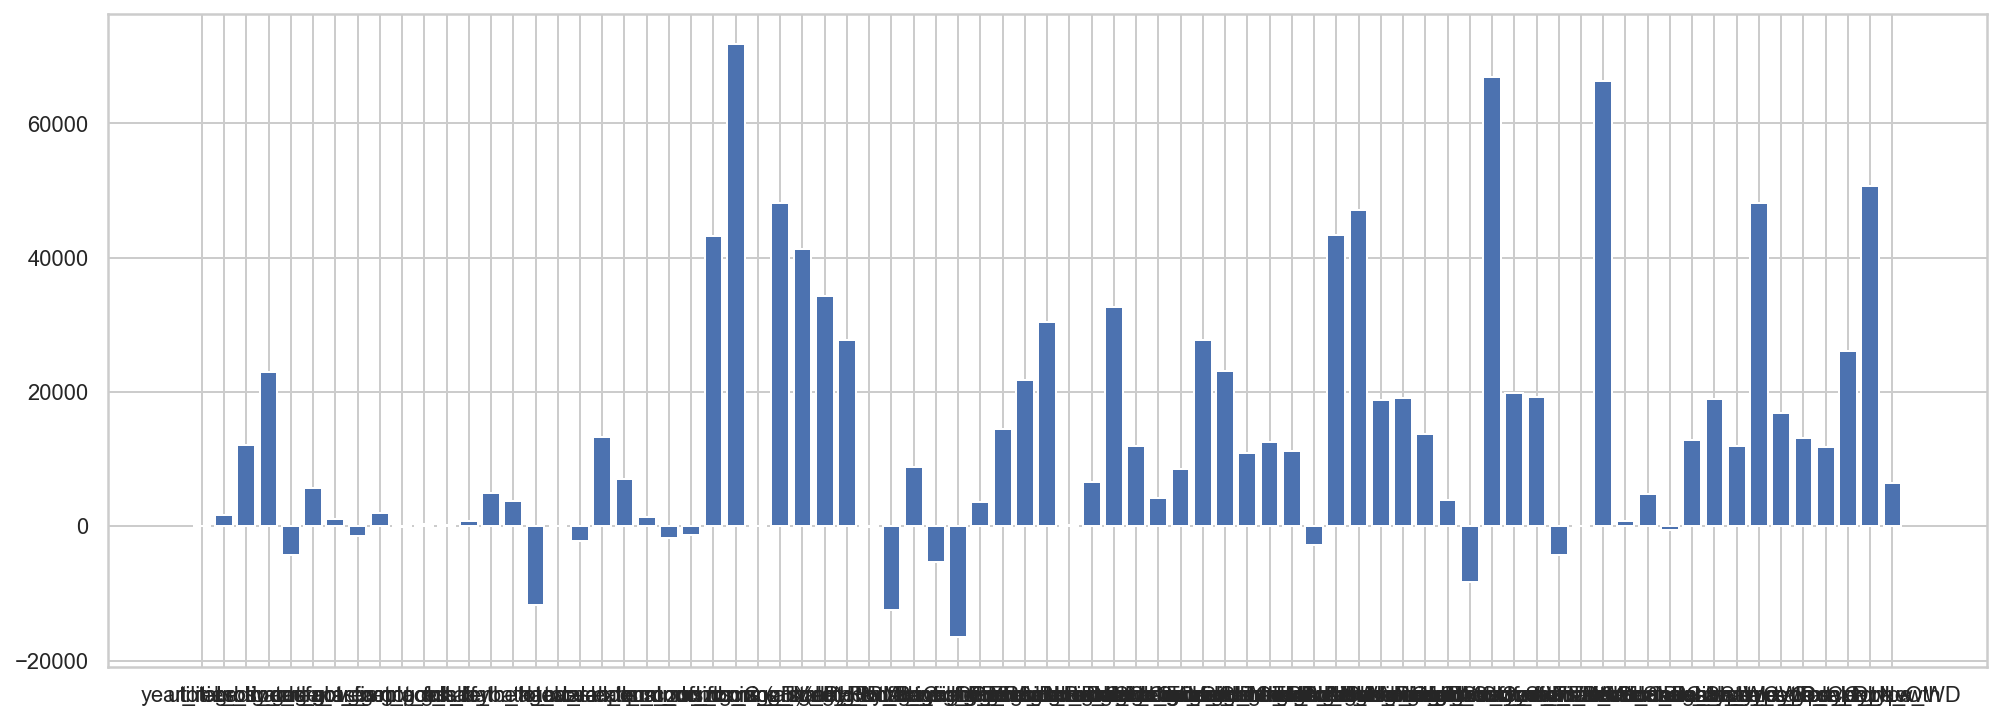

In [239]:
# Create df for storing coefficients and their corresponding variable names
coefficient_lr_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_lr_df['Column_Name'] = X_train_total.columns

# Store coefficients of predictors
coefficient_lr_df['Coefficient_Value'] = pd.Series(lr.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_lr_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_lr_df["Column_Name"], coefficient_lr_df['Coefficient_Value'])

In [240]:
lr_coefs = pd.DataFrame({'variable':X_train_total.columns,
                         'coef':lr.coef_,
                         'abs_coef':np.abs(lr.coef_)})
lr_coefs.sort_values("abs_coef", ascending = True)[:10]

variable          coef      abs_coef
62     roof_matl_WdShake -1.455192e-11  1.455192e-11
25     ms_zoning_I (all) -6.675691e-10  6.675691e-10
0              utilities  2.746888e-08  2.746888e-08
16              lot_area  2.485991e+00  2.485991e+00
30         alley_NoAlley -4.783861e+01  4.783861e+01
9               got_pool -1.567745e+02  1.567745e+02
39  neighborhood_ClearCr  1.754541e+02  1.754541e+02
11             got_alley  1.872404e+02  1.872404e+02
10              got_misc  2.767569e+02  2.767569e+02
66       foundation_Slab -5.237940e+02  5.237940e+02

### Lasso

In [241]:
lasso.fit(X_train_total, y_train)

LassoCV(n_alphas=200)

In [242]:
# Predict based on test data
lasso_pred = lasso.predict(X_test_total)

# Calculate model performance
R_squared = r2_score(y_test, lasso_pred)
print('Test R-squared score :', R_squared)
print('Train R-squared score :', r2_score(y_train, lasso.predict(X_train_total)))

Test R-squared score : 0.1778357560685231
Train R-squared score : 0.16107002743377474


        Column_Name  Coefficient_Value
0         utilities                0.0
1    year_remod_add                0.0
2     total_bsmt_sf                0.0
3       gr_liv_area                0.0
4     bedroom_abvgr                0.0
..              ...                ...
72  sale_type_ConLI                0.0
73  sale_type_ConLw               -0.0
74    sale_type_New                0.0
75    sale_type_Oth               -0.0
76    sale_type_WD                -0.0

[77 rows x 2 columns]


<BarContainer object of 77 artists>

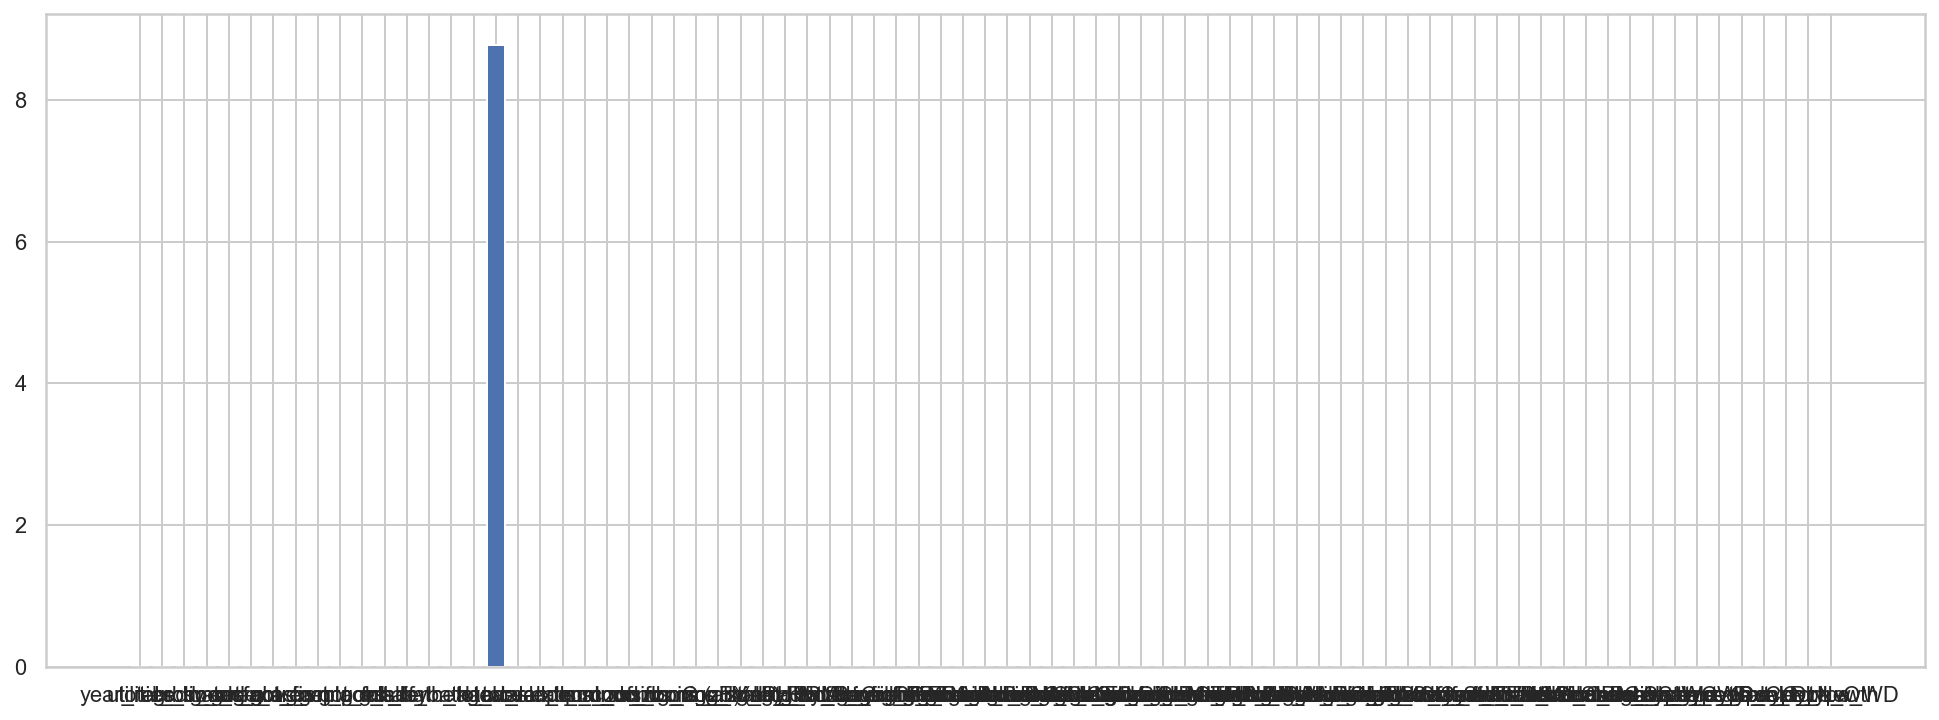

In [243]:
# Create df for storing coefficients and their corresponding variable names
coefficient_lasso_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_lasso_df['Column_Name'] = X_train_total.columns

# Store coefficients of predictors
coefficient_lasso_df['Coefficient_Value'] = pd.Series(lasso.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_lasso_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_lasso_df["Column_Name"], coefficient_lasso_df['Coefficient_Value'])

In [244]:
lasso_coefs = pd.DataFrame({'variable':X_train_total.columns,
                         'coef':lasso.coef_,
                         'abs_coef':np.abs(lasso.coef_)})
lasso_coefs.sort_values("abs_coef", ascending = False)[:10]

variable      coef  abs_coef
16              lot_area  8.773715  8.773715
0              utilities  0.000000  0.000000
58  neighborhood_StoneBr  0.000000  0.000000
56  neighborhood_SawyerW  0.000000  0.000000
55   neighborhood_Sawyer -0.000000  0.000000
54    neighborhood_SWISU -0.000000  0.000000
53  neighborhood_OldTown -0.000000  0.000000
52  neighborhood_NridgHt  0.000000  0.000000
51  neighborhood_NoRidge  0.000000  0.000000
50   neighborhood_NWAmes -0.000000  0.000000

### Ridge

In [245]:
# Train the model
ridge.fit(X_train_total, y_train)

# Predict based on test data
ridge_pred = ridge.predict(X_test_total)

# Calculate model performance
R_squared = r2_score(ridge_pred, y_test)
print('Test R-squared score :', R_squared)
print('Train R-squared score :', r2_score(y_train, ridge.predict(X_train_total)))

Test R-squared score : 0.8755952339822708
Train R-squared score : 0.8878589115463532


        Column_Name  Coefficient_Value
0         utilities           0.000000
1    year_remod_add        1524.469885
2     total_bsmt_sf       11673.506905
3       gr_liv_area       23444.061610
4     bedroom_abvgr       -4631.900578
..              ...                ...
72  sale_type_ConLI        1994.554431
73  sale_type_ConLw        2812.960823
74    sale_type_New       17446.430213
75    sale_type_Oth       13230.783819
76    sale_type_WD        -1034.684098

[77 rows x 2 columns]


<BarContainer object of 77 artists>

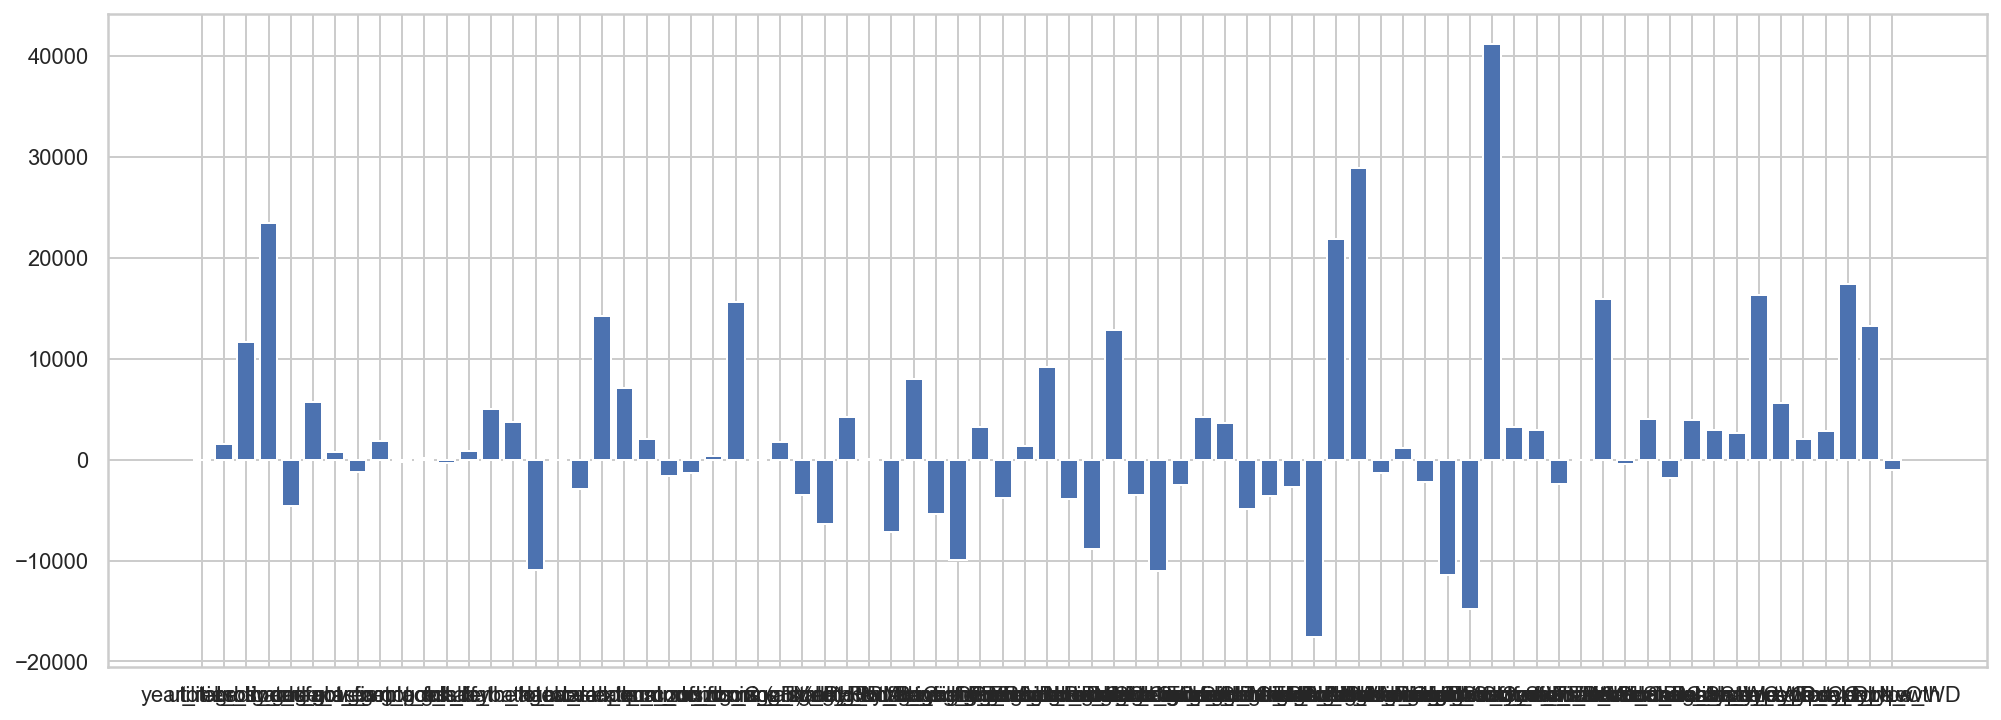

In [246]:
# Create df for storing coefficients and their corresponding variable names
coefficient_ridge_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_ridge_df['Column_Name'] = X_train_total.columns

# Store coefficients of predictors
coefficient_ridge_df['Coefficient_Value'] = pd.Series(ridge.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_ridge_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_ridge_df["Column_Name"], coefficient_ridge_df['Coefficient_Value'])

In [247]:
ridge_coefs = pd.DataFrame({'variable':X_train_total.columns,
                         'coef':ridge.coef_,
                         'abs_coef':np.abs(ridge.coef_)})
ridge_coefs.sort_values("abs_coef", ascending = True)[:10]

variable        coef    abs_coef
0           utilities    0.000000    0.000000
62  roof_matl_WdShake    0.000000    0.000000
25  ms_zoning_I (all)    0.000000    0.000000
16           lot_area    2.733570    2.733570
30      alley_NoAlley   90.938809   90.938809
10           got_misc  148.311886  148.311886
9            got_pool -195.163063  195.163063
11          got_alley -355.934647  355.934647
23  ms_zoning_C (all)  365.030992  365.030992
64  foundation_CBlock -407.805982  407.805982

#### Using Regularization Models for Feature Selection
As seen above, since the Ridge Regression shrinks the coefficients of the weaker variables to 0, we can drop these variables and re-run the model to improve model performance.

Hence, the variables we will drop are: 'roof_matl_WdShake', 'ms_zoning_I (all)', and 'utilities'. 

In [248]:
# Drop the newspaper column since their lasso regeession coefficients is close to zero
X_v2 = X.drop(columns=['roof_matl_WdShake', 'ms_zoning_I (all)', 'utilities'], axis=1)
X_v2.head()

lot_area  land_slope  overall_qual  overall_cond  year_remod_add  \
1     11492           2             6             4            1997   
2      7922           2             4             6            2007   
3      9802           2             4             4            2007   
4     14235           2             5             7            1993   
5     16492           2             5             5            2002   

   exter_cond  bsmt_cond  total_bsmt_sf  gr_liv_area  bedroom_abvgr  ...  \
1           2          3          913.0         2122              4  ...   
2           3          3         1057.0         1057              3  ...   
3           2          3          384.0         1444              3  ...   
4           2          4          676.0         1445              3  ...   
5           2          3         1517.0         1888              2  ...   

   foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
1                 0                0              0              0   
2                 0                0              0              0   
3                 0                0              0              0   
4                 0                0              0              0   
5                 0                0              0              0   

   sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
1                0                0                0              0   
2                0                0                0              0   
3                0                0                0              0   
4                0                0                0              0   
5                0                0                0              0   

   sale_type_Oth  sale_type_WD   
1              0              1  
2              0              1  
3              0              1  
4              0              1  
5              0              1  

[5 rows x 77 columns]

In [249]:
X_train_2, X_test_2, y_train, y_test = train_test_split(X_v2, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1168, 80)
(390, 80)


In [250]:
X_train_numeric_2 = X_train_2[['year_remod_add', 'total_bsmt_sf',
                               'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                               'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                               'got_pool', 'got_misc', 'got_alley', 'got_fence',
                               'full_bath_total', 'half_bath_total', 'age']]

In [251]:
X_test_numeric_2 = X_test_2[['year_remod_add', 'total_bsmt_sf',
                               'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                               'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                               'got_pool', 'got_misc', 'got_alley', 'got_fence',
                               'full_bath_total', 'half_bath_total', 'age']]

In [252]:
X_train_categorical_2 = X_train_2[['lot_area', 'land_slope', 'overall_qual',
                               'overall_cond', 'exter_cond', 'bsmt_cond',
                               'num_of_floors','ms_zoning_C (all)', 'ms_zoning_FV',
                               'ms_zoning_RH', 'ms_zoning_RL',
                               'ms_zoning_RM', 'street_Pave', 'alley_NoAlley',
                               'alley_Pave', 'lot_config_CulDSac', 'lot_config_FR2',
                               'lot_config_FR3', 'lot_config_Inside', 'neighborhood_Blueste',
                               'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
                               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
                               'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR',
                               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
                               'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
                               'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
                               'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
                               'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
                               'roof_matl_Tar&Grv', 'roof_matl_WdShngl',
                               'foundation_CBlock', 'foundation_PConc', 'foundation_Slab',
                               'foundation_Stone', 'foundation_Wood', 'sale_type_CWD', 'sale_type_Con',
                               'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
                               'sale_type_New', 'sale_type_Oth', 'sale_type_WD ']]

In [253]:
X_test_categorical_2 = X_test_2[['lot_area', 'land_slope', 'overall_qual',
                               'overall_cond', 'exter_cond', 'bsmt_cond',
                               'num_of_floors','ms_zoning_C (all)', 'ms_zoning_FV',
                               'ms_zoning_RH', 'ms_zoning_RL',
                               'ms_zoning_RM', 'street_Pave', 'alley_NoAlley',
                               'alley_Pave', 'lot_config_CulDSac', 'lot_config_FR2',
                               'lot_config_FR3', 'lot_config_Inside', 'neighborhood_Blueste',
                               'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
                               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
                               'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR',
                               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
                               'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
                               'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
                               'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
                               'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
                               'roof_matl_Tar&Grv', 'roof_matl_WdShngl',
                               'foundation_CBlock', 'foundation_PConc', 'foundation_Slab',
                               'foundation_Stone', 'foundation_Wood', 'sale_type_CWD', 'sale_type_Con',
                               'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
                               'sale_type_New', 'sale_type_Oth', 'sale_type_WD ']]

In [254]:
# Compute the mean and std for X numeric data 2 to be used for scaling
ss.fit(X_train_numeric_2)

print(ss.fit(X_train_numeric_2))

StandardScaler()


In [255]:
ss.transform(X_train_numeric_2)

array([[-1.33075702, -0.32000433, -1.2377827 , ..., -1.37421491,
        -0.80358647,  0.5271683 ],
       [ 1.07305576,  2.42701032,  1.14944385, ...,  1.40034518,
        -0.80358647, -1.11820761],
       [-1.14222268,  1.00067579, -0.09007763, ...,  1.40034518,
        -0.80358647,  0.42844574],
       ...,
       [ 0.69598709,  0.45731026,  2.79995305, ...,  1.40034518,
         1.02959517,  2.63324946],
       [ 0.97878859, -0.94386846, -0.7000009 , ..., -1.37421491,
        -0.80358647,  2.36998932],
       [ 1.02592218, -0.65206104, -0.74372299, ...,  0.01306514,
        -0.80358647,  1.74474647]])

In [256]:
X_train_numeric_2_df = pd.DataFrame(ss.transform(X_train_numeric_2), columns=['year_remod_add', 'total_bsmt_sf',
                                                                              'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                                                                              'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                                                                              'got_pool', 'got_misc', 'got_alley', 'got_fence',
                                                                              'full_bath_total', 'half_bath_total', 'age'])

In [257]:
X_train_numeric_2_df

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0          -1.330757      -0.320004    -1.237783       0.207192    -1.117379   
1           1.073056       2.427010     1.149444       0.207192     2.271127   
2          -1.142223       1.000676    -0.090078       0.207192     0.231336   
3           0.507453       2.459713     3.812120       1.487618     0.989291   
4           0.507453      -1.321206    -0.837726       0.207192    -1.117379   
...              ...            ...          ...            ...          ...   
1163       -1.660692      -0.128820     0.371191       0.207192    -0.381717   
1164       -1.425024      -0.481002    -1.377693       0.207192     0.220189   
1165        0.695987       0.457310     2.799953       0.207192     2.181956   
1166        0.978789      -0.943868    -0.700001      -1.073233     0.487703   
1167        1.025922      -0.652061    -0.743723       0.207192    -1.384893   

      got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  got_alley  \
0       -0.819121  0.135309       -1.047353 -0.065568 -0.178331  -0.274784   
1        1.220821  0.135309        0.954788 -0.065568 -0.178331  -0.274784   
2        1.220821  0.135309        0.954788 -0.065568 -0.178331  -0.274784   
3        1.220821  0.135309        0.954788 -0.065568 -0.178331  -0.274784   
4       -0.819121  0.135309       -1.047353 -0.065568 -0.178331  -0.274784   
...           ...       ...             ...       ...       ...        ...   
1163    -0.819121  0.135309        0.954788 -0.065568 -0.178331  -0.274784   
1164    -0.819121  0.135309       -1.047353 -0.065568 -0.178331  -0.274784   
1165    -0.819121  0.135309        0.954788 -0.065568 -0.178331  -0.274784   
1166    -0.819121  0.135309        0.954788 -0.065568 -0.178331  -0.274784   
1167    -0.819121  0.135309       -1.047353 -0.065568 -0.178331  -0.274784   

      got_fence  full_bath_total  half_bath_total       age  
0     -0.489811        -1.374215        -0.803586  0.527168  
1     -0.489811         1.400345        -0.803586 -1.118208  
2      2.041603         1.400345        -0.803586  0.428446  
3     -0.489811         1.400345         1.029595 -0.657502  
4     -0.489811        -1.374215        -0.803586  1.711839  
...         ...              ...              ...       ...  
1163  -0.489811         0.013065        -0.803586  0.790428  
1164  -0.489811         0.013065        -0.803586  0.560076  
1165  -0.489811         1.400345         1.029595  2.633249  
1166   2.041603        -1.374215        -0.803586  2.369989  
1167   2.041603         0.013065        -0.803586  1.744746  

[1168 rows x 15 columns]

In [258]:
X_train_total_2 = pd.concat([X_train_numeric_2_df.reset_index(drop=True), X_train_categorical_2.reset_index(drop=True)], axis=1)

In [259]:
X_train_total_2

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0          -1.330757      -0.320004    -1.237783       0.207192    -1.117379   
1           1.073056       2.427010     1.149444       0.207192     2.271127   
2          -1.142223       1.000676    -0.090078       0.207192     0.231336   
3           0.507453       2.459713     3.812120       1.487618     0.989291   
4           0.507453      -1.321206    -0.837726       0.207192    -1.117379   
...              ...            ...          ...            ...          ...   
1163       -1.660692      -0.128820     0.371191       0.207192    -0.381717   
1164       -1.425024      -0.481002    -1.377693       0.207192     0.220189   
1165        0.695987       0.457310     2.799953       0.207192     2.181956   
1166        0.978789      -0.943868    -0.700001      -1.073233     0.487703   
1167        1.025922      -0.652061    -0.743723       0.207192    -1.384893   

      got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  ...  \
0       -0.819121  0.135309       -1.047353 -0.065568 -0.178331  ...   
1        1.220821  0.135309        0.954788 -0.065568 -0.178331  ...   
2        1.220821  0.135309        0.954788 -0.065568 -0.178331  ...   
3        1.220821  0.135309        0.954788 -0.065568 -0.178331  ...   
4       -0.819121  0.135309       -1.047353 -0.065568 -0.178331  ...   
...           ...       ...             ...       ...       ...  ...   
1163    -0.819121  0.135309        0.954788 -0.065568 -0.178331  ...   
1164    -0.819121  0.135309       -1.047353 -0.065568 -0.178331  ...   
1165    -0.819121  0.135309        0.954788 -0.065568 -0.178331  ...   
1166    -0.819121  0.135309        0.954788 -0.065568 -0.178331  ...   
1167    -0.819121  0.135309       -1.047353 -0.065568 -0.178331  ...   

      foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
0                    0                0              0              0   
1                    0                0              0              0   
2                    0                0              0              0   
3                    0                0              0              0   
4                    0                0              0              0   
...                ...              ...            ...            ...   
1163                 0                0              0              0   
1164                 0                0              0              0   
1165                 0                0              0              0   
1166                 0                0              0              0   
1167                 0                0              0              0   

      sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   
...               ...              ...              ...            ...   
1163                0                0                0              0   
1164                0                0                0              0   
1165                0                0                0              0   
1166                0                0                0              0   
1167                0                0                0              0   

      sale_type_Oth  sale_type_WD   
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              1  
...             ...            ...  
1163              0              1  
1164              0              0  
1165              0              1  
1166              0              1  
1167   

In [260]:
# Compute the mean and std for X numeric data 2 to be used for scaling
ss.fit(X_test_numeric_2)

print(ss.fit(X_test_numeric_2))

StandardScaler()


In [261]:
ss.transform(X_test_numeric_2)

array([[ 0.9012975 , -0.92556185, -0.52709267, ..., -1.25898003,
         1.11920773,  0.69465249],
       [-0.92750919, -0.7016356 ,  1.78322338, ...,  1.45373937,
        -0.72252651,  0.21110691],
       [-1.53711142, -0.5604647 , -0.59571592, ..., -1.25898003,
        -0.72252651,  0.85583435],
       ...,
       [-0.6930468 , -0.32436854,  1.46714053, ...,  0.09737967,
         1.11920773,  0.11439779],
       [ 0.61994262,  0.56160056, -0.30874597, ...,  0.09737967,
         1.11920773, -0.820457  ],
       [ 0.94818998, -0.3292365 , -1.12806597, ...,  0.09737967,
        -0.72252651,  0.11439779]])

In [262]:
X_test_numeric_2_df = pd.DataFrame(ss.transform(X_test_numeric_2), columns=['year_remod_add', 'total_bsmt_sf',
                                                                              'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                                                                              'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                                                                              'got_pool', 'got_misc', 'got_alley', 'got_fence',
                                                                              'full_bath_total', 'half_bath_total', 'age'])

In [263]:
X_test_numeric_2_df

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0          0.901297      -0.925562    -0.527093      -0.973735    -0.976700   
1         -0.927509      -0.701636     1.783223       2.836532     0.879704   
2         -1.537111      -0.560465    -0.595716       0.296354    -1.469973   
3          1.135760       1.632552     0.585436       0.296354     1.558618   
4          1.088867      -0.691900     0.111311       0.296354    -0.531163   
..              ...            ...          ...            ...          ...   
385        0.432373      -0.227009    -0.915958      -0.973735     0.381127   
386       -1.537111      -0.716239    -0.836937      -0.973735    -1.337372   
387       -0.693047      -0.324369     1.467141       1.566443     0.089407   
388        0.619943       0.561601    -0.308746      -2.243824     0.041670   
389        0.948190      -0.329237    -1.128066       0.296354    -0.223530   

     got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  got_alley  \
0      -0.790569  0.178174       -0.925820 -0.050702 -0.178174  -0.304034   
1       1.264911  0.178174        1.080123 -0.050702 -0.178174  -0.304034   
2      -0.790569  0.178174        1.080123 -0.050702 -0.178174  -0.304034   
3       1.264911  0.178174        1.080123 -0.050702 -0.178174  -0.304034   
4      -0.790569  0.178174        1.080123 -0.050702 -0.178174  -0.304034   
..           ...       ...             ...       ...       ...        ...   
385    -0.790569  0.178174       -0.925820 -0.050702 -0.178174  -0.304034   
386    -0.790569  0.178174       -0.925820 -0.050702 -0.178174  -0.304034   
387     1.264911  0.178174        1.080123 -0.050702 -0.178174  -0.304034   
388    -0.790569  0.178174        1.080123 -0.050702 -0.178174  -0.304034   
389    -0.790569  0.178174       -0.925820 -0.050702 -0.178174  -0.304034   

     got_fence  full_bath_total  half_bath_total       age  
0     -0.49599        -1.258980         1.119208  0.694652  
1     -0.49599         1.453739        -0.722527  0.211107  
2     -0.49599        -1.258980        -0.722527  0.855834  
3     -0.49599         1.453739        -0.722527 -1.110584  
4     -0.49599         0.097380         1.119208 -1.078348  
..         ...              ...              ...       ...  
385   -0.49599         0.097380        -0.722527 -0.627039  
386   -0.49599        -1.258980        -0.722527  0.952543  
387   -0.49599         0.097380         1.119208  0.114398  
388   -0.49599         0.097380         1.119208 -0.820457  
389   -0.49599         0.097380        -0.722527  0.114398  

[390 rows x 15 columns]

In [264]:
X_test_total_2 = pd.concat([X_test_numeric_2_df.reset_index(drop=True), X_test_categorical_2.reset_index(drop=True)], axis=1)

In [265]:
X_test_total_2

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0          0.901297      -0.925562    -0.527093      -0.973735    -0.976700   
1         -0.927509      -0.701636     1.783223       2.836532     0.879704   
2         -1.537111      -0.560465    -0.595716       0.296354    -1.469973   
3          1.135760       1.632552     0.585436       0.296354     1.558618   
4          1.088867      -0.691900     0.111311       0.296354    -0.531163   
..              ...            ...          ...            ...          ...   
385        0.432373      -0.227009    -0.915958      -0.973735     0.381127   
386       -1.537111      -0.716239    -0.836937      -0.973735    -1.337372   
387       -0.693047      -0.324369     1.467141       1.566443     0.089407   
388        0.619943       0.561601    -0.308746      -2.243824     0.041670   
389        0.948190      -0.329237    -1.128066       0.296354    -0.223530   

     got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  ...  \
0      -0.790569  0.178174       -0.925820 -0.050702 -0.178174  ...   
1       1.264911  0.178174        1.080123 -0.050702 -0.178174  ...   
2      -0.790569  0.178174        1.080123 -0.050702 -0.178174  ...   
3       1.264911  0.178174        1.080123 -0.050702 -0.178174  ...   
4      -0.790569  0.178174        1.080123 -0.050702 -0.178174  ...   
..           ...       ...             ...       ...       ...  ...   
385    -0.790569  0.178174       -0.925820 -0.050702 -0.178174  ...   
386    -0.790569  0.178174       -0.925820 -0.050702 -0.178174  ...   
387     1.264911  0.178174        1.080123 -0.050702 -0.178174  ...   
388    -0.790569  0.178174        1.080123 -0.050702 -0.178174  ...   
389    -0.790569  0.178174       -0.925820 -0.050702 -0.178174  ...   

     foundation_Stone  foundation_Wood  sale_type_CWD  sale_type_Con  \
0                   0                0              0              0   
1                   0                0              0              0   
2                   0                0              0              0   
3                   0                0              0              0   
4                   0                0              0              0   
..                ...              ...            ...            ...   
385                 0                0              0              0   
386                 0                0              0              0   
387                 0                0              0              0   
388                 0                0              0              0   
389                 0                0              0              0   

     sale_type_ConLD  sale_type_ConLI  sale_type_ConLw  sale_type_New  \
0                  0                0                0              0   
1                  0                0                0              0   
2                  0                0                0              0   
3                  0                0                0              0   
4                  0                0                0              0   
..               ...              ...              ...            ...   
385                0                0                0              0   
386                0                0                0              0   
387                0                0                0              0   
388                0                0                0              0   
389                0                0                0              0   

     sale_type_Oth  sale_type_WD   
0                0              1  
1                0              1  
2                0              1  
3                0              1  
4                0              1  
..             ...            ...  
385              0              1  
386              0              1  
387              0              1  
388              0              1  
389              0              1  

[390 rows x 74 columns]

In [266]:
# Apply simple ridge regression
ridge.fit(X_train_total_2, y_train)

# Predict based on test data
ridge_pred_2 = ridge.predict(X_test_total_2)

# Calculate model performance
R_squared = r2_score(ridge_pred_2, y_test)
print('Test R-squared score :', R_squared)
print('Train R-squared score :', r2_score(y_train, ridge.predict(X_train_total_2)))

Test R-squared score : 0.8755956604557271
Train R-squared score : 0.887858911550852


Text(0, 0.5, 'Predicted Values')

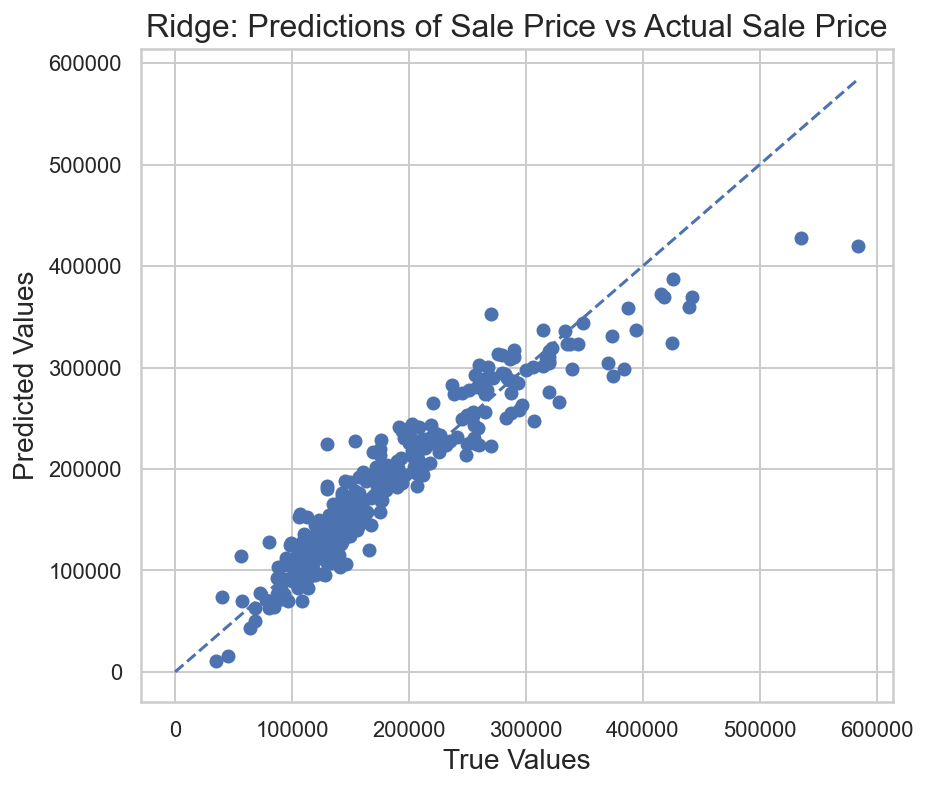

In [267]:
# Plot ridge's predicted values against true values
ridge_pred_2 = ridge.predict(X_test_total_2)
plt.figure(figsize = (6,6))
plt.scatter(y_test, ridge.predict(X_test_total_2))
plt.plot([0, max(max(y_test), max(ridge_pred_2))],
        [0, max(max(y_test), max(ridge_pred_2))],
        linestyle = '--')

#set title and labels
plt.title('Ridge: Predictions of Sale Price vs Actual Sale Price', fontsize = 16)
plt.xlabel('True Values', fontsize = 14)
plt.ylabel('Predicted Values', fontsize = 14)

**Interpretation**:
The model is able to predict the sale price accurately when the price of the house is $300,000 and below, but when the actual sale prices are higher than that, the model begins to consistently underpredict the sale price and hence we know that this model is biased. This could be because of variables that are not highly correlated with the target variable (i.e. saleprice) that is used in the model.

        Column_Name  Coefficient_Value
0    year_remod_add        1524.469885
1     total_bsmt_sf       11673.506905
2       gr_liv_area       23444.061610
3     bedroom_abvgr       -4631.900578
4       garage_area        5731.894444
..              ...                ...
69  sale_type_ConLI        1994.554431
70  sale_type_ConLw        2812.960823
71    sale_type_New       17446.430213
72    sale_type_Oth       13230.783819
73    sale_type_WD        -1034.684098

[74 rows x 2 columns]


<BarContainer object of 74 artists>

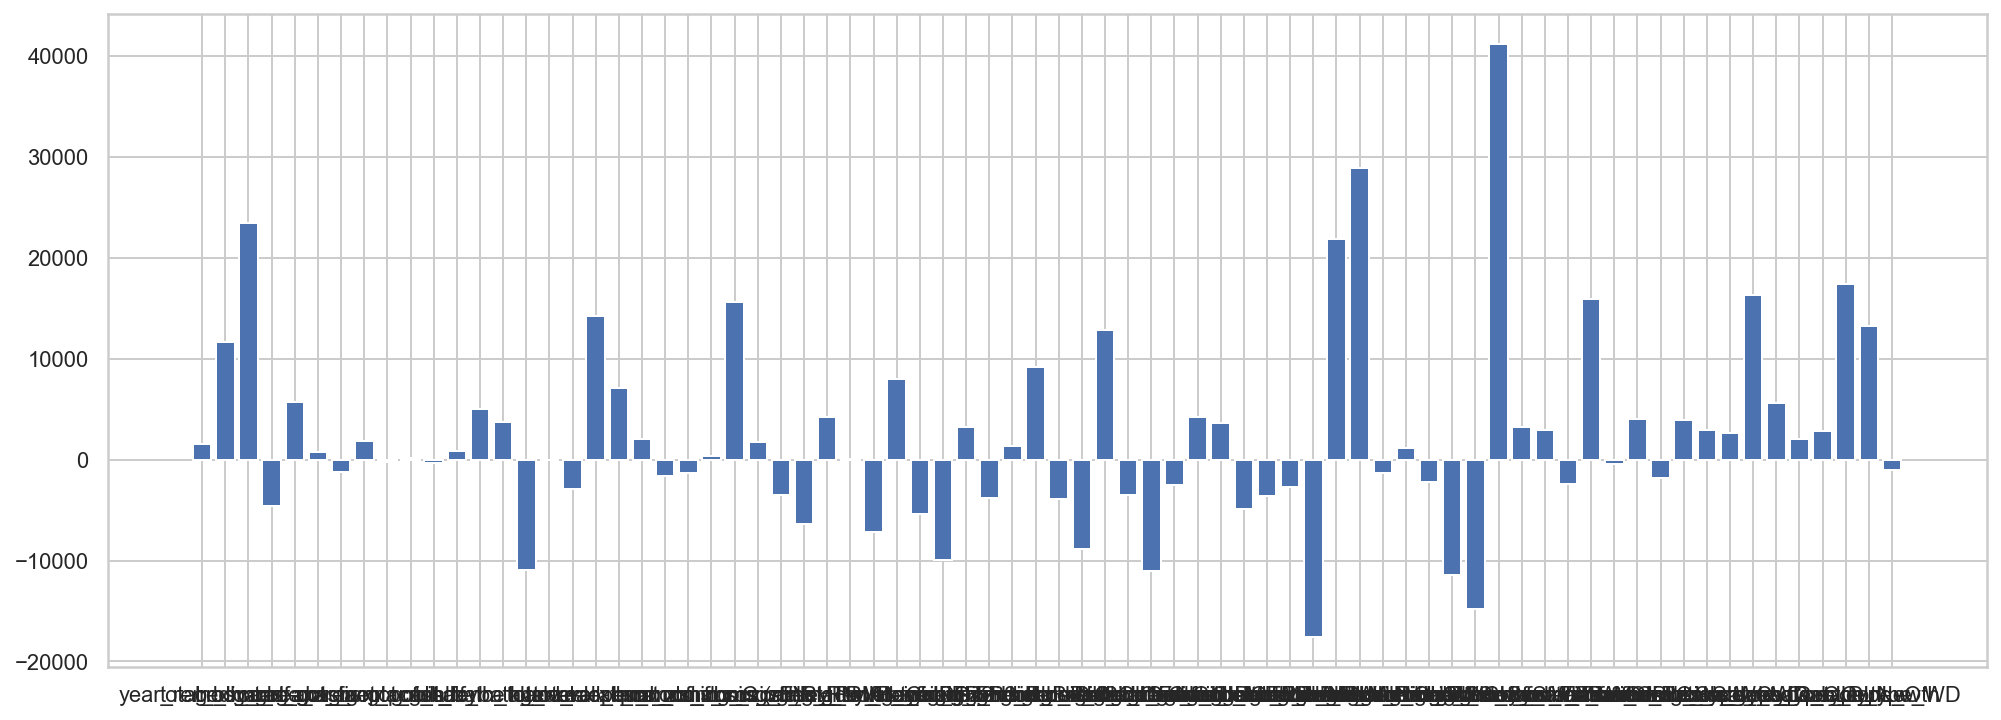

In [268]:
# Create df for storing coefficients and their corresponding variable names
coefficient_ridge_df_2 = pd.DataFrame()

# Storing all the column names of predictors
coefficient_ridge_df_2['Column_Name'] = X_train_total_2.columns

# Store coefficients of predictors
coefficient_ridge_df_2['Coefficient_Value'] = pd.Series(ridge.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_ridge_df_2)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_ridge_df_2["Column_Name"], coefficient_ridge_df_2['Coefficient_Value'])

In [269]:
ridge_coefs_2 = pd.DataFrame({'variable':X_train_total_2.columns,
                         'coef':ridge.coef_,
                         'abs_coef':np.abs(ridge.coef_)})
ridge_coefs_2.sort_values("abs_coef", ascending = False)[:30]

variable          coef      abs_coef
56  neighborhood_StoneBr  41202.968000  41202.968000
50  neighborhood_NridgHt  28879.936512  28879.936512
2            gr_liv_area  23444.061610  23444.061610
49  neighborhood_NoRidge  21826.490053  21826.490053
48   neighborhood_NWAmes -17566.248294  17566.248294
71         sale_type_New  17446.430213  17446.430213
67         sale_type_Con  16296.977749  16296.977749
60     roof_matl_WdShngl  15949.450529  15949.450529
23          ms_zoning_FV  15607.899785  15607.899785
55  neighborhood_Somerst -14826.408357  14826.408357
17          overall_qual  14249.034918  14249.034918
72         sale_type_Oth  13230.783819  13230.783819
39  neighborhood_Crawfor  12806.135787  12806.135787
1          total_bsmt_sf  11673.506905  11673.506905
54  neighborhood_SawyerW -11450.425061  11450.425061
41  neighborhood_Gilbert -10993.172045  10993.172045
14                   age -10943.838270  10943.838270
32        lot_config_FR3  -9962.424365   9962.424365
36  neighborhood_BrkSide   9160.930656   9160.930656
38  neighborhood_CollgCr  -8818.504343   8818.504343
30    lot_config_CulDSac   7981.506288   7981.506288
29            alley_Pave  -7216.682854   7216.682854
18          overall_cond   7139.848963   7139.848963
26          ms_zoning_RM  -6399.356742   6399.356742
4            garage_area   5731.894444   5731.894444
68       sale_type_ConLD   5567.947315   5567.947315
31        lot_config_FR2  -5363.743381   5363.743381
12       full_bath_total   5007.345907   5007.345907
45  neighborhood_Mitchel  -4873.387223   4873.387223
3          bedroom_abvgr  -4631.900578   4631.900578

In [270]:
ridge_coefs_2 = pd.DataFrame({'variable':X_train_total_2.columns,
                         'coef':ridge.coef_,
                         'abs_coef':np.abs(ridge.coef_)})
ridge_coefs_2.sort_values("abs_coef", ascending = True)[:20]

variable         coef     abs_coef
15              lot_area     2.733619     2.733619
28         alley_NoAlley    90.938809    90.938809
9               got_misc   148.311886   148.311886
8               got_pool  -195.163063   195.163063
10             got_alley  -355.934647   355.934647
22     ms_zoning_C (all)   365.030992   365.030992
61     foundation_CBlock  -407.805982   407.805982
5            got_mas_vnr   742.905569   742.905569
11             got_fence   844.394782   844.394782
73         sale_type_WD  -1034.684098  1034.684098
52    neighborhood_SWISU  1153.083409  1153.083409
6               got_bsmt -1209.473147  1209.473147
21         num_of_floors -1302.190149  1302.190149
51  neighborhood_OldTown -1341.381693  1341.381693
35   neighborhood_BrDale  1387.787598  1387.787598
0         year_remod_add  1524.469885  1524.469885
20             bsmt_cond -1636.091700  1636.091700
24          ms_zoning_RH  1719.246730  1719.246730
63       foundation_Slab -1854.911481  1854.911481
7         got_fireplaces  1869.206296  1869.206296

In [271]:
#residuals
residuals_ridge = y_test - ridge_pred_2

Text(0.5, 1.0, 'Residuals')

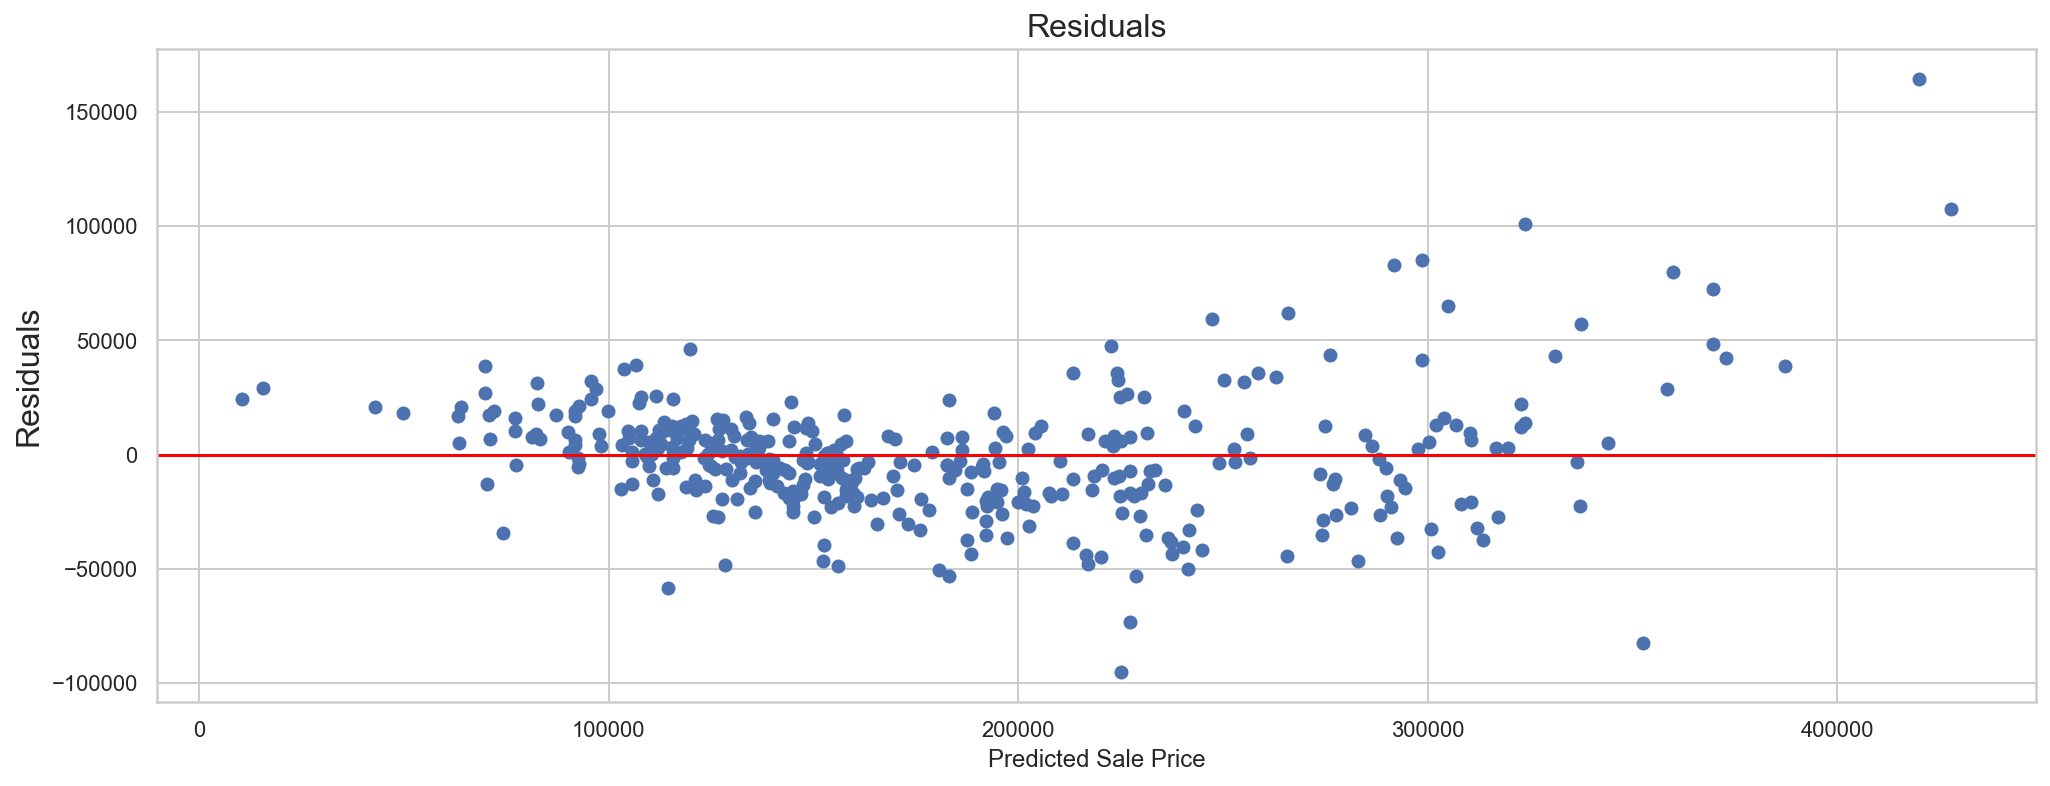

In [272]:
#plot residuals
plt.scatter(ridge_pred_2, residuals_ridge)
plt.axhline(y=0, c = 'red')
plt.xlabel('Predicted Sale Price', fontsize =12)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Residuals', fontsize = 16)

**Interpretation:**
The ridge model generally has positive residuals up to the 100,000 residuals. However, the presence of non-constant variance in the error terms (i.e. the residuals) results in heteroskedasticity. The variance of error terms (residuals) is not constant. Thereforem it is not an accurate model to be used.

# Prediction Submission

In [273]:
#reading in my test data

test = pd.read_csv('../project_2/datasets/test.csv')

In [274]:
test.shape

(878, 80)

In [275]:
test.columns = [clean_columns(col) for col in test.columns]
test.head(1)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   

  alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area pool_qc  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   

  fence misc_feature misc_val mo_sold  yr_sold  sale_type  
0   NaN          NaN        0       4     2006        WD   

[1 rows x 80 columns]

In [276]:
# Checking for null values and displaying only the columns with nulls and their sum

test[test.columns[test.isnull().any()]].isnull().sum()

lot_frontage      160
alley             820
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           874
fence             706
misc_feature      837
dtype: int64

In [277]:
#create a new column to show if the property has a masonry veneer or not

test['got_mas_vnr'] = test['mas_vnr_area'].map(presence_of_variable_1)

In [278]:
#create a new column to show if the property has a basement or not

test['got_bsmt'] = test['total_bsmt_sf'].map(presence_of_variable_1)

In [279]:
#create a new column to show if the property has a fireplace or not

test['got_fireplaces'] = test['fireplaces'].map(presence_of_variable_1)

In [280]:
#create a new column to show if the property has a pool or not

test['got_pool'] = test['pool_area'].map(presence_of_variable_1)

In [281]:
#create a new column to show if the property has miscellaneous features or not

test['got_misc'] = test['misc_val'].map(presence_of_variable_1)

In [282]:
test['alley'].isnull().sum()

820

In [283]:
test['alley']= test['alley'].fillna('NoAlley')

In [284]:
test['alley'].isnull().sum()

0

In [285]:
test['alley'].unique()

array(['Grvl', 'NoAlley', 'Pave'], dtype=object)

In [286]:
#create a new column to show if the property has an alley or not
test['got_alley'] = test['alley'].map(lambda x: 0 if x == 'NoAlley' else 1)

#1 to represent the property has the variable
#0 to represent the property does not have the variable

In [287]:
test['fence'].isnull().sum()

706

In [288]:
test['fence']= test['fence'].fillna('NoFence')

In [289]:
test['fence'].isnull().sum()

0

In [290]:
test['fence'].unique()

array(['NoFence', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [291]:
#create a new column to show if the property has a fence or not
test['got_fence'] = test['fence'].map(lambda x: 0 if x == 'NoFence' else 1)

In [292]:
test['got_fence'].value_counts()

0    706
1    172
Name: got_fence, dtype: int64

In [293]:
# Filling in the true meaning of the null values for the relevant basement columns

[test[col].fillna('NoBasement', inplace = True) for col in ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']]

[None, None, None, None, None]

In [294]:
test['bsmt_qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'NoBasement', 'Po'], dtype=object)

In [295]:
test['bsmt_cond'].unique()

array(['TA', 'Gd', 'NoBasement', 'Fa'], dtype=object)

In [296]:
test['bsmt_exposure'].unique()

array(['No', 'Av', 'NoBasement', 'Mn', 'Gd'], dtype=object)

In [297]:
test['bsmtfin_type_1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', 'NoBasement', 'LwQ'],
      dtype=object)

In [298]:
test['bsmtfin_type_2'].unique()

array(['Unf', 'LwQ', 'NoBasement', 'ALQ', 'GLQ', 'Rec', 'BLQ'],
      dtype=object)

In [299]:
# Filling in the true meaning of the null values for the relevant garage columns

[test[col].fillna('NoGarage', inplace = True) for col in ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']]

[None, None, None, None]

In [300]:
test['garage_type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'NoGarage', '2Types', 'CarPort',
       'Basment'], dtype=object)

In [301]:
test['garage_finish'].unique()

array(['Unf', 'Fin', 'RFn', 'NoGarage'], dtype=object)

In [302]:
test['garage_qual'].unique()

array(['Po', 'TA', 'Fa', 'NoGarage', 'Gd'], dtype=object)

In [303]:
test['garage_cond'].unique()

array(['Po', 'TA', 'NoGarage', 'Fa', 'Gd', 'Ex'], dtype=object)

In [304]:
# Filling in the true meaning of the null values for the fireplace_qu column

test['fireplace_qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [305]:
test['fireplace_qu'].fillna('NoFireplace', inplace = True)

In [306]:
test['fireplace_qu'].unique()

array(['NoFireplace', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [307]:
#create a new column to show bsmt_full_bath as int

test['bsmt_full_bath_int'] = test['bsmt_full_bath'].map(float_to_int)

In [308]:
#create a new column to show bsmt_half_bath as int

test['bsmt_half_bath_int'] = test['bsmt_half_bath'].map(float_to_int)

In [309]:
#create a new column to show the total number of full bathrooms

test['full_bath_total'] = test['bsmt_full_bath'] + test['full_bath']

In [310]:
#create a new column to show the total number of half bathrooms

test['half_bath_total'] = test['bsmt_half_bath'] + test['half_bath']

In [311]:
#create a new column to show the age of the property

test['age'] = test['yr_sold'] - test['year_built']

In [312]:
# Checking for columns with nulls and their sum.

test[test.columns[test.isnull().any()]].isnull().sum()

lot_frontage     160
mas_vnr_type       1
mas_vnr_area       1
electrical         1
garage_yr_blt     45
pool_qc          874
misc_feature     837
dtype: int64

In [313]:
#percentage of null values for the columns

test.isnull().mean().round(4).mul(100).sort_values(ascending=False)

pool_qc          99.54
misc_feature     95.33
lot_frontage     18.22
garage_yr_blt     5.13
mas_vnr_area      0.11
                 ...  
foundation        0.00
exter_cond        0.00
exter_qual        0.00
exterior_2nd      0.00
age               0.00
Length: 92, dtype: float64

In [314]:
test.shape

(878, 92)

In [315]:
# Since the null values for the missing records are relatively small to the entire dataset, we shall drop the records with the null values.

test.dropna(subset=['lot_frontage', 'mas_vnr_area','electrical', 'garage_yr_blt'], inplace = True)

In [316]:
test[test.columns[test.isnull().any()]].isnull().sum()

#displaying only the columns with nulls and their sum

pool_qc         672
misc_feature    651
dtype: int64

In [317]:
test.shape

(676, 92)

In [318]:
test['house_style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Fin', '2.5Unf',
       '1.5Unf'], dtype=object)

In [319]:
test['num_of_floors'] = test['house_style'].map(number_of_floors)

In [320]:
test['num_of_floors'].dtype

dtype('O')

In [321]:
test['num_of_floors'].value_counts()

one         337
two         209
one_half     75
Others       53
two_half      2
Name: num_of_floors, dtype: int64

In [322]:
test

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
5     333  923228370          160        RM          21.0      1890   Pave   
6    1327  902427150           20        RM          52.0      8516   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL          80.0      8000   Pave   
874  1234  535126140           60        RL          90.0     14670   Pave   
875  1373  904100040           20        RL          55.0      8250   Pave   
876  1672  527425140           20        RL          60.0      9000   Pave   
877  1939  535327160           20        RL          70.0      8400   Pave   

       alley lot_shape land_contour  ... got_pool got_misc got_alley  \
0       Grvl       Reg          Lvl  ...        0        0         1   
2    NoAlley       IR1          Lvl  ...        0        0         0   
3    NoAlley       Reg          Lvl  ...        0        0         0   
5    NoAlley       Reg          Lvl  ...        0        0         0   
6    NoAlley       Reg          Lvl  ...        0        0         0   
..       ...       ...          ...  ...      ...      ...       ...   
873  NoAlley       Reg          Lvl  ...        0        0         0   
874  NoAlley       Reg          Lvl  ...        0        0         0   
875  NoAlley       Reg          Lvl  ...        0        0         0   
876  NoAlley       Reg          Lvl  ...        0        0         0   
877  NoAlley       Reg          Lvl  ...        0        0         0   

    got_fence bsmt_full_bath_int bsmt_half_bath_int full_bath_total  \
0           0                  0                  0               2   
2           0                  1                  0               3   
3           0                  0                  0               1   
5           0                  0                  0               1   
6           0                  0                  0               1   
..        ...                ...                ...             ...   
873         0                  1                  0               3   
874         1                  0                  0               2   
875         0                  0                  0               1   
876         1                  0                  0               1   
877         1                  1                  0               2   

    half_bath_total  age  num_of_floors  
0                 0   96            two  
2                 1    0            two  
3                 0   84            one  
5                 1   38            two  
6                 0   50            one  
..              ...  ...            ...  
873               1   33            two  
874               1   42            two  
875               0   40            one  
876               0   36            one  
877               0   52            one  

[676 rows x 93 columns]

In [323]:
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [324]:
test_kaggle = test[['id', 'ms_zoning', 'lot_area', 'street',
                   'alley', 'lot_config', 'land_slope',
                   'neighborhood', 'overall_qual', 'overall_cond',
                   'year_remod_add', 'roof_matl', 'exter_cond',
                   'foundation', 'bsmt_cond', 'total_bsmt_sf',
                   'gr_liv_area', 'bedroom_abvgr', 'kitchen_qual',
                   'garage_area', 'garage_cond', 'paved_drive',
                   'sale_type', 'got_mas_vnr', 'got_bsmt',
                   'got_fireplaces', 'got_pool', 'got_misc',
                   'got_alley', 'got_fence',
                   'full_bath_total', 'half_bath_total', 'age',
                   'num_of_floors']]

In [325]:
test_kaggle.head()

id ms_zoning  lot_area street    alley lot_config land_slope  \
0  2658        RM      9142   Pave     Grvl     Inside        Gtl   
2  2414        RL     17104   Pave  NoAlley     Inside        Gtl   
3  1989        RM      8520   Pave  NoAlley     Inside        Gtl   
5   333        RM      1890   Pave  NoAlley     Inside        Gtl   
6  1327        RM      8516   Pave  NoAlley     Inside        Gtl   

  neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
0      OldTown             6             8  ...         1              0   
2      Gilbert             7             5  ...         1              1   
3      OldTown             5             6  ...         1              0   
5      MeadowV             4             6  ...         1              0   
6      OldTown             4             6  ...         1              0   

  got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
0        0        0         1          0                2                0   
2        0        0         0          0                3                1   
3        0        0         0          0                1                0   
5        0        0         0          0                1                1   
6        0        0         0          0                1                0   

  age  num_of_floors  
0  96            two  
2   0            two  
3  84            one  
5  38            two  
6  50            one  

[5 rows x 34 columns]

In [326]:
#showing the summary statistics for a few continuous data variables

test_kaggle[['lot_area', 'total_bsmt_sf', 'garage_area']].describe()

lot_area  total_bsmt_sf  garage_area
count     676.000000     676.000000   676.000000
mean     9992.211538    1053.844675   498.647929
std      9100.960399     415.803320   193.959882
min      1477.000000       0.000000   160.000000
25%      7220.250000     795.750000   355.000000
50%      9367.500000     983.000000   483.000000
75%     11389.500000    1288.000000   589.000000
max    215245.000000    2630.000000  1488.000000

In [327]:
test_kaggle.shape

(676, 34)

In [328]:
# Set upper and lower limit to 3 standard deviation
upper_limit_lot_area_test = test_kaggle['lot_area'].mean() + 3*test_kaggle['lot_area'].std()

upper_limit_lot_area_test

37295.09273605683

In [329]:
# Set upper and lower limit to 3 standard deviation
lower_limit_lot_area_test = test_kaggle['lot_area'].mean() - 3*test_kaggle['lot_area'].std()

lower_limit_lot_area_test

-17310.669659133753

In [330]:
# Display the records with the outliers

test_kaggle[(test_kaggle['lot_area'] > upper_limit_lot_area_test) | (test_kaggle['lot_area'] < lower_limit_lot_area_test)]

id ms_zoning  lot_area street    alley lot_config land_slope  \
213   957        RL    215245   Pave  NoAlley     Inside        Sev   
715  1407        RL     45600   Pave  NoAlley     Inside        Gtl   

    neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
213       Timber             7             5  ...         1              1   
715      ClearCr             6             8  ...         1              1   

    got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
213        0        0         0          0                4                0   
715        0        0         0          0                3                0   

     age  num_of_floors  
213   44            one  
715  100       one_half  

[2 rows x 34 columns]

In [331]:
test_kaggle_no_outliers_1 = test_kaggle[(test_kaggle['lot_area'] < upper_limit_lot_area_test) & (test_kaggle['lot_area'] > lower_limit_lot_area_test)]

In [332]:
test_kaggle_no_outliers_1.shape

(674, 34)

In [333]:
# Set upper and lower limit to 3 standard deviation
upper_limit_total_bsmt_sf_test = test_kaggle_no_outliers_1['total_bsmt_sf'].mean() + 3*test_kaggle_no_outliers_1['total_bsmt_sf'].std()

upper_limit_total_bsmt_sf_test

2295.3123609061527

In [334]:
# Set upper and lower limit to 3 standard deviation
lower_limit_total_bsmt_sf_test = test_kaggle_no_outliers_1['total_bsmt_sf'].mean() - 3*test_kaggle_no_outliers_1['total_bsmt_sf'].std()

lower_limit_total_bsmt_sf_test

-190.39841431861578

In [335]:
# Display the records with the outliers

test_kaggle_no_outliers_1[(test_kaggle_no_outliers_1['total_bsmt_sf'] > upper_limit_total_bsmt_sf_test) | (test_kaggle_no_outliers_1['total_bsmt_sf'] < lower_limit_total_bsmt_sf_test)]

id ms_zoning  lot_area street    alley lot_config land_slope  \
103  1064        RL     12720   Pave  NoAlley     Inside        Mod   
163   433        RL     13693   Pave  NoAlley     Inside        Gtl   
170  1761        RL     15623   Pave  NoAlley     Corner        Gtl   
463  1768        RL     21535   Pave  NoAlley     Corner        Gtl   
756  1696        RL     13891   Pave  NoAlley     Inside        Gtl   

    neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
103      NridgHt            10             5  ...         1              1   
163      NridgHt            10             5  ...         1              1   
170      NoRidge            10             5  ...         1              1   
463      NoRidge            10             6  ...         1              1   
756      NridgHt             9             5  ...         1              1   

    got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
103        1        0         0          0                3                1   
163        0        0         0          0                4                1   
170        1        0         0          1                4                1   
463        0        0         0          0                3                2   
756        0        0         0          0                3                0   

    age  num_of_floors  
103   5            one  
163   2            one  
170  11            two  
463  13            two  
756   0            one  

[5 rows x 34 columns]

In [336]:
test_kaggle_no_outliers_2 = test_kaggle_no_outliers_1[(test_kaggle_no_outliers_1['total_bsmt_sf'] < upper_limit_total_bsmt_sf_test) & (test_kaggle_no_outliers_1['total_bsmt_sf'] > lower_limit_total_bsmt_sf_test)]

In [337]:
test_kaggle_no_outliers_2.shape

(669, 34)

In [338]:
# Set upper and lower limit to 3 standard deviation
upper_limit_garage_area_test = test_kaggle_no_outliers_2['garage_area'].mean() + 3*test_kaggle_no_outliers_2['garage_area'].std()

upper_limit_garage_area_test

1074.6593497657927

In [339]:
# Set upper and lower limit to 3 standard deviation
lower_limit_garage_area_test = test_kaggle_no_outliers_2['garage_area'].mean() - 3*test_kaggle_no_outliers_2['garage_area'].std()

lower_limit_garage_area_test

-81.87908070749688

In [340]:
# Display the records with the outliers

test_kaggle_no_outliers_2[(test_kaggle_no_outliers_2['garage_area'] > upper_limit_garage_area_test) | (test_kaggle_no_outliers_2['garage_area'] < lower_limit_garage_area_test)]

id ms_zoning  lot_area street    alley lot_config land_slope  \
85    427        RL     12704   Pave  NoAlley     Inside        Gtl   
120  1781        RL     12291   Pave  NoAlley     Inside        Gtl   
238  2457        RL     20896   Pave  NoAlley    CulDSac        Gtl   
399  1558   C (all)     18000   Grvl  NoAlley     Inside        Gtl   
422  1946        RL     21281   Pave  NoAlley     Inside        Gtl   
580  1259        RL     10836   Pave     Grvl     Inside        Gtl   

    neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
85       NridgHt             8             5  ...         1              1   
120      Somerst            10             5  ...         1              1   
238      Somerst             8             5  ...         1              1   
399       IDOTRR             3             4  ...         1              0   
422        NAmes             5             4  ...         1              0   
580      OldTown             5             5  ...         1              1   

    got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
85         0        0         0          0                2                1   
120        0        0         0          0                3                0   
238        0        0         0          0                2                1   
399        0        1         0          0                1                0   
422        0        0         0          0                3                1   
580        0        0         1          1                1                1   

    age  num_of_floors  
85    1            one  
120   0            one  
238   1            one  
399  73            one  
422  72            two  
580  86       one_half  

[6 rows x 34 columns]

In [341]:
test_kaggle_no_outliers_3 = test_kaggle_no_outliers_2[(test_kaggle_no_outliers_2['garage_area'] < upper_limit_garage_area_test) & (test_kaggle_no_outliers_2['garage_area'] > lower_limit_garage_area_test)]

In [342]:
test_kaggle_no_outliers_3.shape

(663, 34)

In [343]:
test_kaggle_no_outliers_3.head()

id ms_zoning  lot_area street    alley lot_config land_slope  \
0  2658        RM      9142   Pave     Grvl     Inside        Gtl   
2  2414        RL     17104   Pave  NoAlley     Inside        Gtl   
3  1989        RM      8520   Pave  NoAlley     Inside        Gtl   
5   333        RM      1890   Pave  NoAlley     Inside        Gtl   
6  1327        RM      8516   Pave  NoAlley     Inside        Gtl   

  neighborhood  overall_qual  overall_cond  ...  got_bsmt got_fireplaces  \
0      OldTown             6             8  ...         1              0   
2      Gilbert             7             5  ...         1              1   
3      OldTown             5             6  ...         1              0   
5      MeadowV             4             6  ...         1              0   
6      OldTown             4             6  ...         1              0   

  got_pool got_misc got_alley  got_fence  full_bath_total  half_bath_total  \
0        0        0         1          0                2                0   
2        0        0         0          0                3                1   
3        0        0         0          0                1                0   
5        0        0         0          0                1                1   
6        0        0         0          0                1                0   

  age  num_of_floors  
0  96            two  
2   0            two  
3  84            one  
5  38            two  
6  50            one  

[5 rows x 34 columns]

In [344]:
test_kaggle_no_outliers_3.columns

Index(['id', 'ms_zoning', 'lot_area', 'street', 'alley', 'lot_config',
       'land_slope', 'neighborhood', 'overall_qual', 'overall_cond',
       'year_remod_add', 'roof_matl', 'exter_cond', 'foundation', 'bsmt_cond',
       'total_bsmt_sf', 'gr_liv_area', 'bedroom_abvgr', 'kitchen_qual',
       'garage_area', 'garage_cond', 'paved_drive', 'sale_type', 'got_mas_vnr',
       'got_bsmt', 'got_fireplaces', 'got_pool', 'got_misc', 'got_alley',
       'got_fence', 'full_bath_total', 'half_bath_total', 'age',
       'num_of_floors'],
      dtype='object')

In [345]:
test_kaggle_no_outliers_3.shape

(663, 34)

In [346]:
test_kaggle_no_outliers_4 = test_kaggle_no_outliers_3[['ms_zoning', 'lot_area', 'street', 'alley', 'lot_config',
       'land_slope', 'neighborhood', 'overall_qual', 'overall_cond',
       'year_remod_add', 'roof_matl', 'exter_cond', 'foundation', 'bsmt_cond',
       'total_bsmt_sf', 'gr_liv_area', 'bedroom_abvgr', 'kitchen_qual',
       'garage_area', 'garage_cond', 'paved_drive', 'sale_type', 'got_mas_vnr',
       'got_bsmt', 'got_fireplaces', 'got_pool', 'got_misc', 'got_alley',
       'got_fence', 'full_bath_total', 'half_bath_total', 'age',
       'num_of_floors']]

In [347]:
#numeric variables

test_numeric = test_kaggle_no_outliers_4[['lot_area', 'year_remod_add', 'total_bsmt_sf',
                                     'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                                     'got_mas_vnr', 'got_bsmt',
                                     'got_fireplaces', 'got_pool', 'got_misc',
                                     'got_alley', 'got_fence', 'full_bath_total',
                                     'half_bath_total', 'age']]
test_numeric

lot_area  year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  \
0        9142            1950           1020         1928              4   
2       17104            2006            654         1496              3   
3        8520            2006            968          968              2   
5        1890            1972            546         1092              3   
6        8516            2006            869         1093              2   
..        ...             ...            ...          ...            ...   
873      8000            1974           1084         1877              4   
874     14670            1999           1104         1988              4   
875      8250            1968            952         1211              3   
876      9000            1971            864          864              3   
877      8400            1955            923          925              3   

     garage_area  got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  \
0            440            0         1               0         0         0   
2            426            0         1               1         0         0   
3            480            0         1               0         0         0   
5            286            0         1               0         0         0   
6            308            0         1               0         0         0   
..           ...          ...       ...             ...       ...       ...   
873          488            0         1               1         0         0   
874          480            1         1               1         0         0   
875          322            0         1               1         0         0   
876          528            0         1               0         0         0   
877          390            0         1               1         0         0   

     got_alley  got_fence  full_bath_total  half_bath_total  age  
0            1          0                2                0   96  
2            0          0                3                1    0  
3            0          0                1                0   84  
5            0          0                1                1   38  
6            0          0                1                0   50  
..         ...        ...              ...              ...  ...  
873          0          0                3                1   33  
874          0          1                2                1   42  
875          0          0                1                0   40  
876          0          1                1                0   36  
877          0          1                2                0   52  

[663 rows x 16 columns]

In [348]:
test_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 877
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   lot_area         663 non-null    int64
 1   year_remod_add   663 non-null    int64
 2   total_bsmt_sf    663 non-null    int64
 3   gr_liv_area      663 non-null    int64
 4   bedroom_abvgr    663 non-null    int64
 5   garage_area      663 non-null    int64
 6   got_mas_vnr      663 non-null    int64
 7   got_bsmt         663 non-null    int64
 8   got_fireplaces   663 non-null    int64
 9   got_pool         663 non-null    int64
 10  got_misc         663 non-null    int64
 11  got_alley        663 non-null    int64
 12  got_fence        663 non-null    int64
 13  full_bath_total  663 non-null    int64
 14  half_bath_total  663 non-null    int64
 15  age              663 non-null    int64
dtypes: int64(16)
memory usage: 88.1 KB


In [349]:
# categorical variables that require encoding thereafter
test_categorical = test_kaggle_no_outliers_4[['ms_zoning', 'street', 'alley',
                                              'lot_config', 'land_slope',
                                              'neighborhood', 'overall_qual', 'overall_cond',
                                              'roof_matl', 'exter_cond', 'foundation',
                                              'bsmt_cond', 'kitchen_qual', 'garage_cond',
                                              'paved_drive', 'sale_type', 'num_of_floors']]

test_categorical

ms_zoning street    alley lot_config land_slope neighborhood  \
0          RM   Pave     Grvl     Inside        Gtl      OldTown   
2          RL   Pave  NoAlley     Inside        Gtl      Gilbert   
3          RM   Pave  NoAlley     Inside        Gtl      OldTown   
5          RM   Pave  NoAlley     Inside        Gtl      MeadowV   
6          RM   Pave  NoAlley     Inside        Gtl      OldTown   
..        ...    ...      ...        ...        ...          ...   
873        RL   Pave  NoAlley     Inside        Gtl       NWAmes   
874        RL   Pave  NoAlley     Inside        Gtl        NAmes   
875        RL   Pave  NoAlley     Inside        Gtl       Sawyer   
876        RL   Pave  NoAlley        FR2        Gtl        NAmes   
877        RL   Pave  NoAlley     Corner        Gtl        NAmes   

     overall_qual  overall_cond roof_matl exter_cond foundation bsmt_cond  \
0               6             8   CompShg         Fa      Stone        TA   
2               7             5   CompShg         TA      PConc        Gd   
3               5             6   CompShg         TA     CBlock        TA   
5               4             6   CompShg         TA     CBlock        TA   
6               4             6   CompShg         TA     CBlock        TA   
..            ...           ...       ...        ...        ...       ...   
873             6             6   CompShg         TA     CBlock        TA   
874             6             7   CompShg         Gd     CBlock        TA   
875             5             5   CompShg         TA     CBlock        TA   
876             4             6   CompShg         TA      PConc        TA   
877             5             5   CompShg         Gd     CBlock        TA   

    kitchen_qual garage_cond paved_drive sale_type num_of_floors  
0             Fa          Po           Y       WD            two  
2             Gd          TA           Y       New           two  
3             TA          TA           N       WD            one  
5             TA          TA           Y       WD            two  
6             TA          TA           Y       WD            one  
..           ...         ...         ...       ...           ...  
873           TA          TA           Y       WD            two  
874           Gd          TA           Y       WD            two  
875           TA          TA           Y       WD            one  
876           TA          TA           Y       WD            one  
877           TA          TA           Y       WD            one  

[663 rows x 17 columns]

In [350]:
test_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 877
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ms_zoning      663 non-null    object
 1   street         663 non-null    object
 2   alley          663 non-null    object
 3   lot_config     663 non-null    object
 4   land_slope     663 non-null    object
 5   neighborhood   663 non-null    object
 6   overall_qual   663 non-null    int64 
 7   overall_cond   663 non-null    int64 
 8   roof_matl      663 non-null    object
 9   exter_cond     663 non-null    object
 10  foundation     663 non-null    object
 11  bsmt_cond      663 non-null    object
 12  kitchen_qual   663 non-null    object
 13  garage_cond    663 non-null    object
 14  paved_drive    663 non-null    object
 15  sale_type      663 non-null    object
 16  num_of_floors  663 non-null    object
dtypes: int64(2), object(15)
memory usage: 93.2+ KB


In [351]:
#summary statistics 
test_kaggle_no_outliers_4.describe()

lot_area  overall_qual  overall_cond  year_remod_add  \
count    663.000000    663.000000    663.000000      663.000000   
mean    9533.061840      6.116139      5.588235     1984.880845   
std     4230.352049      1.357567      1.073287       20.825472   
min     1477.000000      2.000000      1.000000     1950.000000   
25%     7200.000000      5.000000      5.000000     1966.000000   
50%     9316.000000      6.000000      5.000000     1994.000000   
75%    11294.500000      7.000000      6.000000     2004.000000   
max    35760.000000     10.000000      9.000000     2010.000000   

       total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  got_mas_vnr  \
count     663.000000   663.000000     663.000000   663.000000   663.000000   
mean     1038.102564  1491.636501       2.867270   489.491704     0.404223   
std       391.818683   476.238220       0.771783   178.889237     0.491112   
min         0.000000   407.000000       0.000000   160.000000     0.000000   
25%       792.500000  1140.500000       2.000000   352.000000     0.000000   
50%       980.000000  1434.000000       3.000000   480.000000     0.000000   
75%      1259.500000  1772.000000       3.000000   577.000000     1.000000   
max      2208.000000  3627.000000       6.000000  1052.000000     1.000000   

         got_bsmt  got_fireplaces    got_pool    got_misc   got_alley  \
count  663.000000      663.000000  663.000000  663.000000  663.000000   
mean     0.977376        0.512821    0.003017    0.033183    0.069382   
std      0.148815        0.500213    0.054882    0.179248    0.254294   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      1.000000        0.000000    0.000000    0.000000    0.000000   
50%      1.000000        1.000000    0.000000    0.000000    0.000000   
75%      1.000000        1.000000    0.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

        got_fence  full_bath_total  half_bath_total         age  
count  663.000000       663.000000       663.000000  663.000000  
mean     0.203620         1.975867         0.431373   37.117647  
std      0.402994         0.728793         0.525235   31.163268  
min      0.000000         1.000000         0.000000    0.000000  
25%      0.000000         1.000000         0.000000    6.000000  
50%      0.000000         2.000000         0.000000   36.000000  
75%      0.000000         2.000000         1.000000   55.500000  
max      1.000000         4.000000         2.000000  129.000000

In [352]:
test_kaggle_no_outliers_4['land_slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [353]:
test_kaggle_no_outliers_4['overall_qual'].unique()

array([ 6,  7,  5,  4,  8,  9, 10,  3,  2])

In [354]:
test_kaggle_no_outliers_4['overall_cond'].unique()

array([8, 5, 6, 7, 9, 4, 3, 2, 1])

In [355]:
test_kaggle_no_outliers_4['exter_cond'].unique()

array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [356]:
test_kaggle_no_outliers_4['bsmt_cond'].unique()

array(['TA', 'Gd', 'NoBasement', 'Fa'], dtype=object)

In [357]:
test_kaggle_no_outliers_4['kitchen_qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'Po'], dtype=object)

In [358]:
test_kaggle_no_outliers_4['garage_cond'].unique()

array(['Po', 'TA', 'Fa', 'Gd', 'Ex'], dtype=object)

In [359]:
test_kaggle_no_outliers_4['paved_drive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [360]:
test_kaggle_no_outliers_4['num_of_floors'].unique()

array(['two', 'one', 'one_half', 'Others', 'two_half'], dtype=object)

In [361]:
#apply OrdinalEncoder

ordi_2 = OrdinalEncoder(categories = [land_slope_oe, overall_qual_oe,
                                    overall_cond_oe, exter_cond_oe, bsmt_cond_oe,
                                    kitchen_qual_oe, garage_cond_oe, paved_drive_oe,
                                    num_of_floors_oe])

In [362]:
#fitting the model & transforming it

ordi_2.fit_transform(test_kaggle_no_outliers_4[['land_slope', 'overall_qual',
                                        'overall_cond', 'exter_cond', 'bsmt_cond',
                                        'kitchen_qual', 'garage_cond', 'paved_drive',
                                        'num_of_floors']])

array([[2., 5., 7., ..., 0., 2., 3.],
       [2., 6., 4., ..., 2., 2., 3.],
       [2., 4., 5., ..., 2., 0., 1.],
       ...,
       [2., 4., 4., ..., 2., 2., 1.],
       [2., 3., 5., ..., 2., 2., 1.],
       [2., 4., 4., ..., 2., 2., 1.]])

In [363]:
test_ordinal_float_array = ordi_2.fit_transform(test_kaggle_no_outliers_4[['land_slope', 'overall_qual',
                                        'overall_cond', 'exter_cond', 'bsmt_cond',
                                        'kitchen_qual', 'garage_cond', 'paved_drive',
                                        'num_of_floors']])

In [364]:
test_ordinal_int_array = test_ordinal_float_array.astype(int)

In [365]:
test_ordinal_int_array

array([[2, 5, 7, ..., 0, 2, 3],
       [2, 6, 4, ..., 2, 2, 3],
       [2, 4, 5, ..., 2, 0, 1],
       ...,
       [2, 4, 4, ..., 2, 2, 1],
       [2, 3, 5, ..., 2, 2, 1],
       [2, 4, 4, ..., 2, 2, 1]])

In [366]:
test_ordinal_int_array.dtype

dtype('int64')

In [367]:
test_kaggle_no_outliers_4

ms_zoning  lot_area street    alley lot_config land_slope neighborhood  \
0          RM      9142   Pave     Grvl     Inside        Gtl      OldTown   
2          RL     17104   Pave  NoAlley     Inside        Gtl      Gilbert   
3          RM      8520   Pave  NoAlley     Inside        Gtl      OldTown   
5          RM      1890   Pave  NoAlley     Inside        Gtl      MeadowV   
6          RM      8516   Pave  NoAlley     Inside        Gtl      OldTown   
..        ...       ...    ...      ...        ...        ...          ...   
873        RL      8000   Pave  NoAlley     Inside        Gtl       NWAmes   
874        RL     14670   Pave  NoAlley     Inside        Gtl        NAmes   
875        RL      8250   Pave  NoAlley     Inside        Gtl       Sawyer   
876        RL      9000   Pave  NoAlley        FR2        Gtl        NAmes   
877        RL      8400   Pave  NoAlley     Corner        Gtl        NAmes   

     overall_qual  overall_cond  year_remod_add  ... got_bsmt got_fireplaces  \
0               6             8            1950  ...        1              0   
2               7             5            2006  ...        1              1   
3               5             6            2006  ...        1              0   
5               4             6            1972  ...        1              0   
6               4             6            2006  ...        1              0   
..            ...           ...             ...  ...      ...            ...   
873             6             6            1974  ...        1              1   
874             6             7            1999  ...        1              1   
875             5             5            1968  ...        1              1   
876             4             6            1971  ...        1              0   
877             5             5            1955  ...        1              1   

    got_pool got_misc  got_alley  got_fence  full_bath_total half_bath_total  \
0          0        0          1          0                2               0   
2          0        0          0          0                3               1   
3          0        0          0          0                1               0   
5          0        0          0          0                1               1   
6          0        0          0          0                1               0   
..       ...      ...        ...        ...              ...             ...   
873        0        0          0          0                3               1   
874        0        0          0          1                2               1   
875        0        0          0          0                1               0   
876        0        0          0          1                1               0   
877        0        0          0          1                2               0   

     age num_of_floors  
0     96           two  
2      0           two  
3     84           one  
5     38           two  
6     50           one  
..   ...           ...  
873   33           two  
874   42           two  
875   40           one  
876   36           one  
877   52           one  

[663 rows x 33 columns]

In [368]:
test_4 = test_kaggle_no_outliers_4.copy()

In [369]:
test_4[['land_slope', 'overall_qual',
         'overall_cond', 'exter_cond', 'bsmt_cond',
         'kitchen_qual', 'garage_cond', 'paved_drive',
         'num_of_floors']] = test_ordinal_int_array

In [370]:
test_4

ms_zoning  lot_area street    alley lot_config  land_slope neighborhood  \
0          RM      9142   Pave     Grvl     Inside           2      OldTown   
2          RL     17104   Pave  NoAlley     Inside           2      Gilbert   
3          RM      8520   Pave  NoAlley     Inside           2      OldTown   
5          RM      1890   Pave  NoAlley     Inside           2      MeadowV   
6          RM      8516   Pave  NoAlley     Inside           2      OldTown   
..        ...       ...    ...      ...        ...         ...          ...   
873        RL      8000   Pave  NoAlley     Inside           2       NWAmes   
874        RL     14670   Pave  NoAlley     Inside           2        NAmes   
875        RL      8250   Pave  NoAlley     Inside           2       Sawyer   
876        RL      9000   Pave  NoAlley        FR2           2        NAmes   
877        RL      8400   Pave  NoAlley     Corner           2        NAmes   

     overall_qual  overall_cond  year_remod_add  ... got_bsmt  got_fireplaces  \
0               5             7            1950  ...        1               0   
2               6             4            2006  ...        1               1   
3               4             5            2006  ...        1               0   
5               3             5            1972  ...        1               0   
6               3             5            2006  ...        1               0   
..            ...           ...             ...  ...      ...             ...   
873             5             5            1974  ...        1               1   
874             5             6            1999  ...        1               1   
875             4             4            1968  ...        1               1   
876             3             5            1971  ...        1               0   
877             4             4            1955  ...        1               1   

    got_pool  got_misc  got_alley  got_fence  full_bath_total  \
0          0         0          1          0                2   
2          0         0          0          0                3   
3          0         0          0          0                1   
5          0         0          0          0                1   
6          0         0          0          0                1   
..       ...       ...        ...        ...              ...   
873        0         0          0          0                3   
874        0         0          0          1                2   
875        0         0          0          0                1   
876        0         0          0          1                1   
877        0         0          0          1                2   

     half_bath_total  age  num_of_floors  
0                  0   96              3  
2                  1    0              3  
3                  0   84              1  
5                  1   38              3  
6                  0   50              1  
..               ...  ...            ...  
873                1   33              3  
874                1   42              3  
875                0   40              1  
876                0   36              1  
877                0   52              1  

[663 rows x 33 columns]

In [371]:
test_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 877
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ms_zoning        663 non-null    object
 1   lot_area         663 non-null    int64 
 2   street           663 non-null    object
 3   alley            663 non-null    object
 4   lot_config       663 non-null    object
 5   land_slope       663 non-null    int64 
 6   neighborhood     663 non-null    object
 7   overall_qual     663 non-null    int64 
 8   overall_cond     663 non-null    int64 
 9   year_remod_add   663 non-null    int64 
 10  roof_matl        663 non-null    object
 11  exter_cond       663 non-null    int64 
 12  foundation       663 non-null    object
 13  bsmt_cond        663 non-null    int64 
 14  total_bsmt_sf    663 non-null    int64 
 15  gr_liv_area      663 non-null    int64 
 16  bedroom_abvgr    663 non-null    int64 
 17  kitchen_qual     663 non-null    in

In [372]:
test_4.select_dtypes(include='object').columns

Index(['ms_zoning', 'street', 'alley', 'lot_config', 'neighborhood',
       'roof_matl', 'foundation', 'sale_type'],
      dtype='object')

In [373]:
test_4 = pd.get_dummies(test_4, columns = to_dummy, drop_first = True)

In [374]:
test_4.shape

(663, 79)

In [375]:
test_4

lot_area  land_slope  overall_qual  overall_cond  year_remod_add  \
0        9142           2             5             7            1950   
2       17104           2             6             4            2006   
3        8520           2             4             5            2006   
5        1890           2             3             5            1972   
6        8516           2             3             5            2006   
..        ...         ...           ...           ...             ...   
873      8000           2             5             5            1974   
874     14670           2             5             6            1999   
875      8250           2             4             4            1968   
876      9000           2             3             5            1971   
877      8400           2             4             4            1955   

     exter_cond  bsmt_cond  total_bsmt_sf  gr_liv_area  bedroom_abvgr  ...  \
0             1          3           1020         1928              4  ...   
2             2          4            654         1496              3  ...   
3             2          3            968          968              2  ...   
5             2          3            546         1092              3  ...   
6             2          3            869         1093              2  ...   
..          ...        ...            ...          ...            ...  ...   
873           2          3           1084         1877              4  ...   
874           3          3           1104         1988              4  ...   
875           2          3            952         1211              3  ...   
876           2          3            864          864              3  ...   
877           3          3            923          925              3  ...   

     foundation_Wood  sale_type_CWD  sale_type_Con  sale_type_ConLD  \
0                  0              0              0                0   
2                  0              0              0                0   
3                  0              0              0                0   
5                  0              0              0                0   
6                  0              0              0                0   
..               ...            ...            ...              ...   
873                0              0              0                0   
874                0              0              0                0   
875                0              0              0                0   
876                0              0              0                0   
877                0              0              0                0   

     sale_type_ConLI  sale_type_ConLw  sale_type_New  sale_type_Oth  \
0                  0                0              0              0   
2                  0                0              1              0   
3                  0                0              0              0   
5                  0                0              0              0   
6                  0                0              0              0   
..               ...              ...            ...            ...   
873                0                0              0              0   
874                0                0              0              0   
875                0                0              0              0   
876                0                0              0              0   
877                0                0              0              0   

     sale_type_VWD  sale_type_WD   
0                0              1  
2                0              0  
3                0              1  
5                0              1  
6                0              1  
..             ...            ...  
873              0              1  
874              0              1  
875              0              1  
876              0              1  
877              0              1  

[663 rows x 79 columns]

In [376]:
test_4.columns

Index(['lot_area', 'land_slope', 'overall_qual', 'overall_cond',
       'year_remod_add', 'exter_cond', 'bsmt_cond', 'total_bsmt_sf',
       'gr_liv_area', 'bedroom_abvgr', 'kitchen_qual', 'garage_area',
       'garage_cond', 'paved_drive', 'got_mas_vnr', 'got_bsmt',
       'got_fireplaces', 'got_pool', 'got_misc', 'got_alley', 'got_fence',
       'full_bath_total', 'half_bath_total', 'age', 'num_of_floors',
       'ms_zoning_FV', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'street_Pave', 'alley_NoAlley', 'alley_Pave', 'lot_config_CulDSac',
       'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhoo

In [377]:
test_4[test_4.columns[test_4.isnull().any()]].isnull().sum()

#displaying only the columns with nulls and their sum

Series([], dtype: float64)

In [378]:
test_4.describe()

lot_area  land_slope  overall_qual  overall_cond  year_remod_add  \
count    663.000000  663.000000    663.000000    663.000000      663.000000   
mean    9533.061840    1.957768      5.116139      4.588235     1984.880845   
std     4230.352049    0.208641      1.357567      1.073287       20.825472   
min     1477.000000    0.000000      1.000000      0.000000     1950.000000   
25%     7200.000000    2.000000      4.000000      4.000000     1966.000000   
50%     9316.000000    2.000000      5.000000      4.000000     1994.000000   
75%    11294.500000    2.000000      6.000000      5.000000     2004.000000   
max    35760.000000    2.000000      9.000000      8.000000     2010.000000   

       exter_cond   bsmt_cond  total_bsmt_sf  gr_liv_area  bedroom_abvgr  ...  \
count  663.000000  663.000000     663.000000   663.000000     663.000000  ...   
mean     2.085973    2.920060    1038.102564  1491.636501       2.867270  ...   
std      0.372992    0.531149     391.818683   476.238220       0.771783  ...   
min      0.000000    0.000000       0.000000   407.000000       0.000000  ...   
25%      2.000000    3.000000     792.500000  1140.500000       2.000000  ...   
50%      2.000000    3.000000     980.000000  1434.000000       3.000000  ...   
75%      2.000000    3.000000    1259.500000  1772.000000       3.000000  ...   
max      4.000000    4.000000    2208.000000  3627.000000       6.000000  ...   

       foundation_Wood  sale_type_CWD  sale_type_Con  sale_type_ConLD  \
count       663.000000     663.000000     663.000000       663.000000   
mean          0.003017       0.003017       0.001508         0.007541   
std           0.054882       0.054882       0.038837         0.086579   
min           0.000000       0.000000       0.000000         0.000000   
25%           0.000000       0.000000       0.000000         0.000000   
50%           0.000000       0.000000       0.000000         0.000000   
75%           0.000000       0.000000       0.000000         0.000000   
max           1.000000       1.000000       1.000000         1.000000   

       sale_type_ConLI  sale_type_ConLw  sale_type_New  sale_type_Oth  \
count       663.000000       663.000000     663.000000     663.000000   
mean          0.003017         0.003017       0.105581       0.001508   
std           0.054882         0.054882       0.307532       0.038837   
min           0.000000         0.000000       0.000000       0.000000   
25%           0.000000         0.000000       0.000000       0.000000   
50%           0.000000         0.000000       0.000000       0.000000   
75%           0.000000         0.000000       0.000000       0.000000   
max           1.000000         1.000000       1.000000       1.000000   

       sale_type_VWD  sale_type_WD   
count     663.000000     663.000000  
mean        0.001508       0.840121  
std         0.038837       0.366771  
min         0.000000       0.000000  
25%         0.000000       1.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 79 columns]

### Applying Standard Scaler for Test dataset

In [379]:
test_4_numeric = test_4 [['year_remod_add', 'total_bsmt_sf',
                           'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                           'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                           'got_pool', 'got_misc', 'got_alley', 'got_fence',
                           'full_bath_total', 'half_bath_total', 'age']]

In [380]:
test_4_numeric

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0              1950           1020         1928              4          440   
2              2006            654         1496              3          426   
3              2006            968          968              2          480   
5              1972            546         1092              3          286   
6              2006            869         1093              2          308   
..              ...            ...          ...            ...          ...   
873            1974           1084         1877              4          488   
874            1999           1104         1988              4          480   
875            1968            952         1211              3          322   
876            1971            864          864              3          528   
877            1955            923          925              3          390   

     got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  got_alley  \
0              0         1               0         0         0          1   
2              0         1               1         0         0          0   
3              0         1               0         0         0          0   
5              0         1               0         0         0          0   
6              0         1               0         0         0          0   
..           ...       ...             ...       ...       ...        ...   
873            0         1               1         0         0          0   
874            1         1               1         0         0          0   
875            0         1               1         0         0          0   
876            0         1               0         0         0          0   
877            0         1               1         0         0          0   

     got_fence  full_bath_total  half_bath_total  age  
0            0                2                0   96  
2            0                3                1    0  
3            0                1                0   84  
5            0                1                1   38  
6            0                1                0   50  
..         ...              ...              ...  ...  
873          0                3                1   33  
874          1                2                1   42  
875          0                1                0   40  
876          1                1                0   36  
877          1                2                0   52  

[663 rows x 15 columns]

In [381]:
test_4_categorical = test_4[['lot_area', 'land_slope', 'overall_qual',
                             'overall_cond', 'exter_cond', 'bsmt_cond',
                             'num_of_floors', 'ms_zoning_FV', 'ms_zoning_RH',
                             'ms_zoning_RL', 'ms_zoning_RM', 'street_Pave',
                             'alley_NoAlley', 'alley_Pave', 'lot_config_CulDSac',
                             'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside',
                             'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
                             'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
                             'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
                             'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
                             'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
                             'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
                             'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
                             'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
                             'neighborhood_Veenker', 'roof_matl_Roll', 'roof_matl_Tar&Grv',
                             'roof_matl_WdShake', 'roof_matl_WdShngl', 'foundation_CBlock',
                             'foundation_PConc', 'foundation_Slab','foundation_Stone',
                             'foundation_Wood', 'sale_type_CWD', 'sale_type_Con',
                             'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
                             'sale_type_New', 'sale_type_Oth', 'sale_type_VWD',
                             'sale_type_WD ']]

In [382]:
# Compute the mean and std for X numeric test data to be used for scaling
ss.fit(test_4_numeric)

print(ss.fit(test_4_numeric))

StandardScaler()


In [383]:
ss.transform(test_4_numeric)

array([[-1.67617713, -0.04623626,  0.91696327, ...,  0.0331383 ,
        -0.82191374,  1.89090595],
       [ 1.01486777, -0.98104705,  0.00916935, ...,  1.40630657,
         1.08343175, -1.19196969],
       [ 1.01486777, -0.17905091, -1.10035656, ..., -1.34002998,
        -0.82191374,  1.5055465 ],
       ...,
       [-0.81119841, -0.21991695, -0.58972248, ..., -1.34002998,
        -0.82191374,  0.09256183],
       [-0.66703529, -0.4446802 , -1.31889954, ..., -1.34002998,
        -0.82191374, -0.03589132],
       [-1.43590526, -0.29398666, -1.19071567, ...,  0.0331383 ,
        -0.82191374,  0.47792129]])

In [384]:
test_4_numeric_df = pd.DataFrame(ss.transform(test_4_numeric), columns=['year_remod_add', 'total_bsmt_sf',
                           'gr_liv_area', 'bedroom_abvgr', 'garage_area',
                           'got_mas_vnr', 'got_bsmt', 'got_fireplaces',
                           'got_pool', 'got_misc', 'got_alley', 'got_fence',
                           'full_bath_total', 'half_bath_total', 'age'])

In [385]:
test_4_numeric_df

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0         -1.676177      -0.046236     0.916963       1.468787    -0.276870   
1          1.014868      -0.981047     0.009169       0.172108    -0.355190   
2          1.014868      -0.179051    -1.100357      -1.124571    -0.053099   
3         -0.618981      -1.256893    -0.839786       0.172108    -1.138388   
4          1.014868      -0.431910    -0.837685      -1.124571    -1.015314   
..              ...            ...          ...            ...          ...   
658       -0.522872       0.117228     0.809793       1.468787    -0.008345   
659        0.678487       0.168310     1.043046       1.468787    -0.053099   
660       -0.811198      -0.219917    -0.589722       0.172108    -0.936994   
661       -0.667035      -0.444680    -1.318900       0.172108     0.215426   
662       -1.435905      -0.293987    -1.190716       0.172108    -0.556584   

     got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  got_alley  \
0      -0.823700  0.152145       -1.025978 -0.055007  -0.18526   3.662382   
1      -0.823700  0.152145        0.974679 -0.055007  -0.18526  -0.273046   
2      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  -0.273046   
3      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  -0.273046   
4      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  -0.273046   
..           ...       ...             ...       ...       ...        ...   
658    -0.823700  0.152145        0.974679 -0.055007  -0.18526  -0.273046   
659     1.214035  0.152145        0.974679 -0.055007  -0.18526  -0.273046   
660    -0.823700  0.152145        0.974679 -0.055007  -0.18526  -0.273046   
661    -0.823700  0.152145       -1.025978 -0.055007  -0.18526  -0.273046   
662    -0.823700  0.152145        0.974679 -0.055007  -0.18526  -0.273046   

     got_fence  full_bath_total  half_bath_total       age  
0    -0.505650         0.033138        -0.821914  1.890906  
1    -0.505650         1.406307         1.083432 -1.191970  
2    -0.505650        -1.340030        -0.821914  1.505546  
3    -0.505650        -1.340030         1.083432  0.028335  
4    -0.505650        -1.340030        -0.821914  0.413695  
..         ...              ...              ...       ...  
658  -0.505650         1.406307         1.083432 -0.132231  
659   1.977653         0.033138         1.083432  0.156788  
660  -0.505650        -1.340030        -0.821914  0.092562  
661   1.977653        -1.340030        -0.821914 -0.035891  
662   1.977653         0.033138        -0.821914  0.477921  

[663 rows x 15 columns]

In [386]:
test_4_total = pd.concat([test_4_numeric_df.reset_index(drop=True), test_4_categorical.reset_index(drop=True)], axis=1)

In [387]:
test_4_total

year_remod_add  total_bsmt_sf  gr_liv_area  bedroom_abvgr  garage_area  \
0         -1.676177      -0.046236     0.916963       1.468787    -0.276870   
1          1.014868      -0.981047     0.009169       0.172108    -0.355190   
2          1.014868      -0.179051    -1.100357      -1.124571    -0.053099   
3         -0.618981      -1.256893    -0.839786       0.172108    -1.138388   
4          1.014868      -0.431910    -0.837685      -1.124571    -1.015314   
..              ...            ...          ...            ...          ...   
658       -0.522872       0.117228     0.809793       1.468787    -0.008345   
659        0.678487       0.168310     1.043046       1.468787    -0.053099   
660       -0.811198      -0.219917    -0.589722       0.172108    -0.936994   
661       -0.667035      -0.444680    -1.318900       0.172108     0.215426   
662       -1.435905      -0.293987    -1.190716       0.172108    -0.556584   

     got_mas_vnr  got_bsmt  got_fireplaces  got_pool  got_misc  ...  \
0      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  ...   
1      -0.823700  0.152145        0.974679 -0.055007  -0.18526  ...   
2      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  ...   
3      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  ...   
4      -0.823700  0.152145       -1.025978 -0.055007  -0.18526  ...   
..           ...       ...             ...       ...       ...  ...   
658    -0.823700  0.152145        0.974679 -0.055007  -0.18526  ...   
659     1.214035  0.152145        0.974679 -0.055007  -0.18526  ...   
660    -0.823700  0.152145        0.974679 -0.055007  -0.18526  ...   
661    -0.823700  0.152145       -1.025978 -0.055007  -0.18526  ...   
662    -0.823700  0.152145        0.974679 -0.055007  -0.18526  ...   

     foundation_Wood  sale_type_CWD  sale_type_Con  sale_type_ConLD  \
0                  0              0              0                0   
1                  0              0              0                0   
2                  0              0              0                0   
3                  0              0              0                0   
4                  0              0              0                0   
..               ...            ...            ...              ...   
658                0              0              0                0   
659                0              0              0                0   
660                0              0              0                0   
661                0              0              0                0   
662                0              0              0                0   

     sale_type_ConLI  sale_type_ConLw  sale_type_New  sale_type_Oth  \
0                  0                0              0              0   
1                  0                0              1              0   
2                  0                0              0              0   
3                  0                0              0              0   
4                  0                0              0              0   
..               ...              ...            ...            ...   
658                0                0              0              0   
659                0                0              0              0   
660                0                0              0              0   
661                0                0              0              0   
662                0                0              0              0   

     sale_type_VWD  sale_type_WD   
0                0              1  
1                0              0  
2                0              1  
3                0              1  
4                0              1  
..             ...            ...  
658              0              1  
659              0              1  
660              0              1  
661              0              1  
662              0              1  

[663 rows x 76 columns]

In [388]:
test_4_total.columns

Index(['year_remod_add', 'total_bsmt_sf', 'gr_liv_area', 'bedroom_abvgr',
       'garage_area', 'got_mas_vnr', 'got_bsmt', 'got_fireplaces', 'got_pool',
       'got_misc', 'got_alley', 'got_fence', 'full_bath_total',
       'half_bath_total', 'age', 'lot_area', 'land_slope', 'overall_qual',
       'overall_cond', 'exter_cond', 'bsmt_cond', 'num_of_floors',
       'ms_zoning_FV', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'street_Pave', 'alley_NoAlley', 'alley_Pave', 'lot_config_CulDSac',
       'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborho

In [389]:
X_train_total_2.columns

Index(['year_remod_add', 'total_bsmt_sf', 'gr_liv_area', 'bedroom_abvgr',
       'garage_area', 'got_mas_vnr', 'got_bsmt', 'got_fireplaces', 'got_pool',
       'got_misc', 'got_alley', 'got_fence', 'full_bath_total',
       'half_bath_total', 'age', 'lot_area', 'land_slope', 'overall_qual',
       'overall_cond', 'exter_cond', 'bsmt_cond', 'num_of_floors',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_RH', 'ms_zoning_RL',
       'ms_zoning_RM', 'street_Pave', 'alley_NoAlley', 'alley_Pave',
       'lot_config_CulDSac', 'lot_config_FR2', 'lot_config_FR3',
       'lot_config_Inside', 'neighborhood_Blueste', 'neighborhood_BrDale',
       'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
       'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
       'neighborhood_Greens', 'neighborhood_IDOTRR', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
       'neighborhood_NWAmes', 'neighborhood_

In [390]:
# drop the columns 'roof_matl_Roll', 'roof_matl_WdShake', 'sale_type_VWD' in test_4_total
# as it is not in the X_train_total_2 dataset

test_4_total.drop(['roof_matl_Roll', 'roof_matl_WdShake', 'sale_type_VWD'], axis=1, inplace=True)

In [391]:
test_4_total.columns

Index(['year_remod_add', 'total_bsmt_sf', 'gr_liv_area', 'bedroom_abvgr',
       'garage_area', 'got_mas_vnr', 'got_bsmt', 'got_fireplaces', 'got_pool',
       'got_misc', 'got_alley', 'got_fence', 'full_bath_total',
       'half_bath_total', 'age', 'lot_area', 'land_slope', 'overall_qual',
       'overall_cond', 'exter_cond', 'bsmt_cond', 'num_of_floors',
       'ms_zoning_FV', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'street_Pave', 'alley_NoAlley', 'alley_Pave', 'lot_config_CulDSac',
       'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborho

In [392]:
test_4_total.shape

(663, 73)

In [393]:
# include ms_zoning_C (all) in test_4_total

In [394]:
# create a zero-filled datatframe
# as there is no properties in the test_4_total dataset that is in the ms_zoning_C (all)
data = pd.DataFrame(np.zeros((663, 1)))

In [395]:
# 23rd position would be at index 22, because of zero-indexing.
# include ms_zoning_C (all) in test_4_total
test_4_total.insert(22, 'ms_zoning_C (all)', data)

In [396]:
test_4_total.shape

(663, 74)

In [397]:
test_4_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_remod_add        663 non-null    float64
 1   total_bsmt_sf         663 non-null    float64
 2   gr_liv_area           663 non-null    float64
 3   bedroom_abvgr         663 non-null    float64
 4   garage_area           663 non-null    float64
 5   got_mas_vnr           663 non-null    float64
 6   got_bsmt              663 non-null    float64
 7   got_fireplaces        663 non-null    float64
 8   got_pool              663 non-null    float64
 9   got_misc              663 non-null    float64
 10  got_alley             663 non-null    float64
 11  got_fence             663 non-null    float64
 12  full_bath_total       663 non-null    float64
 13  half_bath_total       663 non-null    float64
 14  age                   663 non-null    float64
 15  lot_area              6

In [398]:
ridge_pred_test = ridge.predict(test_4_total)

In [399]:
ridge_pred_test

array([170444.1710079 , 227766.37211673, 107935.22737161,  80079.52885163,
       103315.34189459, 193318.31202043, 178156.13953404, 158447.24949864,
       127844.16526897, 165483.00466829, 186137.47177793, 123031.53617902,
       180795.12262265, 124337.65857706, 202671.36254135, 209291.63114112,
       204386.40691336, 186242.94366719, 102840.49209135, 105081.87672755,
       156158.5347854 ,  87041.93128073, 229273.51472127, 144764.72885774,
       214401.41117102, 199864.44613412, 105228.24517187,  92601.8575484 ,
       193409.44978802, 168269.26939452, 140548.48537223, 168352.48076735,
       215353.46824382, 223907.83864637,  98542.99085992, 117377.38682282,
       116833.12784098, 102226.47503827, 222244.04704726, 244507.89593763,
       127853.55275377,  79827.08754727, 155033.30530893, 184052.04768626,
       157602.03803135, 323159.66265458, 124865.73640656, 150071.84111476,
       164824.30280574, 225347.15882174,  83798.24963725, 358339.35235358,
       158419.85984098, 1

In [400]:
# round predictions to 4 decimal places
ridge_pred_test = np.round(ridge_pred_test, decimals = 4)

In [401]:
# make it into a dataframe for exporting
predictions = pd.DataFrame({'id': test_kaggle_no_outliers_3['id'], 'SalePrice': ridge_pred_test})

In [402]:
# saving the clean test data into the python file's location
predictions.to_csv ('predictions.csv', index = False)

In [403]:
# check if the saved file is in the python file's location

predictions_saved_file_python_location = pd.read_csv('predictions.csv')

# Conclusions & Recommendations

The top 5 variables that affect the saleprices of properties are the Neighborhood, Above Grade Ground Living Area, Sale Type, Overall Quality of the property and the Total Basement Square Feet of the property. This can be seen from the coefficients from the Ridge Regression Model. This variables should be taken into consideration by both property buyers and sellers if they wish to maximize the saleprice of their property. 


The neighborhood where the property is physically located within Ames city limits is the most important factor in the saleprice of the property. This suggests that the physical location of the property is most important to property buyers. This could be attributed to the potential close proximity to amenities, or the the presence of familiar friends and family members that could be staying nearby as well. All this factors are possible factors that could result in the saleprice of the property being higher as it is more desirable. Though as property consultants we do not have full control on the people who are living in the neighborhood, we, however, can promote a small commission for every successful referral from a resident living in the particular neighborhood. This joint venture will result in greater marketing and increased attraction to the neighborhoods, which could potential result in higher saleprices for the properties. 

Notwithstanding the above, neighborhoods with high priced properties in Ames, IA are in Stone Brook, Northridge Heights & Northridge, while the neighborhoods with low priced properties are South & West of Iowa State University, Old Town & Briardale. Hence, we can provide real-time and updated statistics of the average saleprices of the properties in each neighborhood. As such, property buyers would be able to make more informed decision and make wiser decision in the purchase of their properties if the saleprice of their property is important to them. We note that the datasets used are for between the years of 2006 and 2010, which are outdated data.


Additionally, the property consultancy firm can work together with owners of the nearby amenities such the town counsel, mall owners, and Ames IA tourism board to promote the attractiveness of living in such neighborhoods. This in turn would increase the saleprices for the properties.

The above grade ground living area of the property is the second most important factor to the saleprice of the property. This shows that the as the size of the living area of the property increases, the saleprice of the property would naturally increase as well. To property sellers & buyers, we should advice them to place less emphasis on the urban landscape of the property, and consider remodeling their properties if possible to include more living area of the property as oppose to having more external area of than desirable space wastage on the external area of the property as the lot area does not significantly increases the saleprice of the property as opposed to the above grade ground living area of the property. This same advice can be communicated to the local housing development board and private architecture firms as well.

Additionally, since the overall quality of the property is an important aspect that the property that property buyers look for. Hence, as a property consultancy firm, we should work together with the public local housing development board, and private architecture firms and advice them on the building of future properties. This is a win-win situation as higher quality properties will be more resistant against bad weather conditions, while the properties remain desirable, attractive and have a higher market value as well. 

The sale type of the property significantly affects the saleprice of the property as well. Newly constructed properties are the most desirable as they have not been lived by any previous occupants. Hence, for property sellers who are looking to invest in properties (instead of living in them), we can advise them to buy and sell properties quickly to optimize the saleprice of the properties. 

Furthermore, we can recommend property sellers to emphasize on the unique selling point of the property during the process of selling their property. For example, interesting features such as residential floating villages are uncommon among most properties, and hence such properties are more atractive and leaves a lasting impression on potention property buyers. Hence, if the propery is to be listed on a website for the sale of the property, emphasis should be done by providing relevant images and the include such key words. This could potentially offset the undesirable qualities of the property (such as inaccessibility in the above example) to property buyers.